# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import Normalizer,MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, ward
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_samples
from matplotlib import cm
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

# Importing the data

In [2]:
!pip install openpyxl

In [2]:
data = pd.read_excel('innercity.xlsx')

In [3]:
data.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3876100940  20150427T000000  600000       4.0       1.75          3050.0   
1  3145600250  20150317T000000  190000       2.0       1.00           670.0   
2  7129303070  20140820T000000  735000       4.0       2.75          3040.0   
3  7338220280  20141010T000000  257000       3.0       2.50          1740.0   
4  7950300670  20150218T000000  450000       2.0       1.00          1120.0   

   lot_measure ceil coast  sight  ... basement  yr_built  yr_renovated  \
0       9440.0    1     0    0.0  ...   1250.0      1966             0   
1       3101.0    1     0    0.0  ...      0.0      1948             0   
2       2415.0    2     1    4.0  ...      0.0      1966             0   
3       3721.0    2     0    0.0  ...      0.0      2009             0   
4       4590.0    1     0    0.0  ...      0.0      1924             0   

   zipcode      lat     long  living_measure15  lot_measure15 furnished  \
0    98034  47.7228 -122.183            2020.0         8660.0       0.0   
1    98118  47.5546 -122.274            1660.0         4100.0       0.0   
2    98118  47.5188 -122.256            2620.0         2433.0       0.0   
3    98002  47.3363 -122.213            2030.0         3794.0       0.0   
4    98118  47.5663 -122.285            1120.0         5100.0       0.0   

   total_area  
0       12490  
1        3771  
2        5455  
3        5461  
4        5710  

[5 rows x 23 columns]

In [4]:
data.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [5]:
%%time
start='\033[1m'
end='\033[0;0m'

CPU times: total: 0 ns
Wall time: 0 ns


In [6]:
print(start+'Shape of the Dataframe:'+end,data.shape,'\n')

Shape of the Dataframe: (21613, 23) 



In [7]:
print(start+'Summary Of the dataframe:'+end,'\n')
print(data.info(),'\n')

Summary Of the dataframe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode     

# Variable transformation

#### Relacing the unwanted symbol and nan value with numpy nan values which we are going to deal in missing value

In [8]:
data['ceil']= data['ceil'].replace('$',np.nan)
data['coast']= data['coast'].replace('$',np.nan)
data['condition'] = data['condition'].replace('$',np.nan)
data['condition'] = data['condition'].replace('nan',np.nan)
data['yr_built'] = data['yr_built'].replace('$',np.nan)
data['total_area']=data['total_area'].replace('$',np.nan)
data['long']=data['long'].replace('$',np.nan)

In [9]:
data['ceil']=data['ceil'].astype('float')
data['coast']=data['coast'].astype('float')
data['total_area']=data['total_area'].astype('float')
data['long']=data['long'].astype('float')
data['condition']=data['condition'].astype('int', errors='ignore')
data['yr_built']=data['yr_built'].astype('int',errors='ignore')

# Checking the datatype after transforming and null values in the data

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21541 non-null  float64
 8   coast             21582 non-null  float64
 9   sight             21556 non-null  float64
 10  condition         21528 non-null  float64
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21598 non-null  float64
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [11]:
print(start+'Checking for Null values in the dataframe:'+end,'\n',data.isnull().sum(),'\n')

Checking for Null values in the dataframe: 
 cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 72
coast                31
sight                57
condition            85
quality               1
ceil_measure          1
basement              1
yr_built             15
yr_renovated          0
zipcode               0
lat                   0
long                 34
living_measure15    166
lot_measure15        29
furnished            29
total_area           68
dtype: int64 



In [12]:
print(start+'Columns in dataframe:'+end,data.columns)

Columns in dataframe: Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')


# Dealing with missing value using simple imputer

### Filling the missing value in categorical variable using Mode


In [13]:
for i in ['furnished','quality', 'condition', 'coast', 'ceil', 'sight', 'yr_renovated']:
    data[i] = data[i].fillna(data[i].mode()[0])


### Filling the missing value in numerical variable using Median

In [14]:
data.drop(['cid','dayhours','furnished','quality', 'condition', 'coast', 'ceil', 'sight', 'yr_renovated'],axis=1).columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil_measure', 'basement', 'yr_built', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'total_area'],
      dtype='object')

In [15]:
for i in data.drop(['cid','dayhours','furnished','quality', 'condition', 'coast', 'ceil', 'sight', 'yr_renovated'],axis=1).columns.values:
    data[i] = data[i].fillna(data[i].median())
    
df = data.copy()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  float64
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  float64
 6   lot_measure       21613 non-null  float64
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  float64
 9   sight             21613 non-null  float64
 10  condition         21613 non-null  float64
 11  quality           21613 non-null  float64
 12  ceil_measure      21613 non-null  float64
 13  basement          21613 non-null  float64
 14  yr_built          21613 non-null  float64
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [17]:

# from sklearn.impute import SimpleImputer
# my_imputer = SimpleImputer(strategy = 'median')
# data_new = my_imputer.fit_transform(data.drop(['dayhours'],axis=1))


In [18]:
# data.drop(['dayhours','furnished','quality', 'condition', 'coast', 'ceil', 'sight', 'yr_renovated'],axis=1).columns.values

In [19]:
# df= pd.DataFrame(data_new,columns=data.drop(['dayhours'],axis=1).columns)
# df

In [20]:
# df['dayhours']=data['dayhours']

# Looking into the values in each column

In [21]:
#function for getting insigt for each column values
def values_in_columns(df):
    for i in df.columns:
        print(start+'Column Name--->'+i+end)
        print('Number of Unique Values',df[i].nunique(),'\n')
        print('Count of each unique value \n',df[i].value_counts(),'\n')

In [22]:
values_in_columns(df)

Column Name--->cid
Number of Unique Values 21436 

Count of each unique value 
 795000620     3
5101405604    2
9809000020    2
7853420110    2
6021500970    2
             ..
7871500485    1
2022069200    1
9808630120    1
7302000210    1
8805900430    1
Name: cid, Length: 21436, dtype: int64 

Column Name--->dayhours
Number of Unique Values 372 

Count of each unique value 
 20140623T000000    142
20140625T000000    131
20140626T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20150515T000000      1
20150110T000000      1
20140803T000000      1
20150131T000000      1
20140830T000000      1
Name: dayhours, Length: 372, dtype: int64 

Column Name--->price
Number of Unique Values 3625 

Count of each unique value 
 450000    172
350000    172
550000    159
500000    152
425000    150
         ... 
919000      1
364988      1
362764      1
849900      1
685530      1
Name: price, Length: 3625, dtype: int64 

Column Name--->room_bed
Number of Unique Value

# Dropping the dupplicates values if any

In [23]:
# function for dropping duplicates        
def duplicate(df):
    if df.duplicated().sum()>0:
        print(start+'Dataframe contains duplicate values'+end,df.duplicated().sum())
        df.drop_duplicates(inplace=True,ignore_index=True)
        print('Details of dataframe after droping the Duplicate rows')
        details(df)
    else:
        print("Dataframe doesn't contains dublicate Values")

In [24]:
duplicate(df)

Dataframe doesn't contains dublicate Values


# Analyzing the data

In [25]:
df.describe().transpose()

count          mean           std           min  \
cid               21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price             21613.0  5.401822e+05  3.673622e+05  7.500000e+04   
room_bed          21613.0  3.369500e+00  9.283307e-01  0.000000e+00   
room_bath         21613.0  2.115845e+00  7.683799e-01  0.000000e+00   
living_measure    21613.0  2.079727e+03  9.181472e+02  2.900000e+02   
lot_measure       21613.0  1.509003e+04  4.138466e+04  5.200000e+02   
ceil              21613.0  1.492481e+00  5.397630e-01  1.000000e+00   
coast             21613.0  7.449220e-03  8.598879e-02  0.000000e+00   
sight             21613.0  2.337482e-01  7.655206e-01  0.000000e+00   
condition         21613.0  3.407718e+00  6.499332e-01  1.000000e+00   
quality           21613.0  7.656827e+00  1.175465e+00  1.000000e+00   
ceil_measure      21613.0  1.788356e+03  8.280848e+02  2.900000e+02   
basement          21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built          21613.0  1.971012e+03  2.936343e+01  1.900000e+03   
yr_renovated      21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode           21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat               21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long              21613.0 -1.222139e+02  1.407590e-01 -1.225190e+02   
living_measure15  21613.0  1.985936e+03  6.830025e+02  3.990000e+02   
lot_measure15     21613.0  1.275964e+04  2.726932e+04  6.510000e+02   
furnished         21613.0  1.964558e-01  3.973264e-01  0.000000e+00   
total_area        21613.0  1.716808e+04  4.156534e+04  1.423000e+03   

                           25%           50%           75%           max  
cid               2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price             3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
room_bed          3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
room_bath         1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
living_measure    1.430000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
lot_measure       5.043000e+03  7.618000e+03  1.066000e+04  1.651359e+06  
ceil              1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
coast             0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
sight             0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition         3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
quality           7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
ceil_measure      1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
basement          0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built          1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated      0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode           9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat               4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long             -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
living_measure15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
lot_measure15     5.100000e+03  7.620000e+03  1.008000e+04  8.712000e+05  
furnished         0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
total_area        7.040000e+03  9.575000e+03  1.297000e+04  1.652659e+06

<ol>
    <li><b>CID:</b> House ID/Property ID.Not used for analysis</li>
    <li><b>Dayhours:</b> 5 factor analysis is reflecting for this column</li>
    <li><b>price:</b> Our taget column value is in 75k - 7700k range. As Mean > Median, it's <b>rightly skewed</b>.</li>
    <li><b>room_bed:</b> Number of bedrooms range from 0 - 33. As Mean slightly > Median, it's <b>slightly rightly skewed.</b></li>
    <li><b>room_bath:</b> Number of bathrooms range from 0 - 8. As Mean slightly &lt; Median, it's <b>slightly leftly skewed</b>.</li>
    <li><b>living_measure:</b> Square footage of house range from 290 - 13,540. As Mean > Median, it's <b>rightly skewed</b>.</li>
    <li><b>lot_measure:</b> Square footage of lot range from 520 - 16,51,359. As Mean almost double of Median, it's <b>Hightly rightly skewed</b>.</li>
    <li><b>ceil:</b> Number of floors range from 1 - 3.5 As Mean ~ Median, it's <b>almost Normal Distributed</b>.</li>
    <li><b>coast:</b> As this value represent whether house has waterfront view or not. It's <b>categorical column</b>. From above analysis we got know, very few houses has waterfront view.</li>
    <li><b>sight:</b> Value ranges from 0 - 4. As Mean > Median, it's <b>rightly skewed</b></li>
    <li><b>condition:</b> Represents rating of house which ranges from 1 - 5. As Mean > Median, it's <b>rightly skewed</b></li>
    <li><b>quality:</b> Representign grade given to house which range from 1 - 13. As Mean > Median, it's <b>rightly skewed</b>.</li>
    <li><b>ceil_measure:</b> Square footage of house apart from basement ranges in 290 - 9,410. As Mean > Median, it's <b>rightly skewed</b>.</li>
    <li><b>basement:</b> Square footage house basement ranges in 0 - 4,820. As Mean highlty > Median, it's <b>Highly rightly skewed</b>.</li>
    <li><b>yr_built:</b> House built year ranges from 1900 - 2015. As Mean &lt; Median, it's <b>leftly skewed</b>.</li>
    <li><b>yr_renovated:</b> House renovation year only 2015. So this column can be used as <b>Categorical Variable</b> for knowing whether house is renovated or not.</li>
    <li><b>zipcode:</b> House ZipCode ranges from 98001 - 98199. As Mean > Median, it's <b>rightly skewed</b>.</li>
    <li><b>lat:</b> Lattitude ranges from 47.1559 - 47.7776 As Mean &lt; Median, it's <b>leftly skewed</b>.</li>
    <li><b>long:</b> Longittude ranges from -122.5190 to -121.315 As Mean > Median, it's <b>rightly skewed</b>.</li>
    <li><b>living_measure15:</b> Value ragnes from 399 to 6,210. As Mean > Median, it's <b>rightly skewed</b>.</li>
    <li><b>lot_measure15:</b> Value ragnes from 651 to 8,71,200. As Mean highly > Median, it's <b>Highly rightly skewed</b>.</li>
    <li><b>furnished:</b> Representing whether house is furnished or not. It's a <b>Categorical Variable</b></li>
    <li><b>total_area</b> Total area of house ranges from 1,423 to 16,52,659. As Mean is almost double of Median, it's <b>Highly rightly skewed</b></li>
</ol>


### Univariate Analysis - By BoxPlot

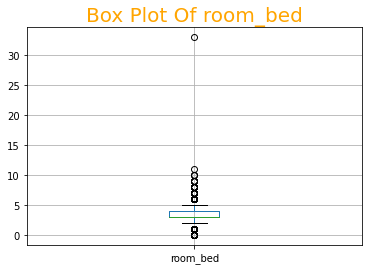

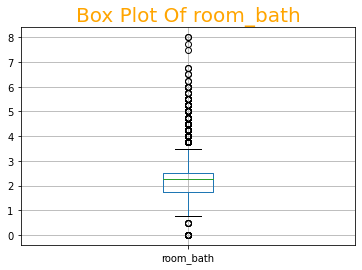

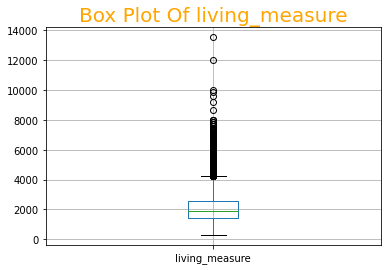

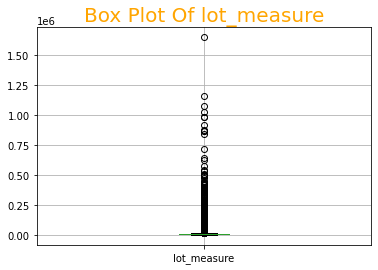

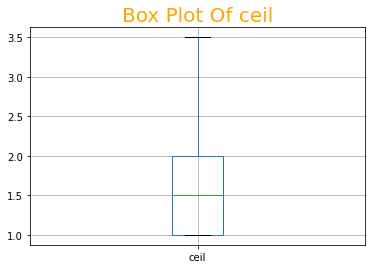

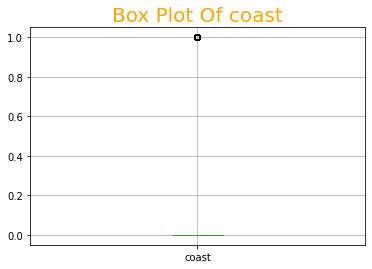

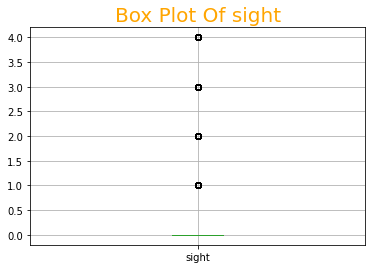

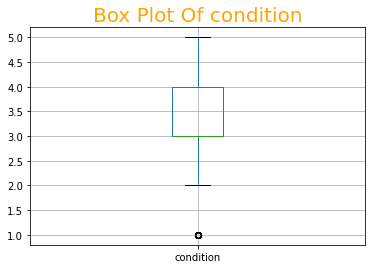

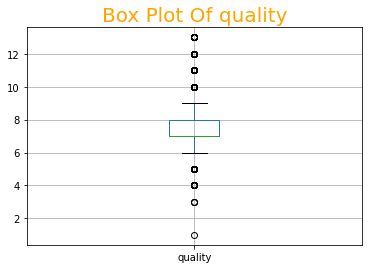

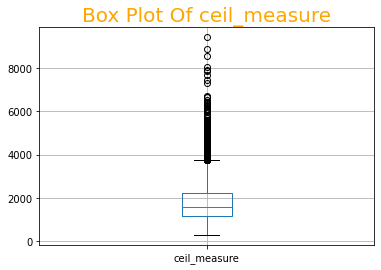

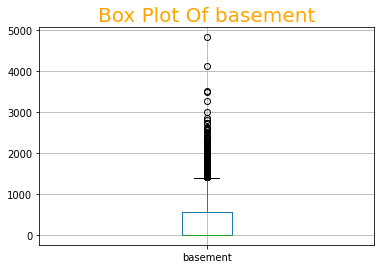

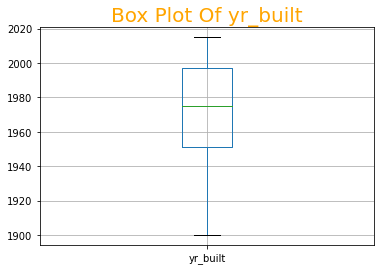

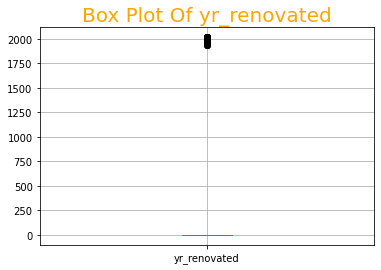

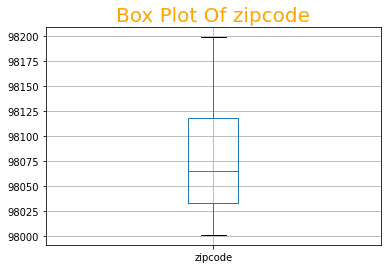

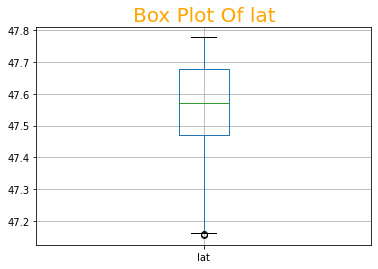

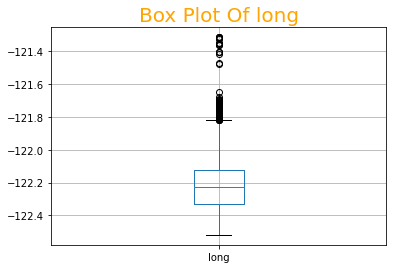

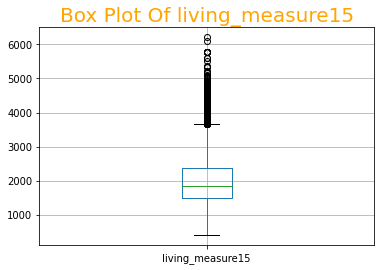

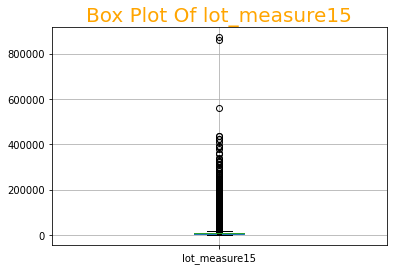

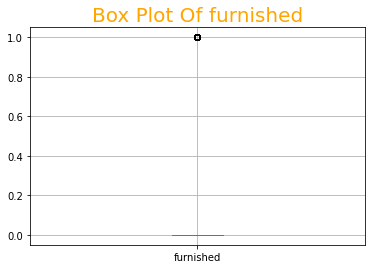

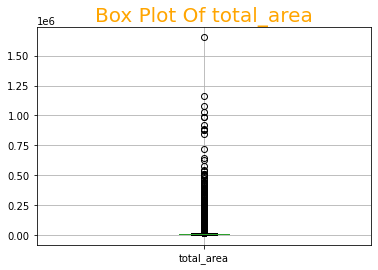

In [26]:
# boxplot all the numerical columns and see if there any outliers
for i in df.drop(['dayhours'],axis=1).iloc[:, 2:].columns:
    df.iloc[:, 1:].boxplot(column=i)
    plt.title(f"Box Plot Of {i}" , fontsize=20,
          color="orange")
    plt.show()

There are lots of feature which are having outliers. 

# Analysis of CID

In [27]:
cid_count=df.cid.value_counts()
cid_count[cid_count>1].shape[0]

176

There are multiple properties which are sold multiple times.

# Analysis of dayhours

### Adding a new column for analyzing the data on month and year level

In [28]:
# converting the new dataframe for modeling purpose and converting the dayhours into month-year for further analysis

df_new=df.copy()
df.dayhours=df.dayhours.str.replace('T000000', "")
df.dayhours=pd.to_datetime(df.dayhours,format='%Y%m%d')
df['month/year']=df['dayhours'].apply(lambda x: x.strftime('%B/%Y'))


In [29]:
df['month/year'].value_counts()

April/2015        2231
July/2014         2211
June/2014         2180
August/2014       1940
October/2014      1878
March/2015        1875
September/2014    1774
May/2014          1768
December/2014     1471
November/2014     1411
February/2015     1250
January/2015       978
May/2015           646
Name: month/year, dtype: int64

<AxesSubplot:title={'center':'Analysis of DayHours'}, xlabel='month/year', ylabel='count'>

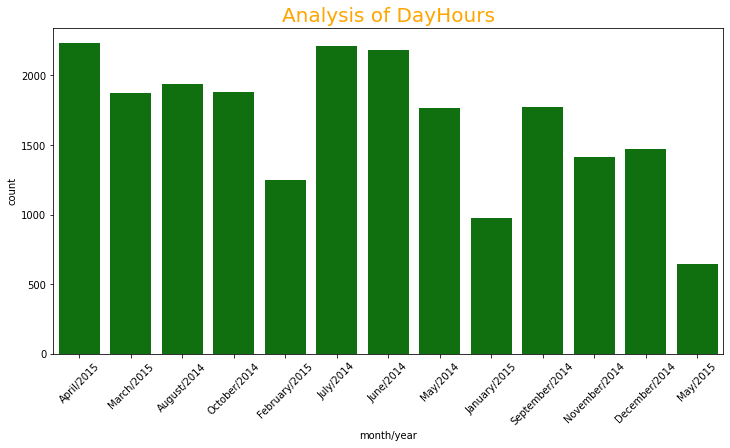

In [30]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 45)
plt.title(f"Analysis of DayHours" , fontsize=20,
          color="orange")
sns.countplot(df['month/year'],color='green')

From the above, we can conclude that in april 2015 and june and july of 2014 most houses are sold

In [31]:
df.groupby(['month/year'])['price'].agg('mean')

month/year
April/2015        561933.463021
August/2014       536527.039691
December/2014     524602.893270
February/2015     507919.603200
January/2015      525963.251534
July/2014         544892.161013
June/2014         558123.736239
March/2015        544057.683200
May/2014          548166.600113
May/2015          558193.095975
November/2014     522058.861800
October/2014      539127.477636
September/2014    529315.868095
Name: price, dtype: float64

April month have the highest mean price in the time line of the sales of the properties is from May-2014 to May-2015

# Univariant Analysis of each column

# Analysis of room_bed

In [32]:
df['room_bed'].value_counts()

3.0     9875
4.0     6854
2.0     2747
5.0     1595
6.0      270
1.0      197
7.0       38
8.0       13
0.0       13
9.0        6
10.0       3
33.0       1
11.0       1
Name: room_bed, dtype: int64

The value of 33 seems to be outlier we need to check the data point before imputing the same 

In [33]:
df[df['room_bed']==33]

cid   dayhours   price  room_bed  room_bath  living_measure  \
16913  2402100895 2014-06-25  640000      33.0       1.75          1620.0   

       lot_measure  ceil  coast  sight  ...  yr_built  yr_renovated  zipcode  \
16913       6000.0   1.0    0.0    0.0  ...    1947.0             0    98103   

           lat     long  living_measure15  lot_measure15  furnished  \
16913  47.6878 -122.331            1330.0         4700.0        0.0   

       total_area  month/year  
16913      7620.0   June/2014  

[1 rows x 24 columns]

We will remove ie later because it is a oultlier

Text(0.5, 1.0, 'Analysis of room_bed')

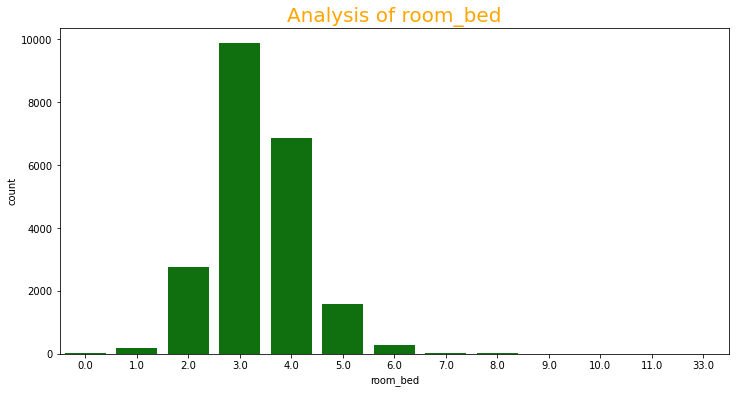

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(df.room_bed,color='green')
plt.title(f"Analysis of room_bed" , fontsize=20,
          color="orange")

Most of the houses have 3 or 4 bedrooms

# Analysis of room_bath

Text(0.5, 1.0, 'Analysis of room_bath')

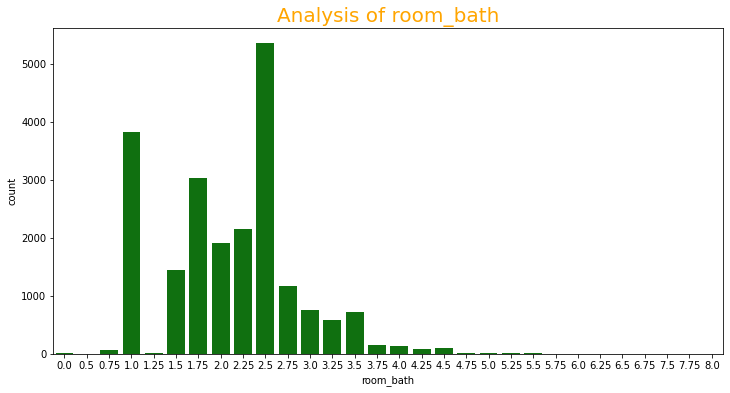

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(df.room_bath,color='green')
df['room_bath'].value_counts().sort_index()
plt.title(f"Analysis of room_bath" , fontsize=20,
          color="orange")

Majority of the houses have bathroom in the range of 1.0 to 2.5

Skewness is : 0.5102509663719975


Text(0.5, 1.0, 'Analysis of room_bath - Skweness')

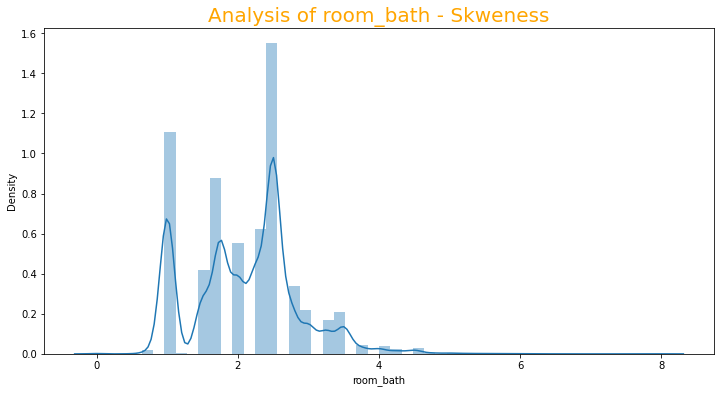

In [36]:
plt.figure(figsize=(12,6))
print("Skewness is :",df.room_bath.skew())
sns.distplot(df.room_bath)
plt.title(f"Analysis of room_bath - Skweness" , fontsize=20,
          color="orange")

# Analysis of Living measure

Skewness is : 1.4735169838222357


Text(0.5, 1.0, 'Analysis of Living Measure - Skweness')

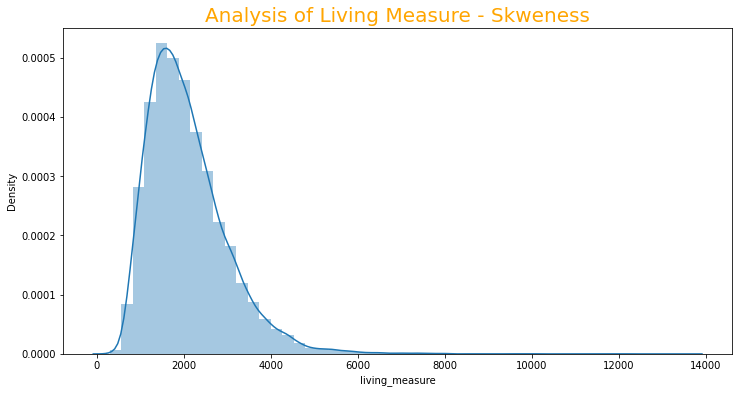

In [37]:
#Data is skewed as visible from plot, as its distribution is normal
plt.figure(figsize=(12,6))
print("Skewness is :",df.living_measure.skew())
sns.distplot(df.living_measure)
df.living_measure.describe()
plt.title(f"Analysis of Living Measure - Skweness" , fontsize=20,
          color="orange")

data is rightly skewed

Text(0.5, 1.0, 'Analysis of Living Measure - Box Plot')

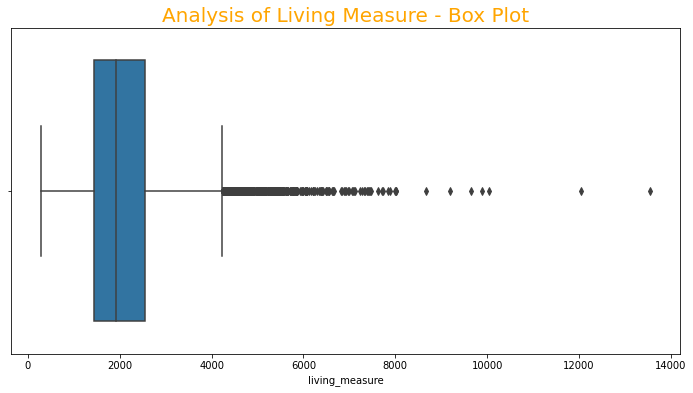

In [38]:
#boxplot for living_measure
plt.figure(figsize=(12,6))
sns.boxplot(df.living_measure)
plt.title(f"Analysis of Living Measure - Box Plot" , fontsize=20,
          color="orange")

There are many outliers in living measure. We will handle them later

In [39]:
# checking the no. of data points with Living measure greater than 8000
df[df['living_measure']>8000]

cid   dayhours    price  room_bed  room_bath  living_measure  \
1068   6762700020 2014-10-13  7700000       6.0       8.00         12050.0   
1245   1924059029 2014-06-17  4670000       5.0       6.75          9640.0   
7928   1225069038 2014-05-05  2280000       7.0       8.00         13540.0   
10639  9208900037 2014-09-19  6890000       6.0       7.75          9890.0   
10718  9808700762 2014-06-11  7060000       5.0       4.50         10040.0   
12794  2470100110 2014-08-04  5570000       5.0       5.75          9200.0   
20038  1247600105 2014-10-20  5110000       5.0       5.25          8010.0   
20193  2303900035 2014-06-11  2890000       5.0       6.25          8670.0   
20746  6072800246 2014-07-02  3300000       5.0       6.25          8020.0   

       lot_measure  ceil  coast  sight  ...  yr_built  yr_renovated  zipcode  \
1068       27600.0   2.5    0.0    3.0  ...    1910.0          1987    98102   
1245       13068.0   1.0    1.0    4.0  ...    1983.0          2009    98040   
7928      307752.0   3.0    0.0    4.0  ...    1999.0             0    98053   
10639      31374.0   2.0    0.0    4.0  ...    2001.0             0    98039   
10718      37325.0   2.0    1.0    2.0  ...    1940.0          2001    98004   
12794      35069.0   2.0    0.0    0.0  ...    2001.0             0    98039   
20038      45517.0   2.0    1.0    4.0  ...    1999.0             0    98033   
20193      64033.0   2.0    0.0    4.0  ...    1965.0          2003    98177   
20746      21738.0   2.0    0.0    0.0  ...    2001.0             0    98006   

           lat     long  living_measure15  lot_measure15  furnished  \
1068   47.6298 -122.323            3940.0         8800.0        1.0   
1245   47.5570 -122.210            3270.0        10454.0        1.0   
7928   47.6675 -121.986            4850.0       217800.0        1.0   
10639  47.6305 -122.230            4540.0        42730.0        1.0   
10718  47.6500 -122.214            3930.0        25449.0        1.0   
12794  47.6289 -122.233            3560.0        24345.0        1.0   
20038  47.6767 -122.211            3430.0        26788.0        1.0   
20193  47.7295 -122.372            4140.0        81021.0        1.0   
20746  47.5675 -122.189            4160.0        18969.0        1.0   

       total_area      month/year  
1068      39650.0    October/2014  
1245      22708.0       June/2014  
7928     321292.0        May/2014  
10639     41264.0  September/2014  
10718     47365.0       June/2014  
12794     44269.0     August/2014  
20038     53527.0    October/2014  
20193     72703.0       June/2014  
20746     29758.0       July/2014  

[9 rows x 24 columns]

We have only 9 houses which have more than 8k living_measure. We will treat them as outliers

# Analysis of lot_measure

Skewness is : 13.084880210575367


Text(0.5, 1.0, 'Analysis of Lot Measure - Box Plot')

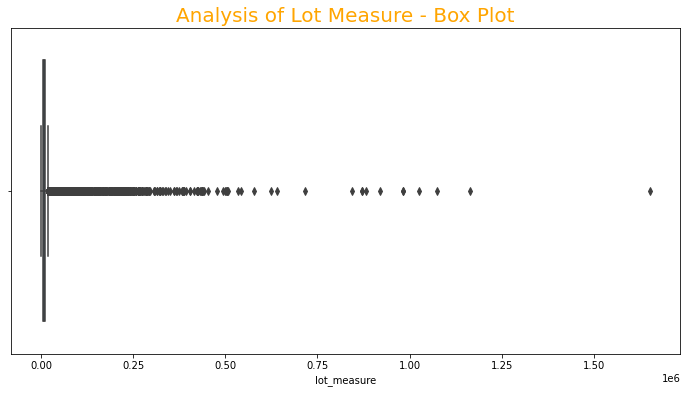

In [40]:
plt.figure(figsize=(12,6))
print("Skewness is :",df.lot_measure.skew())
sns.boxplot(df.lot_measure)
df.lot_measure.describe()
plt.title(f"Analysis of Lot Measure - Box Plot" , fontsize=20,
          color="orange")

Data is skewed as visible from plot

In [41]:
# checking the no. of data points with Lot measure greater than 1250000
df[df['lot_measure']>1250000]

cid   dayhours   price  room_bed  room_bath  living_measure  \
11674  1020069017 2015-03-27  700000       4.0        1.0          1300.0   

       lot_measure  ceil  coast  sight  ...  yr_built  yr_renovated  zipcode  \
11674    1651359.0   1.0    0.0    3.0  ...    1920.0             0    98022   

           lat     long  living_measure15  lot_measure15  furnished  \
11674  47.2313 -122.023            2560.0       425581.0        0.0   

       total_area  month/year  
11674   1652659.0  March/2015  

[1 rows x 24 columns]

We have only 1 property with more than 12,50,000 lot_measure. We will treat as outlier

# Analysis of ceil

In [42]:
df.ceil.value_counts()

1.0    10719
2.0     8210
1.5     1905
3.0      610
2.5      161
3.5        8
Name: ceil, dtype: int64

most houses have 1 floor

Text(0.5, 1.0, 'Analysis of ceil')

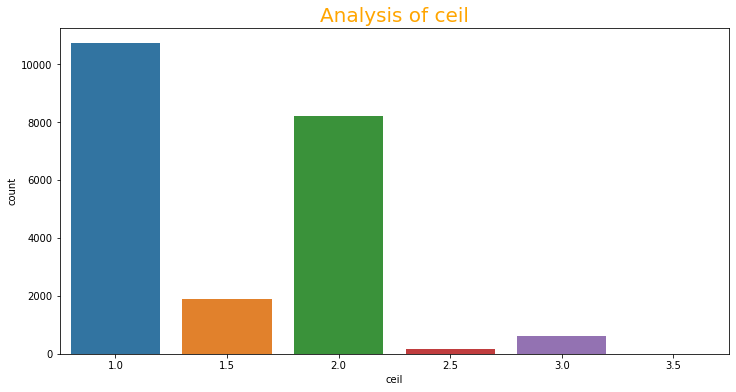

In [43]:
plt.figure(figsize=(12,6))
sns.countplot('ceil',data=df)
plt.title(f"Analysis of ceil" , fontsize=20,
          color="orange")

Most houses have 1 and 2 floors

# Analysis of coast

In [44]:
df.coast.value_counts()

0.0    21452
1.0      161
Name: coast, dtype: int64

most houses don't have waterfront view, very few are waterfront

# Analysis of sight

In [45]:
df.sight.value_counts()

0.0    19494
2.0      959
3.0      510
1.0      332
4.0      318
Name: sight, dtype: int64

Most sights have not been viewed 

# Analysis of condition

In [46]:
df.condition.value_counts()

3.0    14063
4.0     5655
5.0     1694
2.0      171
1.0       30
Name: condition, dtype: int64

#Overall most houses are rated as 3 and above for its condition overall

# Analysis of quality 

Text(0.5, 1.0, 'Analysis of quality')

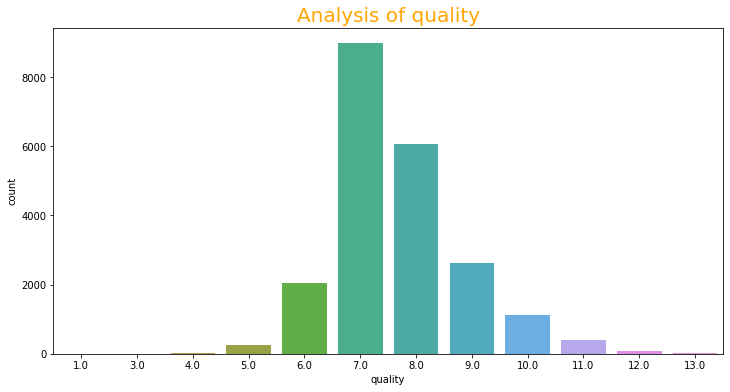

In [47]:
df.quality.value_counts()
plt.figure(figsize=(12,6))
sns.countplot('quality',data=df)
plt.title(f"Analysis of quality" , fontsize=20,
          color="orange")

Most properties have quality rating between 6 to 10

In [48]:
#checking for data points with quality rating as 13
df[df['quality']==13]

cid   dayhours    price  room_bed  room_bath  living_measure  \
388     853200010 2014-07-01  3800000       5.0       5.50          7050.0   
1068   6762700020 2014-10-13  7700000       6.0       8.00         12050.0   
3271   7237501190 2014-10-10  1780000       4.0       3.25          4890.0   
3649   2426039123 2015-01-30  2420000       5.0       4.75          7880.0   
4371   1725059316 2014-11-20  2390000       4.0       4.00          6330.0   
8420   9831200500 2015-03-04  2480000       5.0       3.75          6810.0   
10639  9208900037 2014-09-19  6890000       6.0       7.75          9890.0   
10832  4139900180 2015-04-20  2340000       4.0       2.50          4500.0   
11459  1068000375 2014-09-23  3200000       6.0       5.00          7100.0   
12794  2470100110 2014-08-04  5570000       5.0       5.75          9200.0   
16985  2303900100 2014-09-11  3800000       3.0       4.25          5510.0   
20193  2303900035 2014-06-11  2890000       5.0       6.25          8670.0   
20547  3303850390 2014-12-12  2980000       5.0       5.50          7400.0   

       lot_measure  ceil  coast  sight  ...  yr_built  yr_renovated  zipcode  \
388        42840.0   1.0    0.0    2.0  ...    1978.0             0    98004   
1068       27600.0   2.5    0.0    3.0  ...    1910.0          1987    98102   
3271       13402.0   2.0    0.0    0.0  ...    2004.0             0    98059   
3649       24250.0   2.0    0.0    2.0  ...    1996.0             0    98177   
4371       13296.0   2.0    0.0    2.0  ...    2000.0             0    98033   
8420        7500.0   2.5    0.0    0.0  ...    1922.0             0    98102   
10639      31374.0   2.0    0.0    4.0  ...    2001.0             0    98039   
10832      35200.0   1.0    0.0    0.0  ...    1988.0             0    98006   
11459      18200.0   2.5    0.0    0.0  ...    1933.0          2002    98199   
12794      35069.0   2.0    0.0    0.0  ...    2001.0             0    98039   
16985      35000.0   2.0    0.0    4.0  ...    1997.0             0    98177   
20193      64033.0   2.0    0.0    4.0  ...    1965.0          2003    98177   
20547      18898.0   2.0    0.0    3.0  ...    2001.0             0    98006   

           lat     long  living_measure15  lot_measure15  furnished  \
388    47.6229 -122.220            5070.0        20570.0        1.0   
1068   47.6298 -122.323            3940.0         8800.0        1.0   
3271   47.5303 -122.131            5790.0        13539.0        1.0   
3649   47.7334 -122.362            2740.0        10761.0        1.0   
4371   47.6488 -122.201            2200.0         9196.0        1.0   
8420   47.6285 -122.322            2660.0         7500.0        1.0   
10639  47.6305 -122.230            4540.0        42730.0        1.0   
10832  47.5477 -122.126            4760.0        35200.0        1.0   
11459  47.6427 -122.408            3130.0         6477.0        1.0   
12794  47.6289 -122.233            3560.0        24345.0        1.0   
16985  47.7296 -122.370            3430.0        45302.0        1.0   
20193  47.7295 -122.372            4140.0        81021.0        1.0   
20547  47.5431 -122.112            6110.0        26442.0        1.0   

       total_area      month/year  
388       49890.0       July/2014  
1068      39650.0    October/2014  
3271      18292.0    October/2014  
3649      32130.0    January/2015  
4371      19626.0   November/2014  
8420      14310.0      March/2015  
10639     41264.0  September/2014  
10832     39700.0      April/2015  
11459     25300.0  September/2014  
12794     44269.0     August/2014  
16985     40510.0  September/2014  
20193     72703.0       June/2014  
20547     26298.0   December/2014  

[13 rows x 24 columns]

There are only 13 propeties which have the highest quality rating

# Analysis of ceil_measure

Skewness is : 1.4468098702392473


Text(0.5, 1.0, 'Analysis of ceil_measure - skewness')

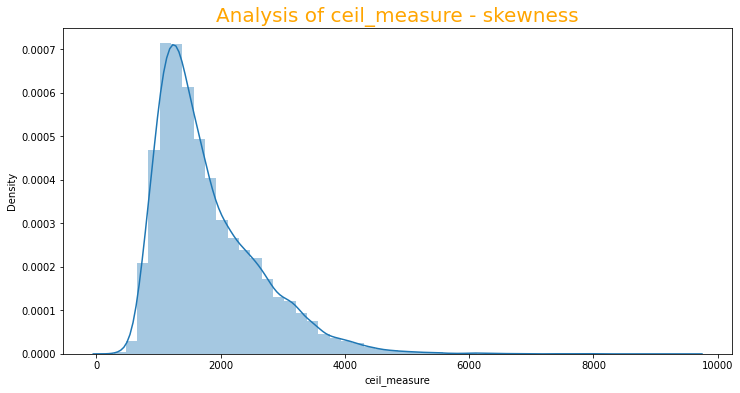

In [49]:
print("Skewness is :", df.ceil_measure.skew())
plt.figure(figsize=(12,6))
sns.distplot(df.ceil_measure)
df.ceil_measure.describe()
plt.title(f"Analysis of ceil_measure - skewness" , fontsize=20,
          color="orange")

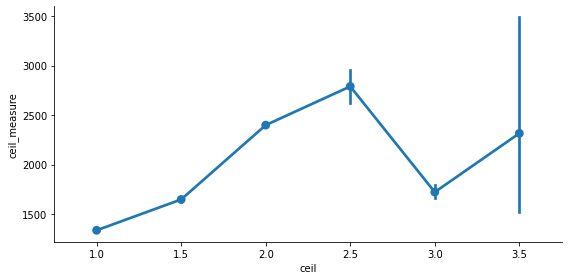

In [50]:
sns.factorplot(x='ceil',y='ceil_measure',data=df, size = 4, aspect = 2)

 There is no pattern in Ceil Vs Ceil_measure and is highly skewed

The vertival lines at each point represent the inter quartile range of values at that point

# Analysis of basement

Text(0.5, 1.0, 'Analysis of basement - skewness')

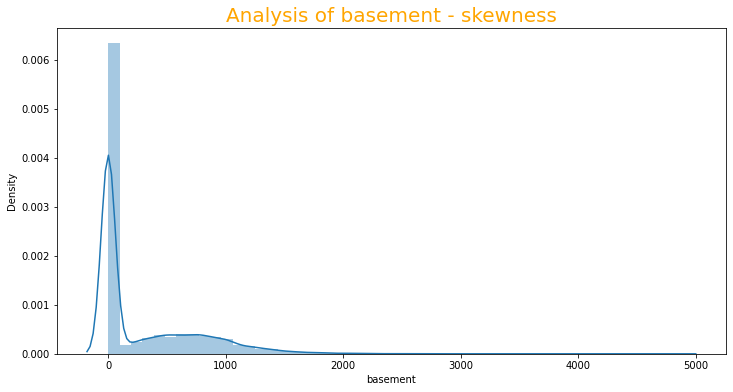

In [51]:
#basement_measure
plt.figure(figsize=(12,6))
sns.distplot(df.basement)
plt.title(f"Analysis of basement - skewness" , fontsize=20,
          color="orange")

 We can see 2 gaussians, which tells us there are propeties which don't have basements and some have the basements

In [52]:
df[df.basement==0].shape

(13126, 24)

We have almost 60% of the properties without basement

<AxesSubplot:xlabel='basement'>

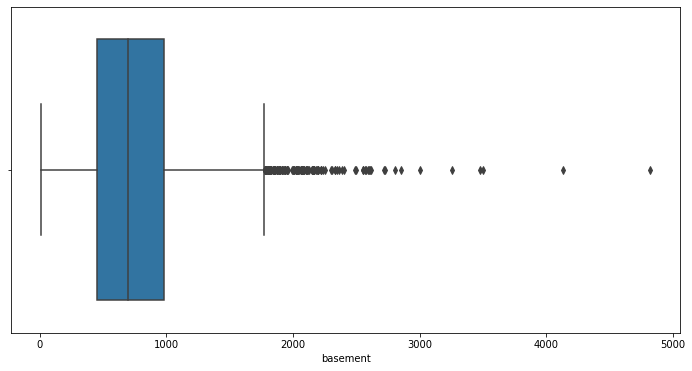

In [53]:
#houses have zero measure of basement i.e. they donot have basements
#let's plot boxplot for properties which have basements only
df_base=df[df['basement']>0]
plt.figure(figsize=(12, 6))
sns.boxplot(df_base['basement'])


 We can clearly see, there are outliers. We need to treat this before our model.

In [54]:
#checking the no. of data points with 'basement' greater than 4000
df[df['basement']>4000]

cid   dayhours    price  room_bed  room_bath  living_measure  \
1245  1924059029 2014-06-17  4670000       5.0       6.75          9640.0   
7928  1225069038 2014-05-05  2280000       7.0       8.00         13540.0   

      lot_measure  ceil  coast  sight  ...  yr_built  yr_renovated  zipcode  \
1245      13068.0   1.0    1.0    4.0  ...    1983.0          2009    98040   
7928     307752.0   3.0    0.0    4.0  ...    1999.0             0    98053   

          lat     long  living_measure15  lot_measure15  furnished  \
1245  47.5570 -122.210            3270.0        10454.0        1.0   
7928  47.6675 -121.986            4850.0       217800.0        1.0   

      total_area  month/year  
1245     22708.0   June/2014  
7928    321292.0    May/2014  

[2 rows x 24 columns]

We have only 2 properties with more than 4,000 measure basement

<AxesSubplot:xlabel='basement', ylabel='Density'>

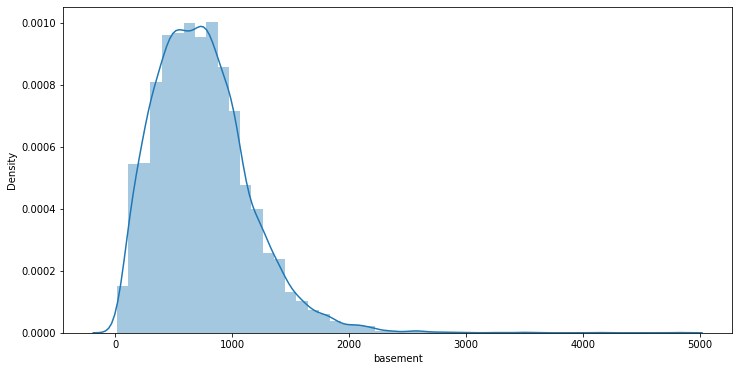

In [55]:
#Distribution of houses having basement
plt.figure(figsize=(12,6))
sns.distplot(df_base.basement)

 Distribution having basement is right-skewed

# Analysis of yr_built

Text(0.5, 1.0, 'Analysis of yr_built')

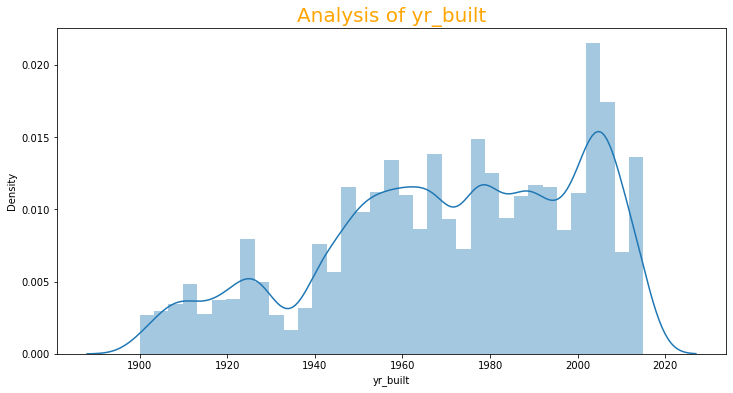

In [56]:
# house range from new to very old
plt.figure(figsize=(12,6))
sns.distplot(df.yr_built)
plt.title(f"Analysis of yr_built" , fontsize=20,
          color="orange")

The built year of the properties range from 1900 to 2014 and we can see upward trend with time

# Analysis of yr_renovated

In [57]:
df[df['yr_renovated']>0].shape

(914, 24)

Only 914 houses were renovated out of 21613 houses

Text(0.5, 1.0, 'Analysis of yr_renovated')

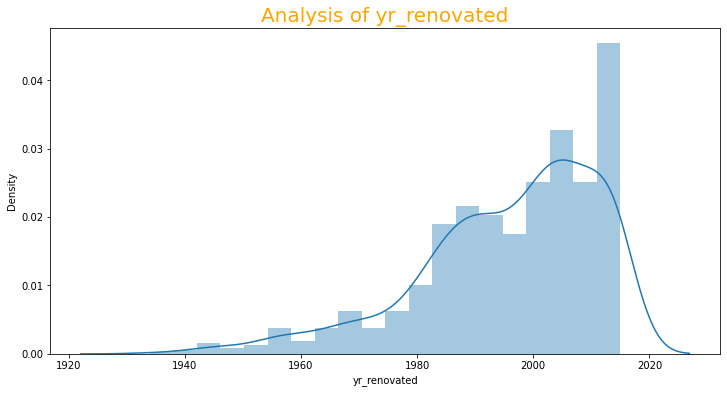

In [58]:
#yr_renovated - plot of houses which are renovated
df_reno=df[df['yr_renovated']>0]
plt.figure(figsize=(12,6))
sns.distplot(df_reno.yr_renovated)
plt.title(f"Analysis of yr_renovated" , fontsize=20,
          color="orange")

Now will create age column from columns : yr_built & yr_renovated

# Analysis of furnished

Text(0.5, 1.0, 'Analysis of furnished')

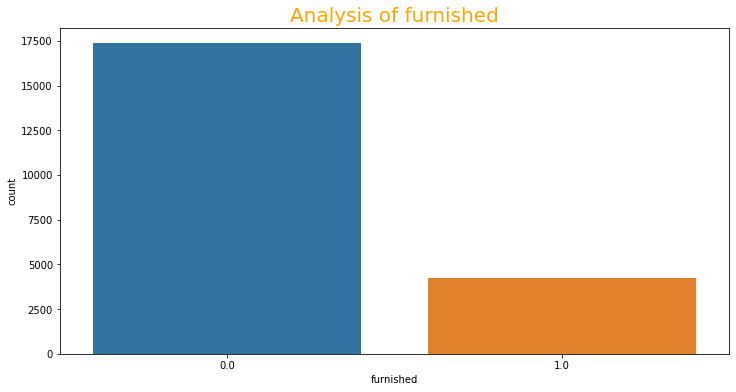

In [59]:
plt.figure(figsize=(12,6))
sns.countplot('furnished',data=df)
df.furnished.value_counts()
plt.title(f"Analysis of furnished" , fontsize=20,
          color="orange")

 Most properties are not furnished. Furnish column need to be converted into categorical column

# Analysis of Price


In [60]:
import numpy as np
min_value = df['price'].min()
max_value = df['price'].max()
bins = np.linspace(min_value,max_value,40)
df['price_bins']=pd.cut(df['price'], bins=bins,labels =[i for i in range(1,40)],include_lowest=True)

Text(0.5, 1.0, 'Analysis of price')

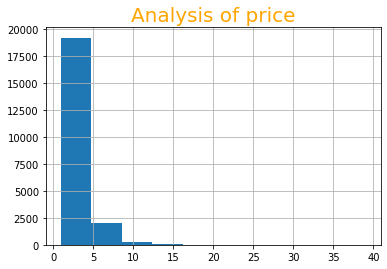

In [61]:
df.price_bins.hist()
plt.title(f"Analysis of price" , fontsize=20,
          color="orange")

# BIVARIATE ANALYSIS

## PairPlot

In [ ]:
# plot all the variables and confirm our above deduction with more confidence
sns.pairplot(df, diag_kind = 'kde')
plt.title(f"Pairplot" , fontsize=20,
          color="orange")

From above pair plot, we observed/deduced below 

<ol>
    <li><b>price:</b> price distribution is Right-Skewed as we deduced earlier from our 5-factor analysis</li>
    <li><b>room_bed:</b> our target variable (price) and room_bed plot is not linear. It's distribution have lot of gaussians</li>
    <li><b>room_bath:</b> It's plot with price has <b>somewhat linear relationship</b>. Distribution has number of gaussians.</li>
    <li><b>living_measure:</b> Plot against price has <b>strong linear relationship</b>. It also have linear relationship with room_bath variable. So <b>might remove one of these 2</b>. Distribution is Right-Skewed.
    <li><b>lot_measure: No clear relationship</b> with price.</li>
    <li><b>ceil: No clear relationship</b> with price. We can see, it's <b>have 6 unique values</b> only. Therefore, we can <b>convert this column into categorical column</b> for values.</li>
    <li><b>coast: No clear relationship</b> with price. Clearly it's <b>categorical variable with 2 unique values</b>.</li>
    <li><b>sight: No clear relationship</b> with price. This has <b>5 unique values</b>. Can be <b>converted to Categorical variable</b>.</li>
    <li><b>condition: No clear relationship</b> with price. This has <b>5 unique values</b>. Can be <b>converted to Categorical variable</b>.</li>
    <li><b>quality: Somewhat linear relationship with price</b>. Has <b>discrete values from 1 - 13. Can be converted to Categorical variable</b>.</li>
    <li><b>ceil_measure: Strong linear relationship with price</b>. Also with room_bath and living_measure features. Distribution is <b>Right-Skewed</b>.</li>
    <li><b>basement: No clear relationship</b> with price. </li>
    <li><b>yr_built: No clear relationship</b> with price. </li>
    <li><b>yr_renovated: No clear relationship</b> with price. Have <b>2 unique values. Can be converted to Categorical Variable</b> which tells whether house is renovated or not.</li>
    <li><b>zipcode, lat, long: No clear relationship</b> with price or any other feature.</li>
    <li><b>living_measure15: Somewhat linear relationship with target feature</b>. It's same as living_measure. Therefore we can drop this variable.</li>
    <li><b>lot_measure15: No clear relationship</b> with price or any other feature.</li>
    <li><b>furnished: No clear relationship</b> with price or any other feature. <b> 2 unique values so can be converted to Categorical Variable</b></li>
    <li><b>total_area: No clear relationship with price</b>. But it has <b>Very Strong linear relationship with lot_measure</b>. So one of it can be dropped.</li>
    </ol>

In [ ]:
# corelatoin between the different features
corr = df.corr(method ='pearson')
corr

 We have linear relationships in below featues as we got to know from above matrix

<ol>
    <li><b>price</b>: room_bath, living_measure, quality, living_measure15, furnished</li>
    <li><b>living_measure</b>: price, room_bath. So we can consider dropping 'room_bath' variable.</li>
    <li><b>quality</b>: price, room_bath, living_measure</li>
    <li><b>ceil_measure</b>: price, room_bath, living_measure, quality</li>
    <li><b>living_measure15</b>: price, living_measure, quality. So we can  consider dropping living_measure15 as well. As it's giving same info as living_measure.</li>
    <li><b>lot_measure15</b>: lot_measure. Therefore, we can consider dropping lot_measure15, as it's giving same info.</li>
    <li><b>furnished</b>: quality</li>
    <li><b>total_area</b>: lot_measure, lot_measure15. Therefore, we can consider dropping total_area feature as well. As it's giving same info as lot_measure.</li>
</ol>

We can plot heatmap and can easily confirm our above findings

In [ ]:
# Plotting heatmap
plt.subplots(figsize =(15, 8)) 
sns.heatmap(corr,cmap="YlGnBu",annot=True)
plt.title(f"Heatmap" , fontsize=20,
          color="orange")

# Bivariate Analysis of  month_year

In [ ]:
df['month/year'] = pd.to_datetime(df['month/year'], format='%B/%Y')
df.sort_values(["month/year"], axis=0, ascending=True, inplace=True) 
df["month/year"] = df["month/year"].dt.strftime('%B/%Y')
sns.factorplot(x='month/year',y='price',data=df, size=4, aspect=2)
plt.xticks(rotation=90)
plt.title(f"Bivariate Analysis of month_year and price" , fontsize=20,
          color="orange")
df.groupby('month/year')['price'].agg(['mean','median','size'])

 The mean price of the houses tend to be high during March,April, May as compared to that of September, October, November,December period.

# Bivariate Analysis of  room_bed

In [ ]:
sns.factorplot(x='room_bed',y='price',data=df, size=4, aspect=2)
plt.title(f"Bivariate Analysis of room_bed and price" , fontsize=20,
          color="orange")
df.groupby('room_bed')['price'].agg(['mean','median','size'])

There is clear increasing trend in price with room_bed

In [ ]:
sns.factorplot(x='room_bath',y='price',data=df,size=4, aspect=2)
plt.xticks(rotation=90)
plt.title(f"Bivariate Analysis of room_bath and price" , fontsize=20,
          color="orange")
df.groupby('room_bath')['price'].agg(['mean','median','size'])

Outliers are there. Overall mean and median price increares with increasing room_bath<br>
There is upward trend in price with increase in room_bath

# Bivariate Analysis of living_measure

In [ ]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(df['living_measure'],df['price']))
plt.title(f"Bivariate Analysis of iiving_measure and price" , fontsize=20,
          color="orange")
df['living_measure'].describe()

There is clear increment in price of the property with increment in the living measure But there seems to be one outlier to this trend. Need to evaluate the same

# Bivariate Analysis of lot_measure

In [ ]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(df['lot_measure'],df['price']))
plt.title(f"Bivariate Analysis of lot_measure and price" , fontsize=20,
          color="orange")
df['lot_measure'].describe()

There seems to be no relation between lot_measure and price.<br>
Data value range is very large so breaking it get better view.<br>
There doesnt seem to be no relation between lot_measure and price trend

In [ ]:
#lot_measure <25000
plt.figure(figsize=(12,6))
x=df[df['lot_measure']<25000]
print(sns.scatterplot(x['lot_measure'],x['price']))
x['lot_measure'].describe()

 Almost 95% of the houses have <25000 lot_measure. But there is no clear trend between lot_measure and price

In [ ]:
#lot_measure >100000 
plt.figure(figsize=(12,6))
y=df[df['lot_measure']<=75000]
print(sns.scatterplot(y['lot_measure'],y['price']))

price increases with increase in living measure

# Bivariate Analysis of  ceil

In [ ]:
print(sns.factorplot(x='ceil',y='price',data=df, size = 4, aspect = 2))
plt.title(f"Bivariate Analysis of ceil and price" , fontsize=20,
          color="orange")
df.groupby('ceil')['price'].agg(['mean','median','size'])

Median price increases initially and then falls<br>
There is some slight upward trend in price with the ceil

# Bivariate Analysis of  coast

In [ ]:
print(sns.factorplot(x='coast',y='price',data=df, size = 4, aspect = 2))
plt.title(f"Bivariate Analysis of coast and price" , fontsize=20,
          color="orange")
df.groupby('coast')['living_measure','price'].agg(['median','mean'])

Mean and median of waterfront view is high however such houses are very small in compare to non-waterfront<br>
Also, living_measure mean and median is greater for waterfront house.<br>
The house properties with water_front tend to have higher price compared to that of non-water_front properties

In [ ]:
print(sns.factorplot(x='sight',y='price',data=df, size = 4, aspect = 2))
plt.title(f"Bivariate Analysis of sight and price" , fontsize=20,
          color="orange")
df.groupby('sight')['price','living_measure'].agg(['mean','median','size'])

It contains have outliers. 
The house sighted more have high price (mean and median) and have large living area as well.
Properties with higher price have more no.of sights compared to that of houses with lower price

In [ ]:
plt.figure(figsize=(12,6))
plt.title(f"Bivariate Analysis of living_measure and price on the basis of sight" , fontsize=20,
          color="orange")
print(sns.scatterplot(df['living_measure'],df['price'],hue=df['sight'],palette='Paired',legend='full'))

Viewed in relation with price and living_measure
Costlier houses with large living area are sighted more.
The above graph also justify that: Properties with higher price have more no.of sights compared to that of houses with lower price

# Bivariate Analysis of  condition

In [ ]:
print(sns.factorplot(x='condition',y='price',data=df, size = 4, aspect = 2))
plt.title(f"Bivariate Analysis of condition and price" , fontsize=20,
          color="orange")
df.groupby('condition')['price','living_measure'].agg(['mean','median','size'])

As the condition rating increases its price and living measure mean and median also increases.<br>
The price of the house increases with condition rating of the house

In [ ]:
plt.figure(figsize=(12,6))
plt.title(f"Bivariate Analysis of living_measure and price on the basis of condition" , fontsize=20,
          color="orange")
print(sns.scatterplot(df['living_measure'],df['price'],hue=df['condition'],palette='Paired',legend='full'))

Viewed in relation with price and living_measure. Most houses are rated as 3 or more.
We can see some outliers as well
So we found out that smaller houses are in better condition and better condition houses are having higher prices

# Bivariate Analysis of  quality

In [ ]:
print(sns.factorplot(x='quality',y='price',data=df, size = 4, aspect = 2))
plt.title(f"Bivariate Analysis of quality and price" , fontsize=20,
          color="orange")
df.groupby('quality')['price','living_measure'].agg(['mean','median','size'])

With grade increase price and living_measure increase (mean and median)
There is clear increase in price of the house with higher rating on quality

In [ ]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(df['living_measure'],df['price'],hue=df['quality'],palette='coolwarm_r', legend='full'))

Viewed in relation with price and living_measure. Most houses are graded as 6 or more.<br>
We can see some outliers as well 

# Bivariate Analysis of  ceil_measure

In [ ]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(df['ceil_measure'],df['price']))
plt.title(f"Bivariate Analysis of ceil_measure and price" , fontsize=20,
          color="orange")
df['ceil_measure'].describe()

There is upward trend in price with ceil_measure

# Bivariate Analysis of basement

In [ ]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(df['basement'],df['price']))
plt.title(f"Bivariate Analysis of basement and price" , fontsize=20,
          color="orange")
df['basement'].describe()

 We will create the categorical variable for basement 'has_basement' for houses with basement and no basement.This categorical variable will be used for further analysis.<br>
 Price increases with increase in ceil measure

### Adding a new caegorical variable for looking into the data which houses are having basements and which are not

In [ ]:
# Making bins for basements
def create_basement_group(series):
    if series == 0:
        return "No"
    elif series > 0:
        return "Yes"
    
df['has_basement'] = df['basement'].apply(create_basement_group)

In [ ]:
print(sns.factorplot(x='has_basement',y='price',data=df, size = 4, aspect = 2))
df.groupby('has_basement')['price','living_measure'].agg(['mean','median','size'])

After binning we data shows with basement houses are costlier and have higher<br>
The houses with basement has better price compared to that of houses without basement

In [ ]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(df['living_measure'],df['price'],hue=df['has_basement']))

houses having basement have higher price & living measure

In [ ]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(df['yr_built'],df['living_measure']))
df.groupby('yr_built')['price'].agg(['mean','median','size'])

We will create new variable: Houselandratio - This is proportion of living area in the total area of the house. We will explore the trend of price against this houselandratio.

### Creating a new column for calculating the percentage of living space in the house

In [ ]:
df["house_land_ratio"]=np.round((df['living_measure']/df['total_area']),2)*100
df["house_land_ratio"].head()

# Bivariate Analysis of  yr_renovated

In [ ]:
plt.figure(figsize=(12,6))
x=df[df['yr_renovated']>0]
print(sns.scatterplot(x['yr_renovated'],x['price']))
x.groupby('yr_renovated')['price'].agg(['mean','median','size'])

 So most houses are renovated after 1980's. We will create new categorical variable 'has_renovated' to categorize the property as renovated and non-renovated. For further ananlysis we will use this categorical variable.

### Creating new categorical column for looking that a house is renovated or not

In [ ]:
def renovated_group(series):
    if series == 0:
        return "No"
    elif series > 0:
        return "Yes"
    
df['has_renovated'] = df['yr_renovated'].apply(renovated_group)

In [ ]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(df['living_measure'],df['price'],hue=df['has_renovated']))
df.groupby(['has_renovated'])['price','house_land_ratio'].agg(['mean','median','size'])

Renovated have higher mean and median, however it does not confirm if the prices of house renovated actually increased or not.<br>
Renovated house utilized more land area for construction of house

Renovated properties have higher price than others with same living measure space.

In [ ]:
#has_renovated - have higher price & living measure
plt.figure(figsize=(12,6))
x=df[df['yr_built']<2000]
print(sns.scatterplot(x['living_measure'],x['price'],hue=x['has_renovated']))

# Bivariate Analysis of furnished

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='price_bins', hue='furnished', data=df)

In [ ]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(df['price'],df['furnished'],))
df['price'].describe()

In [ ]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(df['living_measure'],df['furnished'],))
df['living_measure'].describe()

In [ ]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(df['living_measure'],df['price'],hue=df['furnished']))
df.groupby('furnished')['price','living_measure','house_land_ratio'].agg(['mean','median','size'])

Furnished has higher price value and has greater living_measure <Br>
Furnished houses have higher price than that of the Non-furnished houses

# Some other analysis

### Looking into the most common house according to number of bedroom 

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

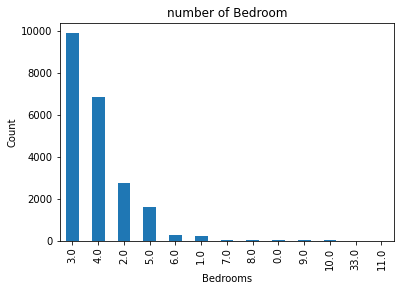

In [103]:
df['room_bed'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

we can clearly see that the houses having 3 and 4 number of bedrooms are higher

# Visualizing the location of the houses based on latitude and longitude.

<Figure size 720x720 with 0 Axes>

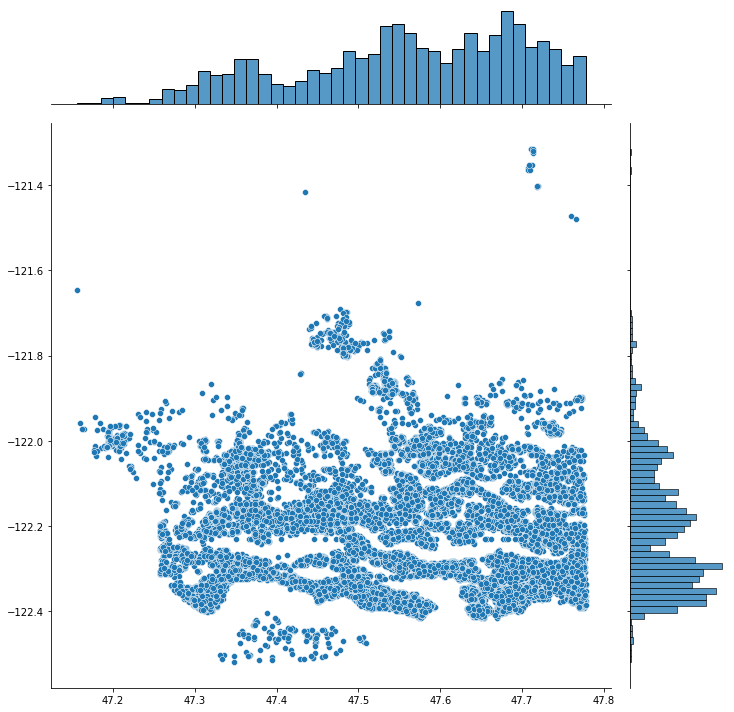

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [104]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df.lat.values, y=df.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

We can see that for latitude between -47.7 and -48.8 and for longitude  between -122.2 to -122.4 there are many houses

# DATA PROCESSING

### Treating Outlilers 
We have seen outliers for columns room_bath(33 bed), living_measure, lot_measure, ceil_measure and Basement 

In [ ]:
def outlier_removal(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range,upper_range

Using the above function, lets get the lowerbound and upperbound values

# Removing oultier from ceil_measure

In [ ]:
lowerbound,upperbound = outlier_removal(df.ceil_measure)
print(lowerbound,upperbound)

Lets check which column is considered as an outlier

In [ ]:
df[(df.ceil_measure < lowerbound) | (df.ceil_measure > upperbound)]

We got 611 records which are outliers

In [ ]:
# dropping the record from the dataset
df.drop(df[ (df.ceil_measure > upperbound) | (df.ceil_measure < lowerbound) ].index, inplace=True)

In [ ]:
df.shape

In [ ]:
# ceil_measure
print("Skewness is :", df.ceil_measure.skew())
plt.figure(figsize=(12,6))
sns.distplot(df.ceil_measure)
df.ceil_measure.describe()

After treating outliers of ceil_measure, the data has reduced by about 600(~3%) data points but data is nicely distributed

# Removing oultier from basement

In [ ]:
lowerbound_base,upperbound_base = outlier_removal(df.basement)
print(lowerbound_base,upperbound_base)

In [ ]:
df[(df.basement < lowerbound_base) | (df.basement > upperbound_base)]

 We got 408 records as outliers, let's drop these outliers

In [ ]:
# dropping the record from the dataset
df.drop(df[ (df.basement > upperbound_base) | (df.basement < lowerbound_base) ].index, inplace=True)

In [ ]:
df.shape

In [ ]:
# basement_measure
plt.figure(figsize=(12,6))
sns.distplot(df.basement)

After treating outliers of basement, we can see that 400(~2%) data points got imputed. Total about 5% data has been imputed after treating ceil_measure and basement.

In [ ]:
# boxplot now for basement
plt.figure(figsize=(12,6))
sns.boxplot(df['basement'])

# Removing oultier from living_measure

In [ ]:
lowerbound_lim,upperbound_lim = outlier_removal(df.living_measure)
print(lowerbound_lim,upperbound_lim)

In [ ]:
df[(df.living_measure < lowerbound_lim) | (df.living_measure > upperbound_lim)]

We got 178 records as outliers. Let's treat this by dropping

In [ ]:
# dropping the record from the dataset
df.drop(df[ (df.living_measure > upperbound_lim) | (df.living_measure < lowerbound_lim) ].index, inplace=True)

In [ ]:
# boxplot after dropping the outliers
plt.figure(figsize=(12,6))
sns.boxplot(df['living_measure'])

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df.living_measure)

 By treating outliers of living_measure, we lost 178 data points more and data distribution looks normal

In [ ]:
# shape of the data after removing outliers in living_column
df.shape

# Removing oultier from lot_measure

In [ ]:
lowerbound_lom,upperbound_lom = outlier_removal(df.lot_measure)
print(lowerbound_lom,upperbound_lom)

In [ ]:
df[(df.lot_measure < lowerbound_lom) | (df.lot_measure > upperbound_lom)]

 We got 2155 records which are outliers. Let's drop these outlier records.

In [ ]:
# dropping the record from the dataset
df.drop(df[ (df.lot_measure > upperbound_lom) | (df.lot_measure < lowerbound_lom) ].index, inplace=True)

In [ ]:
# plotting after removing outliers
plt.figure(figsize=(12,6))
sns.boxplot(df['lot_measure'])

In [ ]:
df.shape

Total outliers in the lot_measure are 2128 data points. But still we are going ahead with imputing the data. We will analyze later whether there is any impact on the data set or not. 

# Removing oultier from room_bed

In [ ]:
#As we know for room_bed = 33 was outlier from our earlier findings, let's see the record and drop it
df[df['room_bed']==33]

In [ ]:
# dropping the record from the dataset
df.drop(df[ (df.room_bed == 33) ].index, inplace=True)

In [ ]:
df.shape

 In summary, after treating outliers, we have lost about 15% of the data. We will analyse the impact of this data loss during the model evaluation.

In [ ]:
#let's see the feature/columns and drop the unneccessary features
df.columns

As we already have this information in other features. We will drop the unwanted columns from new copied dataframe instance : cid,dayhours,yr_renovated,zipcode,lat,long,county,type

In [ ]:
# Creating another dataframe for modeling part which we use later
df_model=df.copy()

In [ ]:
df_model.head()

New instance of dataframe for model created successfully

In [ ]:
#let's verify the columns
df_model.columns

In [ ]:
#Dropping the feature not required in 1st Iteration
df_final=df_model.drop(['cid','yr_renovated','zipcode','lat','long',],axis=1)

In [ ]:
df_final.shape

In [ ]:
df_final.head()

In [ ]:
df_final.columns

In [ ]:
df_final.to_csv("innercity_new.csv",index=False)

# Feature Scaling

In [ ]:
df_final

In [ ]:
df_target=df_final.drop(['price', 'dayhours', 'month/year', 'price_bins',
       'has_basement', 'house_land_ratio', 'has_renovated'],axis=1)
nrm = Normalizer()
nrm.fit(df_target)
normal_data = nrm.transform(df_target)

here we are droping the extra added columns and doing the feature scaling using the minmax scaling

# Applying TSNE for clustering our data.

In [ ]:
tsn = TSNE(random_state=10)
res_tsne = tsn.fit_transform(normal_data)
plt.figure(figsize=(8,8))
sns.scatterplot(res_tsne[:,0],res_tsne[:,1]);

By this plot we can commit that it is noisy or not. Try to cluster the data:

# Clustering

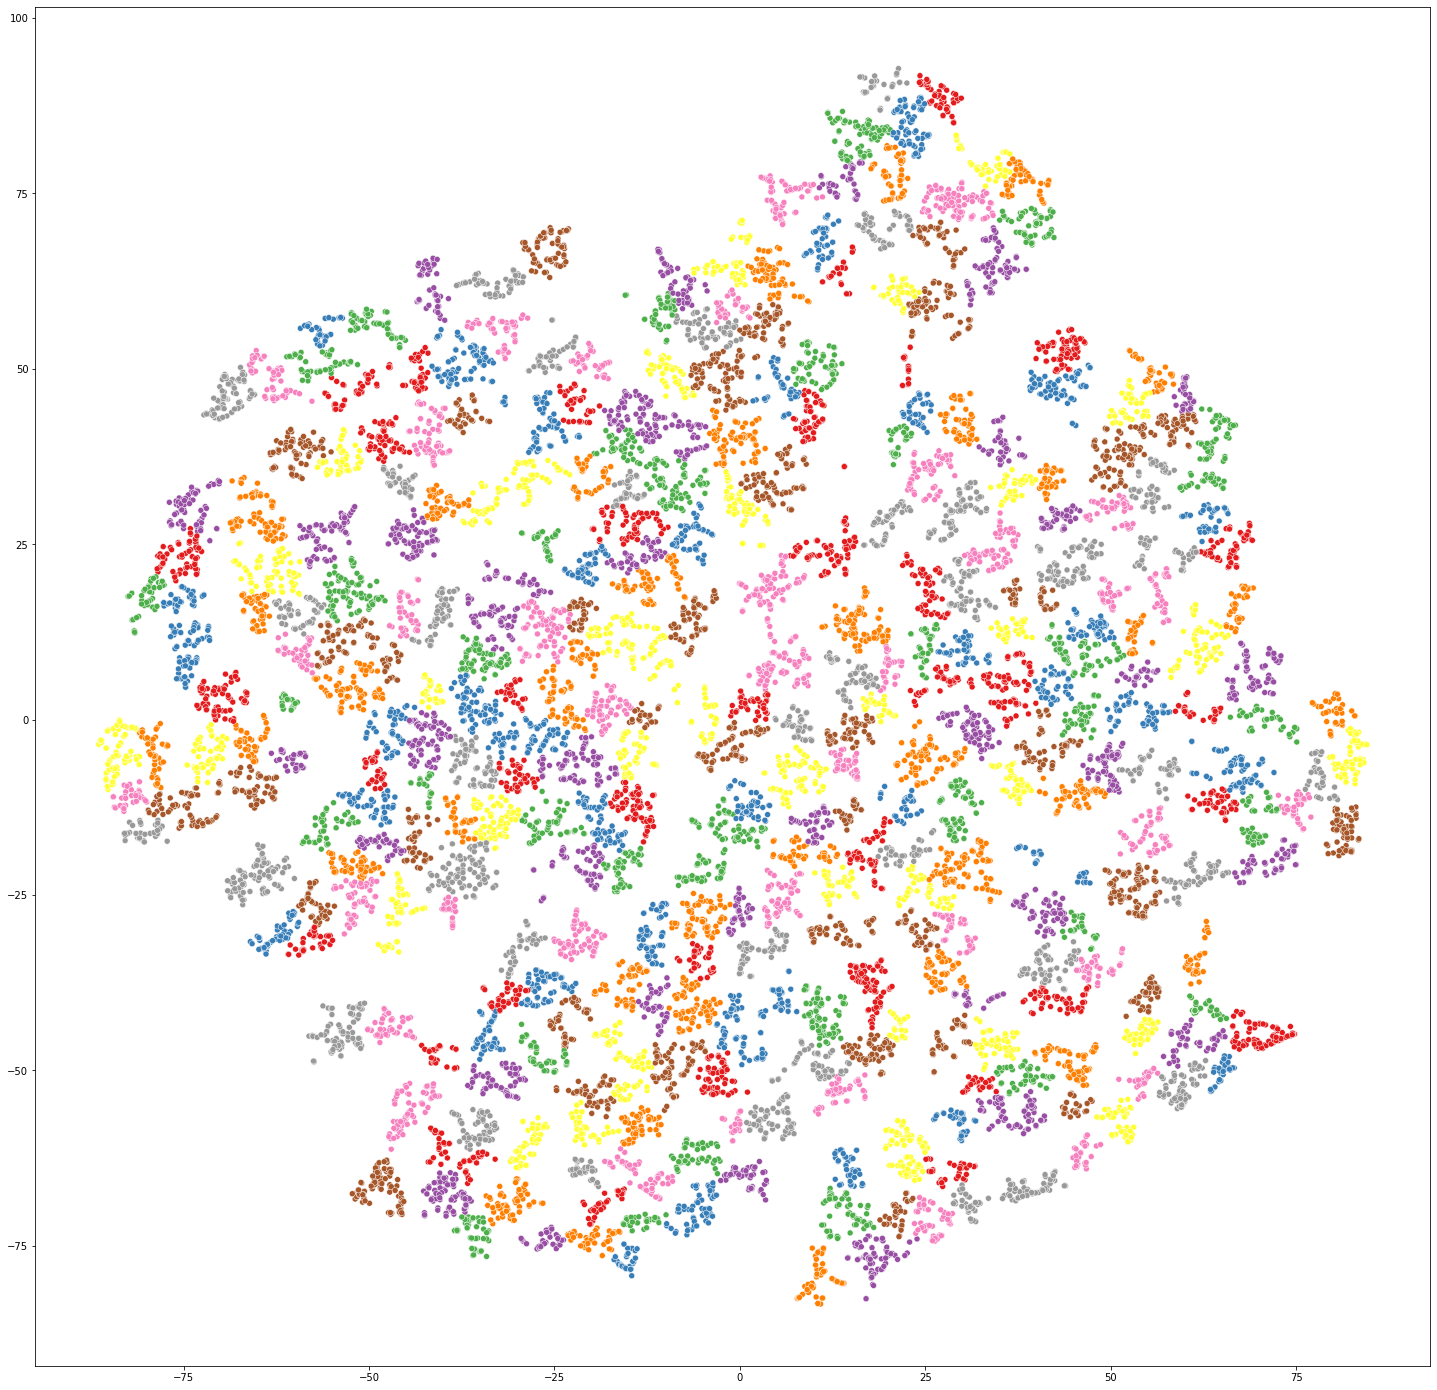

In [144]:
ward_res = ward(res_tsne)
vb = fcluster(ward_res,t=30, criterion='distance')
plt.figure(figsize=(25,25))
ax=sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],hue=vb,palette="Set1");
ax.get_legend().remove()

keeping the value of t (threshold to apply when forming flat clusters) = 30 then we can see the small cluster on the basis of there properties

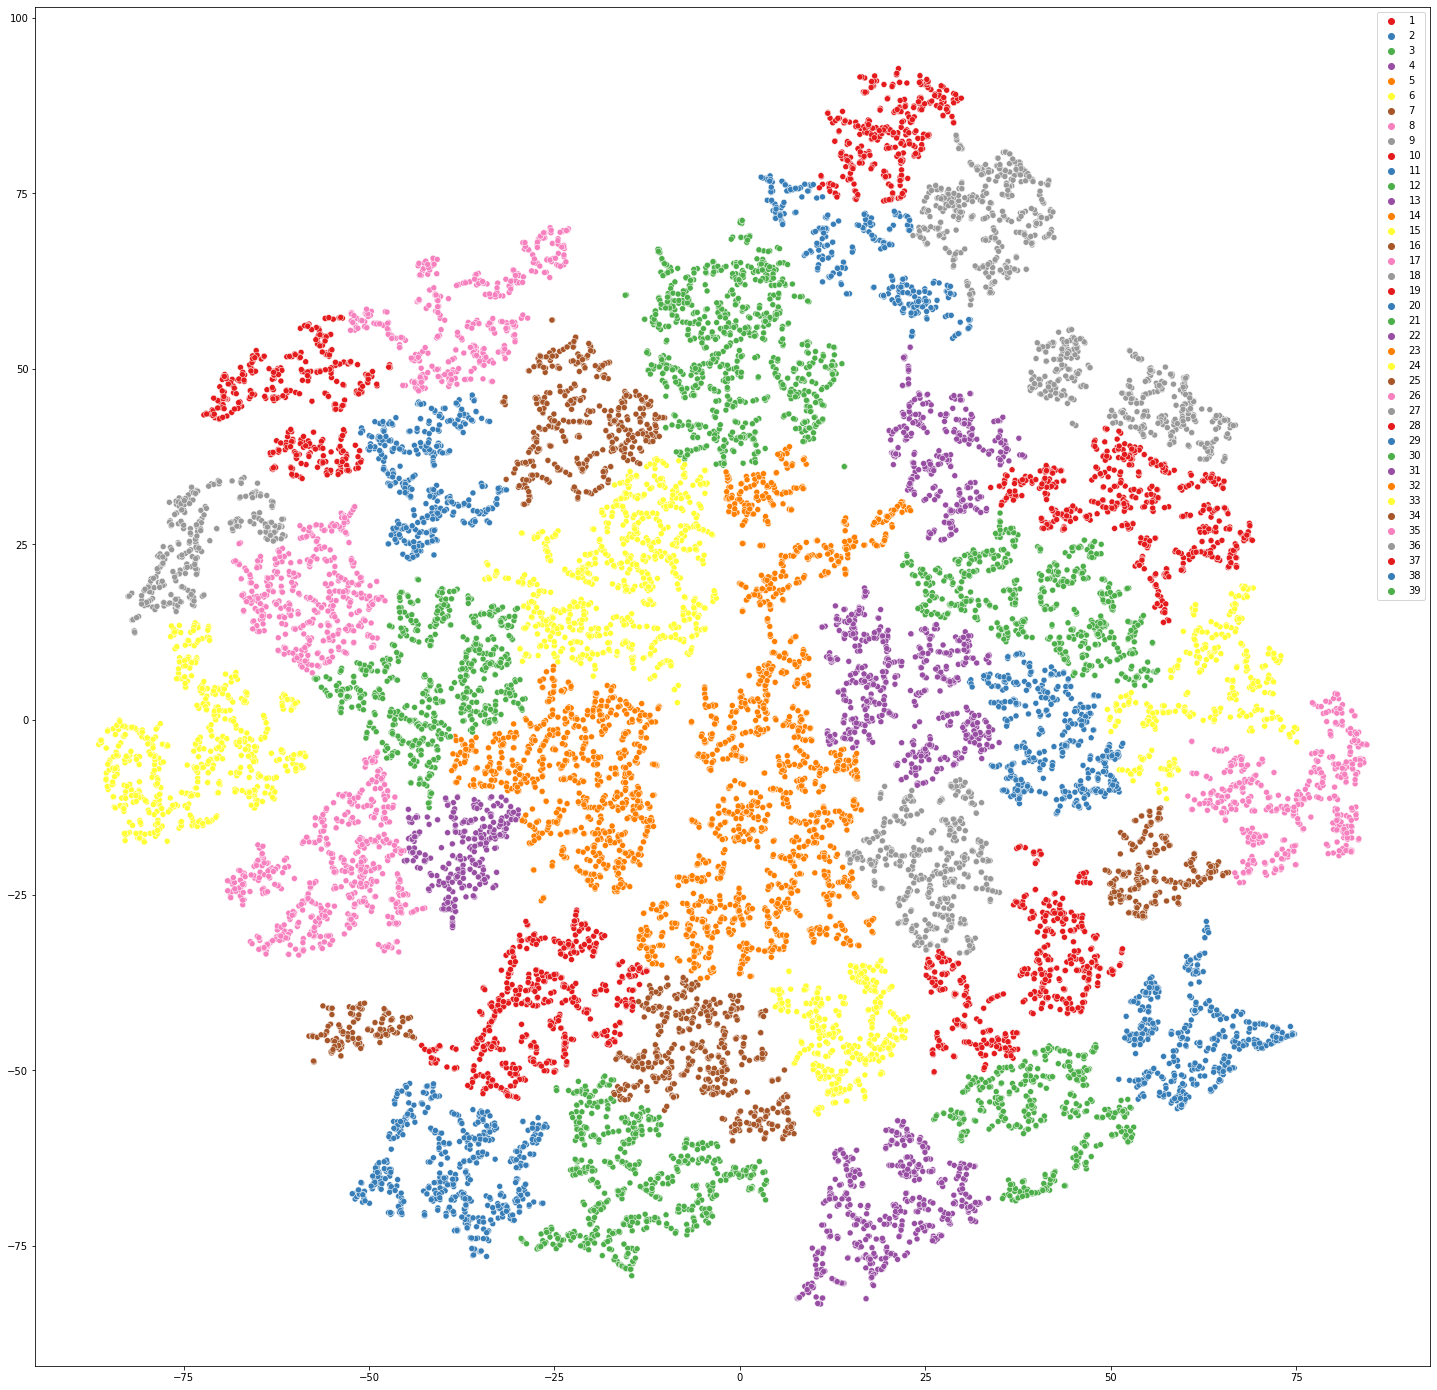

In [145]:
ward_res = ward(res_tsne)
vb = fcluster(ward_res,t=300, criterion='distance')
plt.figure(figsize=(25,25))
sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],hue=vb,palette="Set1");

keeping the value of t (threshold to apply when forming flat clusters) = 300 then we can see the small cluster on the basis of there properties we can see the number of cluster decreased to 40

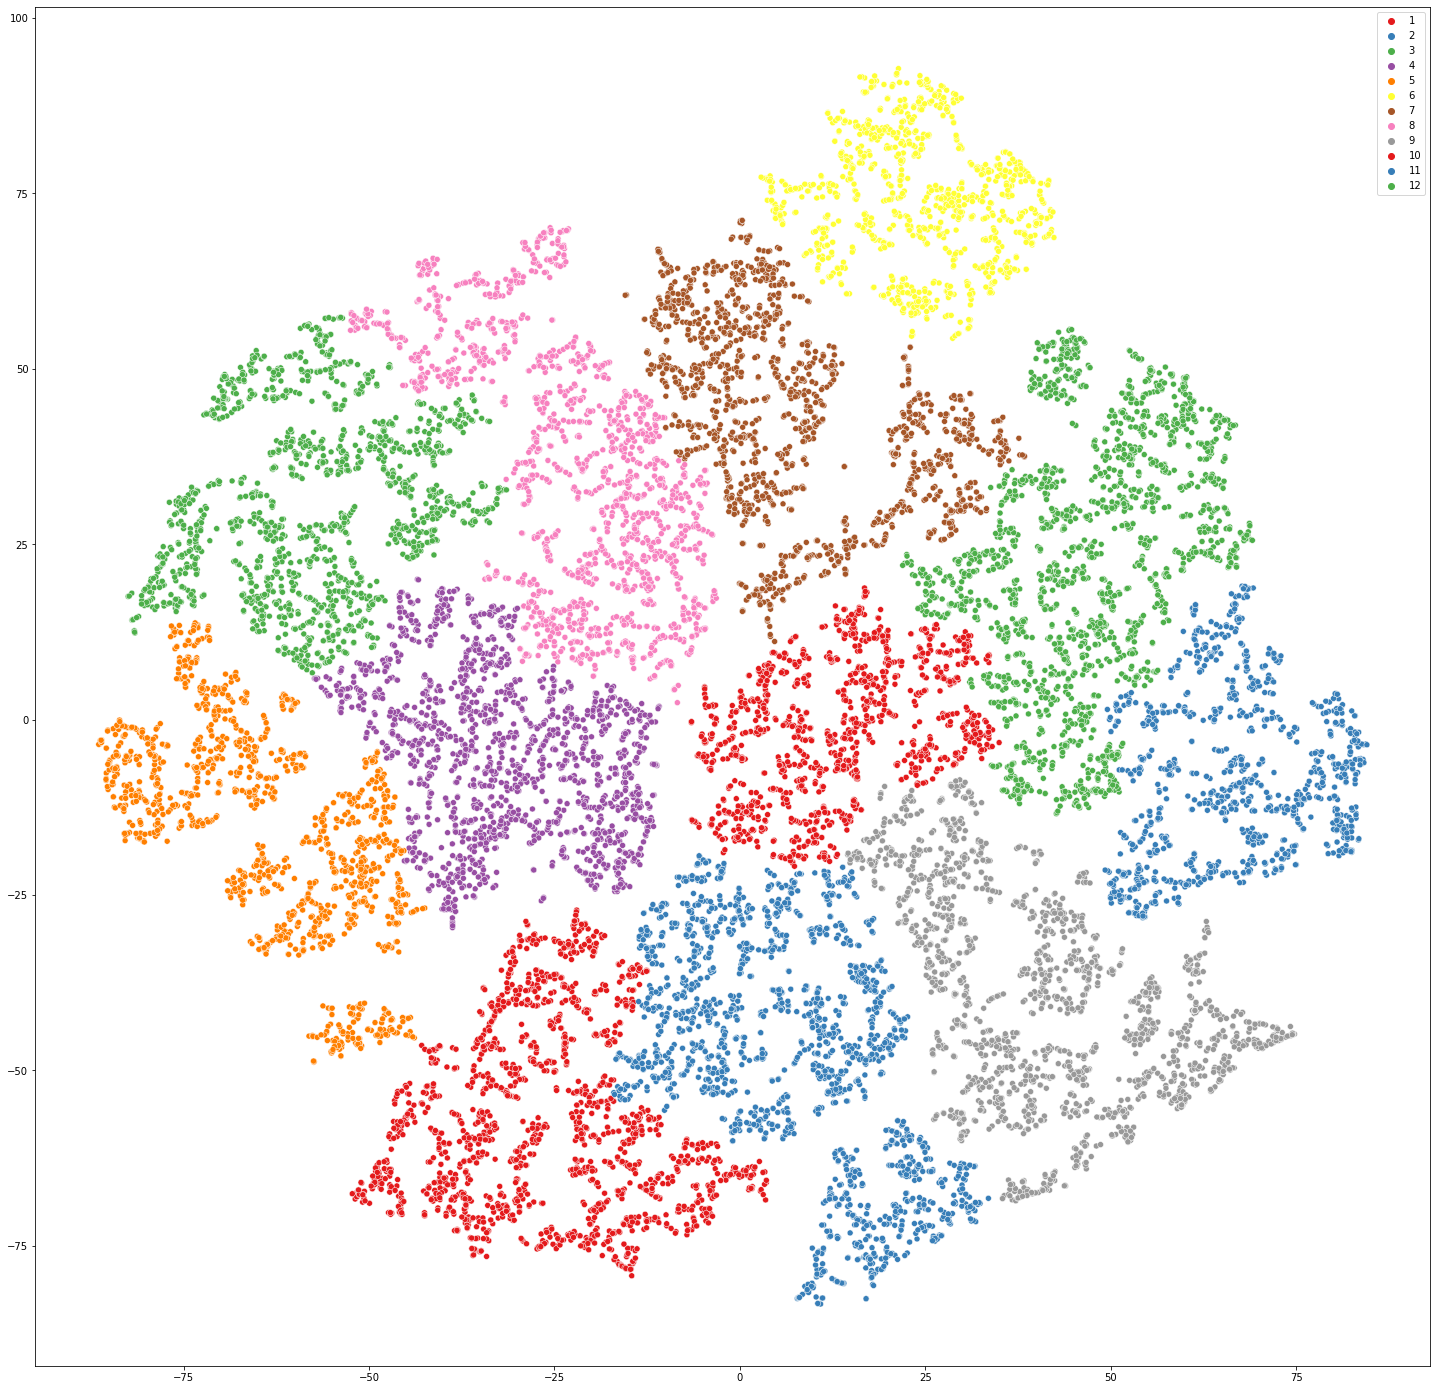

In [146]:
ward_res = ward(res_tsne)
vb = fcluster(ward_res,t=1000, criterion='distance')
plt.figure(figsize=(25,25))
sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],hue=vb,palette="Set1");


keeping the value of t (threshold to apply when forming flat clusters) = 1000 then we can see the small cluster on the basis of there properties we can see the number of cluster decreased to 13

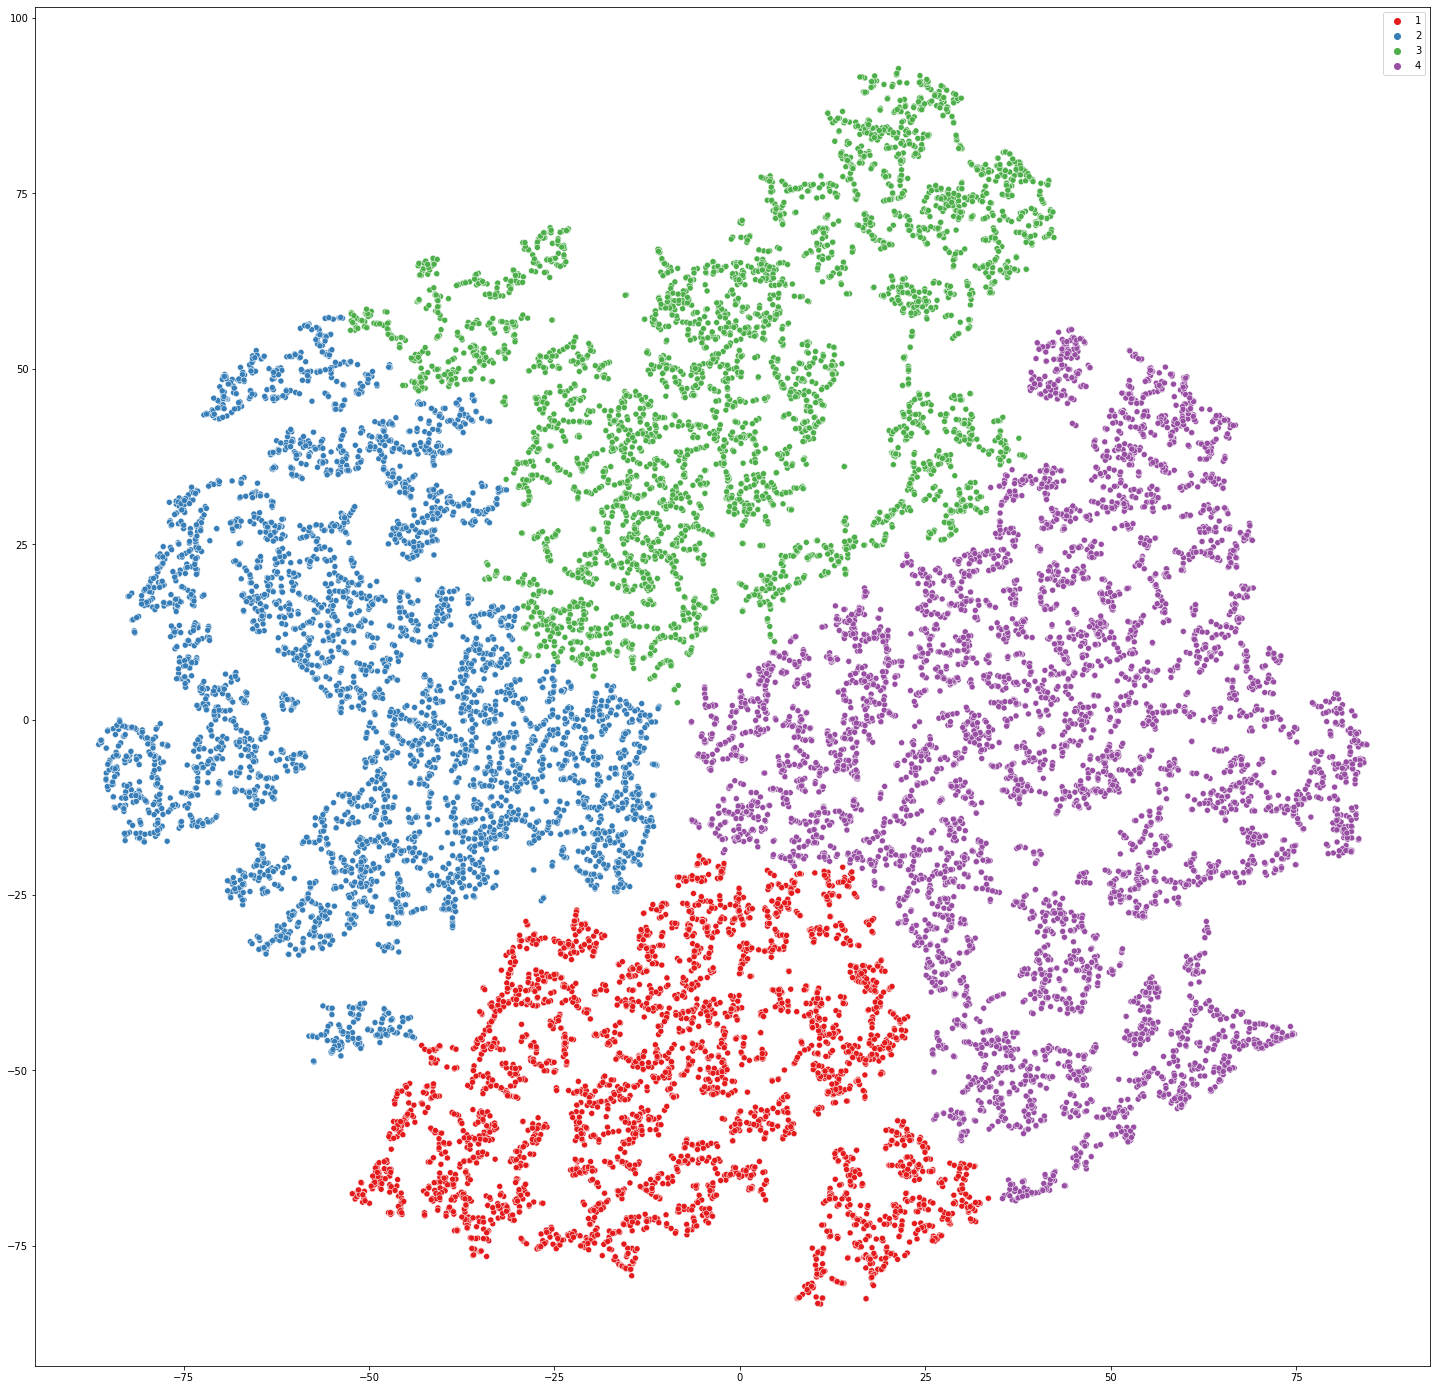

In [147]:
ward_res = ward(res_tsne)
vb = fcluster(ward_res,t=3000, criterion='distance')
plt.figure(figsize=(25,25))
sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],hue=vb,palette="Set1");


 keeping the value of t (threshold to apply when forming flat clusters) = 3000 then we can see the small cluster on the basis of there properties we can see the number of cluster decreased to 13

### Clustering on the basics of price

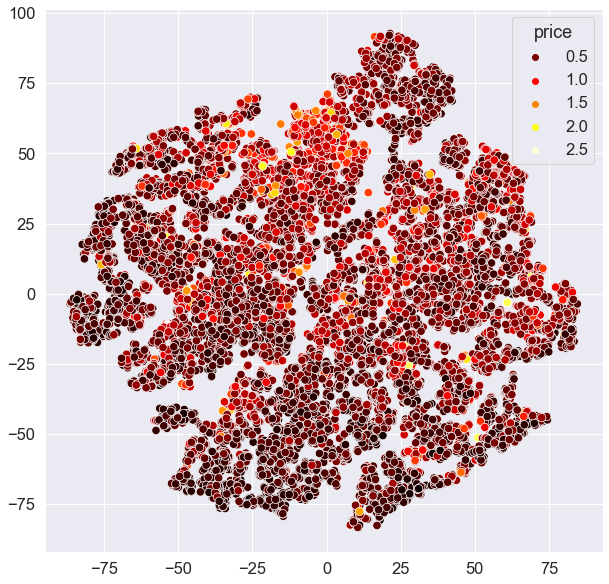

In [148]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],hue=df_final['price'],s=70,palette="hot");

From this we can conclude that the houses having hight prices are 

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
#importing the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# Importing the data

In [3]:
df=pd.read_csv('innercity_new.csv')

In [4]:
df

dayhours   price  room_bed  room_bath  living_measure  lot_measure  \
0      2014-05-07  460000       3.0       2.00          1760.0       9055.0   
1      2014-05-20  345600       5.0       3.50          2800.0       5120.0   
2      2014-05-02  750000       3.0       1.75          2240.0      10578.0   
3      2014-05-14  325000       3.0       2.50          2220.0       6049.0   
4      2014-05-15  390000       3.0       2.50          2240.0      10800.0   
...           ...     ...       ...        ...             ...          ...   
18286  2015-05-11  210000       2.0       1.00           990.0       8140.0   
18287  2015-05-04  617450       3.0       2.25          1580.0      14398.0   
18288  2015-05-06  545000       3.0       2.00          1900.0       9975.0   
18289  2015-05-05  603000       4.0       3.50          3610.0       6345.0   
18290  2015-05-05  370000       6.0       2.75          3240.0       5750.0   

       ceil  coast  sight  condition  ...  yr_built  living_measure15  \
0       2.0    0.0    0.0        4.0  ...    1985.0            2010.0   
1       2.5    0.0    0.0        3.0  ...    1903.0            1780.0   
2       2.0    0.0    0.0        5.0  ...    1923.0            1570.0   
3       2.0    0.0    0.0        4.0  ...    1990.0            1980.0   
4       2.0    0.0    0.0        3.0  ...    1996.0            1900.0   
...     ...    ...    ...        ...  ...       ...               ...   
18286   1.0    0.0    0.0        1.0  ...    1910.0            2150.0   
18287   1.0    0.0    0.0        3.0  ...    1981.0            1840.0   
18288   1.0    0.0    0.0        3.0  ...    1973.0            2140.0   
18289   2.0    0.0    0.0        3.0  ...    2008.0            3010.0   
18290   1.0    0.0    0.0        4.0  ...    1950.0            1230.0   

       lot_measure15  furnished  total_area  month/year  price_bins  \
0             9383.0        0.0     10815.0    May/2014           2   
1             5120.0        1.0      7920.0    May/2014           2   
2            10578.0        0.0     12818.0    May/2014           4   
3             7226.0        0.0      8269.0    May/2014           2   
4             9900.0        0.0     13040.0    May/2014           2   
...              ...        ...         ...         ...         ...   
18286         5000.0        0.0      9130.0    May/2015           1   
18287        14407.0        0.0     15978.0    May/2015           3   
18288         9825.0        0.0     11875.0    May/2015           3   
18289        29279.0        1.0      9955.0    May/2015           3   
18290         5750.0        0.0      8990.0    May/2015           2   

       has_basement house_land_ratio  has_renovated  
0                No             16.0             No  
1                No             35.0            Yes  
2               Yes             17.0             No  
3                No             27.0             No  
4                No             17.0             No  
...             ...              ...            ...  
18286            No             11.0             No  
18287           Yes             10.0             No  
18288           Yes             16.0             No  
18289           Yes             36.0             No  
18290           Yes             36.0             No  

[18291 rows x 23 columns]

##### Creating dummies for categorical variables: 'room_bed', 'room_bath', 'ceil', 'coast', 'sight', 'condition', 'quality', 'furnished','City', 'has_basement', 'has_renovated'

In [5]:
# Getting dummies 
dff = pd.get_dummies(df, columns=['room_bed', 'room_bath', 'ceil', 'coast', 'sight', 'condition', 'quality', 'furnished', 
                                        'has_basement', 'has_renovated'],drop_first=True)

In [6]:
# shape of the data
dff.shape

(18291, 71)

In [7]:
# let's see the data types of the features
dff.columns

Index(['dayhours', 'price', 'living_measure', 'lot_measure', 'ceil_measure',
       'basement', 'yr_built', 'living_measure15', 'lot_measure15',
       'total_area', 'month/year', 'price_bins', 'house_land_ratio',
       'room_bed_1.0', 'room_bed_2.0', 'room_bed_3.0', 'room_bed_4.0',
       'room_bed_5.0', 'room_bed_6.0', 'room_bed_7.0', 'room_bed_8.0',
       'room_bed_9.0', 'room_bed_10.0', 'room_bed_11.0', 'room_bath_0.5',
       'room_bath_0.75', 'room_bath_1.0', 'room_bath_1.25', 'room_bath_1.5',
       'room_bath_1.75', 'room_bath_2.0', 'room_bath_2.25', 'room_bath_2.5',
       'room_bath_2.75', 'room_bath_3.0', 'room_bath_3.25', 'room_bath_3.5',
       'room_bath_3.75', 'room_bath_4.0', 'room_bath_4.25', 'room_bath_4.5',
       'room_bath_4.75', 'room_bath_5.0', 'room_bath_5.25', 'room_bath_5.75',
       'ceil_1.5', 'ceil_2.0', 'ceil_2.5', 'ceil_3.0', 'ceil_3.5', 'coast_1.0',
       'sight_1.0', 'sight_2.0', 'sight_3.0', 'sight_4.0', 'condition_2.0',
       'condition_3.0', 'con

In [8]:
#let's drop the some column
dff=dff.drop(['dayhours','month/year','price_bins'],axis=1)


# Checking fo Multi-Collinearity using VIF


In [9]:
!pip install statsmodels

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = dff.columns
vif["vif_Factor"] = [variance_inflation_factor(dff.values, i) for i in range(dff.shape[1])]
vif

features   vif_Factor
0               price    11.918935
1      living_measure  8597.482058
2         lot_measure    40.963174
3        ceil_measure  6580.844536
4            basement   439.837724
..                ...          ...
63       quality_11.0    60.054393
64       quality_12.0     2.565603
65      furnished_1.0   653.162962
66   has_basement_Yes     7.329076
67  has_renovated_Yes     1.192545

[68 rows x 2 columns]

As we can see most of the values are greater then 10 then the data is highly corelated

# Checking significance of variable using p value 

In [11]:
data_new=dff.drop(['price'],axis=1)
selected_columns=data_new.columns

In [12]:
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [13]:
SL = 0.05
data_modeled, selected_columns = backwardElimination(data_new.values,dff['price'].values, SL, selected_columns)


In [14]:
result = pd.DataFrame()
result['price'] = dff.iloc[:,0]

In [15]:
dff.iloc[:,0]

0        460000
1        345600
2        750000
3        325000
4        390000
          ...  
18286    210000
18287    617450
18288    545000
18289    603000
18290    370000
Name: price, Length: 18291, dtype: int64

In [16]:
dff

price  living_measure  lot_measure  ceil_measure  basement  yr_built  \
0      460000          1760.0       9055.0        1760.0       0.0    1985.0   
1      345600          2800.0       5120.0        2800.0       0.0    1903.0   
2      750000          2240.0      10578.0        1550.0     690.0    1923.0   
3      325000          2220.0       6049.0        2220.0       0.0    1990.0   
4      390000          2240.0      10800.0        2240.0       0.0    1996.0   
...       ...             ...          ...           ...       ...       ...   
18286  210000           990.0       8140.0         990.0       0.0    1910.0   
18287  617450          1580.0      14398.0        1080.0     500.0    1981.0   
18288  545000          1900.0       9975.0        1500.0     400.0    1973.0   
18289  603000          3610.0       6345.0        2370.0    1240.0    2008.0   
18290  370000          3240.0       5750.0        2160.0    1080.0    1950.0   

       living_measure15  lot_measure15  total_area  house_land_ratio  ...  \
0                2010.0         9383.0     10815.0              16.0  ...   
1                1780.0         5120.0      7920.0              35.0  ...   
2                1570.0        10578.0     12818.0              17.0  ...   
3                1980.0         7226.0      8269.0              27.0  ...   
4                1900.0         9900.0     13040.0              17.0  ...   
...                 ...            ...         ...               ...  ...   
18286            2150.0         5000.0      9130.0              11.0  ...   
18287            1840.0        14407.0     15978.0              10.0  ...   
18288            2140.0         9825.0     11875.0              16.0  ...   
18289            3010.0        29279.0      9955.0              36.0  ...   
18290            1230.0         5750.0      8990.0              36.0  ...   

       quality_6.0  quality_7.0  quality_8.0  quality_9.0  quality_10.0  \
0                0            1            0            0             0   
1                0            0            0            1             0   
2                0            0            1            0             0   
3                0            0            1            0             0   
4                0            0            1            0             0   
...            ...          ...          ...          ...           ...   
18286            1            0            0            0             0   
18287            0            1            0            0             0   
18288            0            0            1            0             0   
18289            0            0            0            1             0   
18290            1            0            0            0             0   

       quality_11.0  quality_12.0  furnished_1.0  has_basement_Yes  \
0                 0             0              0                 0   
1                 0             0              1                 0   
2                 0             0              0                 1   
3                 0             0              0                 0   
4                 0             0              0                 0   
...             ...           ...            ...               ...   
18286             0             0              0                 0   
18287             0             0              0                 1   
18288             0             0              0                 1   
18289             0             0              1                 1   
18290             0             0              0                 1   

       has_renovated_Yes  
0                      0  
1                      1  
2                      0  
3                      0  
4                      0  
...                  ...  
18286                  0  
18287                  0  
18288                  0  
18289                  0  
18290                  0  

[18291 rows x 68 columns]

In [17]:
data_f1 = pd.DataFrame(data = data_modeled, columns = selected_columns)
data_f1

living_measure  lot_measure  ceil_measure  yr_built  living_measure15  \
0              1760.0       9055.0        1760.0    1985.0            2010.0   
1              2800.0       5120.0        2800.0    1903.0            1780.0   
2              2240.0      10578.0        1550.0    1923.0            1570.0   
3              2220.0       6049.0        2220.0    1990.0            1980.0   
4              2240.0      10800.0        2240.0    1996.0            1900.0   
...               ...          ...           ...       ...               ...   
18286           990.0       8140.0         990.0    1910.0            2150.0   
18287          1580.0      14398.0        1080.0    1981.0            1840.0   
18288          1900.0       9975.0        1500.0    1973.0            2140.0   
18289          3610.0       6345.0        2370.0    2008.0            3010.0   
18290          3240.0       5750.0        2160.0    1950.0            1230.0   

       lot_measure15  total_area  house_land_ratio  room_bed_1.0  \
0             9383.0     10815.0              16.0           0.0   
1             5120.0      7920.0              35.0           0.0   
2            10578.0     12818.0              17.0           0.0   
3             7226.0      8269.0              27.0           0.0   
4             9900.0     13040.0              17.0           0.0   
...              ...         ...               ...           ...   
18286         5000.0      9130.0              11.0           0.0   
18287        14407.0     15978.0              10.0           0.0   
18288         9825.0     11875.0              16.0           0.0   
18289        29279.0      9955.0              36.0           0.0   
18290         5750.0      8990.0              36.0           0.0   

       room_bed_2.0  ...  quality_5.0  quality_6.0  quality_7.0  quality_8.0  \
0               0.0  ...          0.0          0.0          1.0          0.0   
1               0.0  ...          0.0          0.0          0.0          0.0   
2               0.0  ...          0.0          0.0          0.0          1.0   
3               0.0  ...          0.0          0.0          0.0          1.0   
4               0.0  ...          0.0          0.0          0.0          1.0   
...             ...  ...          ...          ...          ...          ...   
18286           1.0  ...          0.0          1.0          0.0          0.0   
18287           0.0  ...          0.0          0.0          1.0          0.0   
18288           0.0  ...          0.0          0.0          0.0          1.0   
18289           0.0  ...          0.0          0.0          0.0          0.0   
18290           0.0  ...          0.0          1.0          0.0          0.0   

       quality_9.0  quality_10.0  quality_11.0  quality_12.0  \
0              0.0           0.0           0.0           0.0   
1              1.0           0.0           0.0           0.0   
2              0.0           0.0           0.0           0.0   
3              0.0           0.0           0.0           0.0   
4              0.0           0.0           0.0           0.0   
...            ...           ...           ...           ...   
18286          0.0           0.0           0.0           0.0   
18287          0.0           0.0           0.0           0.0   
18288          0.0           0.0           0.0           0.0   
18289          1.0           0.0           0.0           0.0   
18290          0.0           0.0           0.0           0.0   

       has_basement_Yes  has_renovated_Yes  
0                   0.0                0.0  
1                   0.0                1.0  
2                   1.0                0.0  
3                   0.0                0.0  
4                   0.0                0.0  
...                 ...                ...  
18286               0.0                0.0  
18287               1.0                0.0  
18288               1.0                0.0  
18289               1.0                0.0  
1829

In [18]:
selected_columns

Index(['living_measure', 'lot_measure', 'ceil_measure', 'yr_built',
       'living_measure15', 'lot_measure15', 'total_area', 'house_land_ratio',
       'room_bed_1.0', 'room_bed_2.0', 'room_bed_3.0', 'room_bath_0.5',
       'room_bath_0.75', 'room_bath_1.0', 'room_bath_1.25', 'room_bath_1.5',
       'room_bath_1.75', 'room_bath_2.0', 'room_bath_2.25', 'room_bath_2.5',
       'room_bath_2.75', 'room_bath_3.0', 'room_bath_3.25', 'room_bath_3.5',
       'room_bath_3.75', 'room_bath_4.0', 'room_bath_4.25', 'room_bath_4.5',
       'room_bath_4.75', 'room_bath_5.0', 'room_bath_5.25', 'ceil_1.5',
       'ceil_2.5', 'ceil_3.0', 'ceil_3.5', 'coast_1.0', 'sight_1.0',
       'sight_2.0', 'sight_3.0', 'sight_4.0', 'condition_2.0', 'condition_3.0',
       'condition_4.0', 'condition_5.0', 'quality_4.0', 'quality_5.0',
       'quality_6.0', 'quality_7.0', 'quality_8.0', 'quality_9.0',
       'quality_10.0', 'quality_11.0', 'quality_12.0', 'has_basement_Yes',
       'has_renovated_Yes'],
      dtype

These are the selected feature which we can use for analysis

## Creating data for model training

In [19]:
#Creating X, y for training and testing set
X = data_f1
y = dff["price"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=10)

In [21]:
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)
print(X_val.shape, y_val.shape)

(10288, 55) (10288,)
(4573, 55) (4573,)
(3430, 55) (3430,)


# Function for mape and adjusted R2

In [22]:
def mape(y_true, y_pred):
    """
    This function calculates MAPE.
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :returns: mean absolute percentage error
    """
    return np.mean(np.abs(np.array(y_pred) - np.array(y_true)) / np.array(y_true), axis=0)
def adjR(y_true, y_pred,p):
    R2=r2_score(y_true,y_pred)
    n=10
    return 1-(1-R2)*(n-1)/(n-p-1)

# Model building
Let's build the model and see their performances

#### Linear Regression (with Ridge and Lasso)

In [23]:
# defining the model
LR1 = LinearRegression()
LR1.fit(X_train, y_train)

# Making Predictions
y_LR1_predtr= LR1.predict(X_train)
y_LR1_predvl= LR1.predict(X_val)
y_LR1_predte= LR1.predict(X_test)

LR1.coef_

array([ 6.40634039e+01, -8.64880048e-01,  1.99933815e+01, -3.06323219e+03,
        7.46804084e+01, -1.48308395e+00,  1.05272036e+00,  2.83839631e+03,
        3.23915291e+04,  4.59506866e+04,  1.96279715e+04,  8.78224807e+04,
        1.42588596e+05,  1.73231049e+05,  2.25730268e+05,  1.78315002e+05,
        1.81881236e+05,  1.85825963e+05,  2.05765779e+05,  1.87376072e+05,
        1.88422103e+05,  2.18683801e+05,  2.72178591e+05,  2.74454276e+05,
        3.97261197e+05,  2.27714124e+05,  3.41620391e+05,  2.86823709e+05,
       -8.84756446e-09,  2.30997184e+05,  7.28439721e+05, -3.55492177e+03,
        3.25040360e+04,  5.36358987e+04,  2.59998201e+04,  2.95265591e+05,
        3.85606820e+04,  3.83227881e+04,  8.42995182e+04,  2.42299848e+05,
        1.06695355e+05,  1.26636505e+05,  1.46256355e+05,  1.82863847e+05,
       -3.82970384e+05, -4.06108244e+05, -3.55002341e+05, -2.66664203e+05,
       -1.79047173e+05, -2.95661402e+04,  1.02214403e+05,  2.35243726e+05,
        1.28190036e+06,  

In [24]:
# Performance on train data
LR1_tr_R2score=r2_score(y_train,y_LR1_predtr)
LR1_tr_RMSE=np.sqrt(mean_squared_error(y_train, y_LR1_predtr))
LR1_tr_MSE=mean_squared_error(y_train, y_LR1_predtr)
LR1_tr_MAE=mean_absolute_error(y_train, y_LR1_predtr)
LR1_tr_MAPE=mape(y_train, y_LR1_predtr)
LR1_tr_AR2=adjR(y_train, y_LR1_predtr,p=len(X.columns))

# Performance on val data
LR1_vl_R2score=r2_score(y_val,y_LR1_predvl)
LR1_vl_RMSE=np.sqrt(mean_squared_error(y_val, y_LR1_predvl))
LR1_vl_MSE=mean_squared_error(y_val, y_LR1_predvl)
LR1_vl_MAE=mean_absolute_error(y_val, y_LR1_predvl)
LR1_vl_MAPE=mape(y_val, y_LR1_predvl)
LR1_vl_AR2=adjR(y_val, y_LR1_predvl,p=len(X.columns))

# Performance on test data
LR1_te_R2score=r2_score(y_test,y_LR1_predte)
LR1_te_RMSE=np.sqrt(mean_squared_error(y_test, y_LR1_predte))
LR1_te_MSE=mean_squared_error(y_test, y_LR1_predte)
LR1_te_MAE=mean_absolute_error(y_test, y_LR1_predte)
LR1_te_MAPE=mape(y_test, y_LR1_predte)
LR1_te_AR2=adjR(y_test, y_LR1_predte,p=len(X.columns))

model_comp=pd.DataFrame({'Algorithm':['Simple Linear Reg Model'],
                       'train Score':LR1_tr_R2score,'RMSE_tr': LR1_tr_RMSE, 'MSE_tr': LR1_tr_MSE, 'MAE_tr': LR1_tr_MAE,
                         "Mape_tr":LR1_tr_MAPE, "Adjusted_r2_tr":LR1_tr_AR2,
                        'Val Score':LR1_vl_R2score,'RMSE_vl': LR1_vl_RMSE, 'MSE_vl': LR1_vl_MSE, 'MAE_vl': LR1_vl_MAE,
                         "Mape_val":LR1_vl_MAPE, "Adjusted_r2_val":LR1_vl_AR2,
                      'test Score':LR1_te_R2score,'RMSE_te': LR1_te_RMSE, 'MSE_te': LR1_te_MSE, 'MAE_te': LR1_te_MAE,
                        "Mape_te":LR1_te_MAPE, "Adjusted_r2_te":LR1_te_AR2})
model_comp

Algorithm  train Score       RMSE_tr        MSE_tr  \
0  Simple Linear Reg Model     0.621488  155468.51843  2.417046e+10   

          MAE_tr   Mape_tr  Adjusted_r2_tr  Val Score        RMSE_vl  \
0  111377.884683  0.259166        1.074057   0.625768  158455.473771   

         MSE_vl         MAE_vl  Mape_val  Adjusted_r2_val  test Score  \
0  2.510814e+10  113973.495055  0.267232         1.073219    0.625564   

         RMSE_te        MSE_te        MAE_te   Mape_te  Adjusted_r2_te  
0  159636.958866  2.548396e+10  113351.64161  0.264585        1.073259

The linear regression model performed with scores 0.62, 0.61 & 0.62 in training data set, validation data and test data set respectively

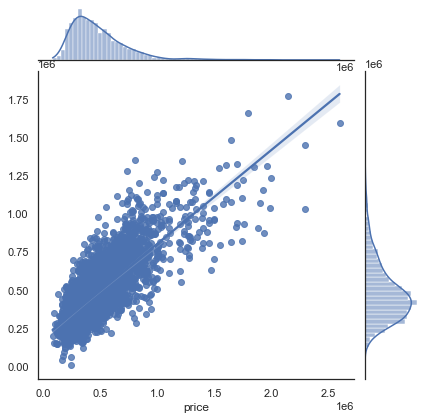

In [25]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_val, y=y_LR1_predvl, kind="reg")

#### Lasso model

In [26]:
# defining the model
Lasso1 = Lasso(alpha=1)
Lasso1.fit(X_train, y_train)

# Making Predictions
y_Lasso1_predtr= Lasso1.predict(X_train)
y_Lasso1_predvl= Lasso1.predict(X_val)
y_Lasso1_predte= Lasso1.predict(X_test)

Lasso1.coef_

array([ 6.41570515e+01, -8.51051789e-01,  1.98567292e+01, -3.06136384e+03,
        7.47556511e+01, -1.48983992e+00,  1.06316133e+00,  2.84277579e+03,
        3.24949588e+04,  4.61166269e+04,  1.97622289e+04, -2.83619963e+04,
        1.56131653e+04,  4.67166559e+04,  9.39311634e+04,  5.18067959e+04,
        5.53579620e+04,  5.93257960e+04,  7.92240066e+04,  6.08686616e+04,
        6.19111765e+04,  9.22122008e+04,  1.45684934e+05,  1.47905017e+05,
        2.70511228e+05,  1.00905514e+05,  2.13792101e+05,  1.59909169e+05,
        0.00000000e+00,  1.01127270e+05,  5.96980989e+05, -3.39818949e+03,
        3.24285523e+04,  5.36023403e+04,  2.25102321e+04,  2.95293128e+05,
        3.75136391e+04,  3.83186622e+04,  8.42278082e+04,  2.42258456e+05,
        9.73887168e+04,  1.17430836e+05,  1.37049697e+05,  1.73702438e+05,
       -2.55267690e+05, -2.79747117e+05, -2.28568051e+05, -1.40320732e+05,
       -5.27069252e+04,  9.68027753e+04,  2.28529686e+05,  3.61458094e+05,
        1.40285671e+06,  

In [27]:
# Performance on train data
Lasso1_tr_R2score=r2_score(y_train,y_Lasso1_predtr)
Lasso1_tr_RMSE=np.sqrt(mean_squared_error(y_train, y_Lasso1_predtr))
Lasso1_tr_MSE=mean_squared_error(y_train, y_Lasso1_predtr)
Lasso1_tr_MAE=mean_absolute_error(y_train, y_Lasso1_predtr)
Lasso1_tr_MAPE=mape(y_train, y_Lasso1_predtr)
Lasso1_tr_AR2=adjR(y_train, y_Lasso1_predtr,p=len(X.columns))

# Performance on val data
Lasso1_vl_R2score=r2_score(y_val,y_Lasso1_predvl)
Lasso1_vl_RMSE=np.sqrt(mean_squared_error(y_val, y_Lasso1_predvl))
Lasso1_vl_MSE=mean_squared_error(y_val, y_Lasso1_predvl)
Lasso1_vl_MAE=mean_absolute_error(y_val, y_Lasso1_predvl)
Lasso1_vl_MAPE=mape(y_val, y_Lasso1_predvl)
Lasso1_vl_AR2=adjR(y_val, y_Lasso1_predvl,p=len(X.columns))

# Performance on test data
Lasso1_te_R2score=r2_score(y_test,y_Lasso1_predte)
Lasso1_te_RMSE=np.sqrt(mean_squared_error(y_test, y_Lasso1_predte))
Lasso1_te_MSE=mean_squared_error(y_test, y_Lasso1_predte)
Lasso1_te_MAE=mean_absolute_error(y_test, y_Lasso1_predte)
Lasso1_te_MAPE=mape(y_test, y_Lasso1_predte)
Lasso1_te_AR2=adjR(y_test, y_Lasso1_predte,p=len(X.columns))

Lasso1_df=pd.DataFrame({'Algorithm':['SLinear-Reg (Lasso)'],
                       'train Score':Lasso1_tr_R2score,'RMSE_tr': Lasso1_tr_RMSE, 'MSE_tr': Lasso1_tr_MSE, 'MAE_tr': Lasso1_tr_MAE,
                         "Mape_tr":Lasso1_tr_MAPE, "Adjusted_r2_tr":Lasso1_tr_AR2,
                        'Val Score':Lasso1_vl_R2score,'RMSE_vl': Lasso1_vl_RMSE, 'MSE_vl': Lasso1_vl_MSE, 'MAE_vl': Lasso1_vl_MAE,
                         "Mape_val":Lasso1_vl_MAPE, "Adjusted_r2_val":Lasso1_vl_AR2,
                      'test Score':Lasso1_te_R2score,'RMSE_te': Lasso1_te_RMSE, 'MSE_te': Lasso1_te_MSE, 'MAE_te': Lasso1_te_MAE,
                        "Mape_te":Lasso1_te_MAPE, "Adjusted_r2_te":Lasso1_te_AR2})
model_comp = pd.concat([model_comp, Lasso1_df]).reset_index(drop=True)

model_comp

Algorithm  train Score        RMSE_tr        MSE_tr  \
0  Simple Linear Reg Model     0.621488  155468.518430  2.417046e+10   
1      SLinear-Reg (Lasso)     0.621413  155483.805423  2.417521e+10   

          MAE_tr   Mape_tr  Adjusted_r2_tr  Val Score        RMSE_vl  \
0  111377.884683  0.259166        1.074057   0.625768  158455.473771   
1  111391.345669  0.259206        1.074071   0.627354  158119.391005   

         MSE_vl         MAE_vl  Mape_val  Adjusted_r2_val  test Score  \
0  2.510814e+10  113973.495055  0.267232         1.073219    0.625564   
1  2.500174e+10  113923.780764  0.267115         1.072909    0.626842   

         RMSE_te        MSE_te         MAE_te   Mape_te  Adjusted_r2_te  
0  159636.958866  2.548396e+10  113351.641610  0.264585        1.073259  
1  159364.279177  2.539697e+10  113295.563188  0.264539        1.073009

The lasso linear regression model performed with scores  0.62, 0.61 & 0.62 in training data set, validation data and test data set respectively. The coefficeints of 1 variable in lasso model is almost '0', signifying that the variable with '0' coefficient can be dropped.

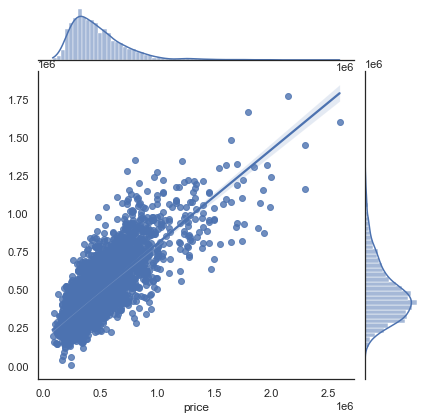

In [28]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_val, y=y_Lasso1_predvl, kind="reg")

# Ridge model

In [29]:
# defining the model
Ridge1 = Ridge(alpha=0.5)
Ridge1.fit(X_train, y_train)

# Making Predictions
y_Ridge1_predtr= Ridge1.predict(X_train)
y_Ridge1_predvl= Ridge1.predict(X_val)
y_Ridge1_predte= Ridge1.predict(X_test)

Ridge1.coef_

array([ 6.47462950e+01, -8.30507606e-01,  2.01512623e+01, -3.05748690e+03,
        7.51207995e+01, -1.48147371e+00,  1.09297726e+00,  2.87199173e+03,
        3.16533652e+04,  4.63935644e+04,  2.00433640e+04, -6.54984152e+04,
       -4.39606062e+04, -1.16390490e+04,  3.49589086e+04, -6.72800775e+03,
       -3.33722653e+03,  5.96598032e+02,  2.02926629e+04,  1.68924720e+03,
        2.63865786e+03,  3.29756279e+04,  8.86387364e+04,  8.81832776e+04,
        2.08693871e+05,  4.10306235e+04,  1.45908031e+05,  9.84259581e+04,
        0.00000000e+00,  3.80711855e+04,  4.34023972e+05, -3.47258963e+03,
        3.21889883e+04,  5.35563727e+04,  2.21753898e+04,  2.91895586e+05,
        3.65387054e+04,  3.88793896e+04,  8.38990606e+04,  2.42226879e+05,
        8.08527624e+04,  1.01563240e+05,  1.21036978e+05,  1.57725781e+05,
       -3.37948472e+05, -3.75797695e+05, -3.26254889e+05, -2.38617450e+05,
       -1.51549834e+05, -2.74772207e+03,  1.28380656e+05,  2.60965519e+05,
        1.04356989e+06,  

In [30]:
# Performance on train data
Ridge1_tr_R2score=r2_score(y_train,y_Ridge1_predtr)
Ridge1_tr_RMSE=np.sqrt(mean_squared_error(y_train, y_Ridge1_predtr))
Ridge1_tr_MSE=mean_squared_error(y_train, y_Ridge1_predtr)
Ridge1_tr_MAE=mean_absolute_error(y_train, y_Ridge1_predtr)
Ridge1_tr_MAPE=mape(y_train, y_Ridge1_predtr)
Ridge1_tr_AR2=adjR(y_train, y_Ridge1_predtr,p=len(X.columns))

# Performance on val data
Ridge1_vl_R2score=r2_score(y_val,y_Ridge1_predvl)
Ridge1_vl_RMSE=np.sqrt(mean_squared_error(y_val, y_Ridge1_predvl))
Ridge1_vl_MSE=mean_squared_error(y_val, y_Ridge1_predvl)
Ridge1_vl_MAE=mean_absolute_error(y_val, y_Ridge1_predvl)
Ridge1_vl_MAPE=mape(y_val, y_Ridge1_predvl)
Ridge1_vl_AR2=adjR(y_val, y_Ridge1_predvl,p=len(X.columns))

# Performance on test data
Ridge1_te_R2score=r2_score(y_test,y_Ridge1_predte)
Ridge1_te_RMSE=np.sqrt(mean_squared_error(y_test, y_Ridge1_predte))
Ridge1_te_MSE=mean_squared_error(y_test, y_Ridge1_predte)
Ridge1_te_MAE=mean_absolute_error(y_test, y_Ridge1_predte)
Ridge1_te_MAPE=mape(y_test, y_Ridge1_predte)
Ridge1_te_AR2=adjR(y_test, y_Ridge1_predte,p=len(X.columns))

Ridge1_df=pd.DataFrame({'Algorithm':['SLinear-Reg (Ridge)'],
                       'train Score':Ridge1_tr_R2score,'RMSE_tr': Ridge1_tr_RMSE, 'MSE_tr': Ridge1_tr_MSE, 'MAE_tr': Ridge1_tr_MAE,
                         "Mape_tr":Ridge1_tr_MAPE, "Adjusted_r2_tr":Ridge1_tr_AR2,
                        'Val Score':Ridge1_vl_R2score,'RMSE_vl': Ridge1_vl_RMSE, 'MSE_vl': Ridge1_vl_MSE, 'MAE_vl': Ridge1_vl_MAE,
                         "Mape_val":Ridge1_vl_MAPE, "Adjusted_r2_val":Ridge1_vl_AR2,
                      'test Score':Ridge1_te_R2score,'RMSE_te': Ridge1_te_RMSE, 'MSE_te': Ridge1_te_MSE, 'MAE_te': Ridge1_te_MAE,
                        "Mape_te":Ridge1_te_MAPE, "Adjusted_r2_te":Ridge1_te_AR2})
model_comp = pd.concat([model_comp, Ridge1_df]).reset_index(drop=True)

model_comp

Algorithm  train Score        RMSE_tr        MSE_tr  \
0  Simple Linear Reg Model     0.621488  155468.518430  2.417046e+10   
1      SLinear-Reg (Lasso)     0.621413  155483.805423  2.417521e+10   
2      SLinear-Reg (Ridge)     0.621065  155555.327465  2.419746e+10   

          MAE_tr   Mape_tr  Adjusted_r2_tr  Val Score        RMSE_vl  \
0  111377.884683  0.259166        1.074057   0.625768  158455.473771   
1  111391.345669  0.259206        1.074071   0.627354  158119.391005   
2  111469.771752  0.259326        1.074140   0.627816  158021.265005   

         MSE_vl         MAE_vl  Mape_val  Adjusted_r2_val  test Score  \
0  2.510814e+10  113973.495055  0.267232         1.073219    0.625564   
1  2.500174e+10  113923.780764  0.267115         1.072909    0.626842   
2  2.497072e+10  113960.244193  0.267365         1.072819    0.627308   

         RMSE_te        MSE_te         MAE_te   Mape_te  Adjusted_r2_te  
0  159636.958866  2.548396e+10  113351.641610  0.264585        1.073259  
1  159364.279177  2.539697e+10  113295.563188  0.264539        1.073009  
2  159264.650115  2.536523e+10  113309.123096  0.264680        1.072918


The Ridge linear regression model performed with scores 0.62, 0.61 & 0.62 in training data set, validation data and test data set respectively. The coefficeints of variables in ridge model are all non-zero, indicating that non of the variables can be dropped.

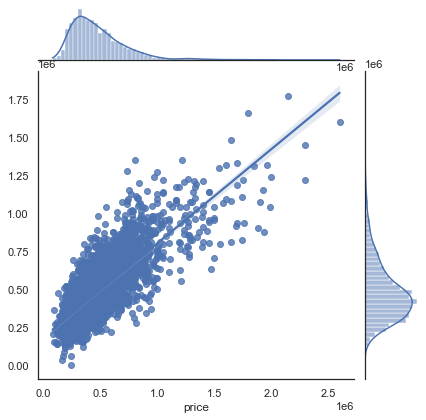

In [31]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_val, y=y_Ridge1_predvl, kind="reg")

In summary, Linear models have performed almost with similar results in both regularized model and non-regularized models
From the graph we can also see that the over model is in ideal state as  regularized model and non-regularized models

### KNN Regressor

In [32]:
# defining the model
knn1 = KNeighborsRegressor(n_neighbors=4,weights='distance')
knn1.fit(X_train, y_train)

# Making Predictions
y_knn1_predtr= knn1.predict(X_train)
y_knn1_predvl= knn1.predict(X_val)
y_knn1_predte= knn1.predict(X_test)

In [33]:
# Performance on train data
knn1_tr_R2score=r2_score(y_train,y_knn1_predtr)
knn1_tr_RMSE=np.sqrt(mean_squared_error(y_train, y_knn1_predtr))
knn1_tr_MSE=mean_squared_error(y_train, y_knn1_predtr)
knn1_tr_MAE=mean_absolute_error(y_train, y_knn1_predtr)
knn1_tr_MAPE=mape(y_train, y_knn1_predtr)
knn1_tr_AR2=adjR(y_train, y_knn1_predtr,p=len(X.columns))

# Performance on val data
knn1_vl_R2score=r2_score(y_val,y_knn1_predvl)
knn1_vl_RMSE=np.sqrt(mean_squared_error(y_val, y_knn1_predvl))
knn1_vl_MSE=mean_squared_error(y_val, y_knn1_predvl)
knn1_vl_MAE=mean_absolute_error(y_val, y_knn1_predvl)
knn1_vl_MAPE=mape(y_val, y_knn1_predvl)
knn1_vl_AR2=adjR(y_val, y_knn1_predvl,p=len(X.columns))

# Performance on test data
knn1_te_R2score=r2_score(y_test,y_knn1_predte)
knn1_te_RMSE=np.sqrt(mean_squared_error(y_test, y_knn1_predte))
knn1_te_MSE=mean_squared_error(y_test, y_knn1_predte)
knn1_te_MAE=mean_absolute_error(y_test, y_knn1_predte)
knn1_te_MAPE=mape(y_test, y_knn1_predte)
knn1_te_AR2=adjR(y_test, y_knn1_predte,p=len(X.columns))

knn1_df=pd.DataFrame({'Algorithm':['KNN'],
                       'train Score':knn1_tr_R2score,'RMSE_tr': knn1_tr_RMSE, 'MSE_tr': knn1_tr_MSE, 'MAE_tr': knn1_tr_MAE,
                         "Mape_tr":knn1_tr_MAPE, "Adjusted_r2_tr":knn1_tr_AR2,
                        'Val Score':knn1_vl_R2score,'RMSE_vl': knn1_vl_RMSE, 'MSE_vl': knn1_vl_MSE, 'MAE_vl': knn1_vl_MAE,
                         "Mape_val":knn1_vl_MAPE, "Adjusted_r2_val":knn1_vl_AR2,
                      'test Score':knn1_te_R2score,'RMSE_te': knn1_te_RMSE, 'MSE_te': knn1_te_MSE, 'MAE_te': knn1_te_MAE,
                        "Mape_te":knn1_te_MAPE, "Adjusted_r2_te":knn1_te_AR2})
model_comp = pd.concat([model_comp, knn1_df]).reset_index(drop=True)

model_comp

Algorithm  train Score        RMSE_tr        MSE_tr  \
0  Simple Linear Reg Model     0.621488  155468.518430  2.417046e+10   
1      SLinear-Reg (Lasso)     0.621413  155483.805423  2.417521e+10   
2      SLinear-Reg (Ridge)     0.621065  155555.327465  2.419746e+10   
3                      KNN     0.998847    8582.103202  7.365250e+07   

          MAE_tr   Mape_tr  Adjusted_r2_tr  Val Score        RMSE_vl  \
0  111377.884683  0.259166        1.074057   0.625768  158455.473771   
1  111391.345669  0.259206        1.074071   0.627354  158119.391005   
2  111469.771752  0.259326        1.074140   0.627816  158021.265005   
3     729.158534  0.002458        1.000226   0.378093  204267.650079   

         MSE_vl         MAE_vl  Mape_val  Adjusted_r2_val  test Score  \
0  2.510814e+10  113973.495055  0.267232         1.073219    0.625564   
1  2.500174e+10  113923.780764  0.267115         1.072909    0.626842   
2  2.497072e+10  113960.244193  0.267365         1.072819    0.627308   
3  4.172527e+10  140808.504496  0.318565         1.121678    0.405864   

         RMSE_te        MSE_te         MAE_te   Mape_te  Adjusted_r2_te  
0  159636.958866  2.548396e+10  113351.641610  0.264585        1.073259  
1  159364.279177  2.539697e+10  113295.563188  0.264539        1.073009  
2  159264.650115  2.536523e+10  113309.123096  0.264680        1.072918  
3  201088.603207  4.043663e+10  140258.065201  0.319680        1.116244

Though KNN regressor performed well in training set, the performance score in validation set is very less. This shows that the model is overfitted in training set

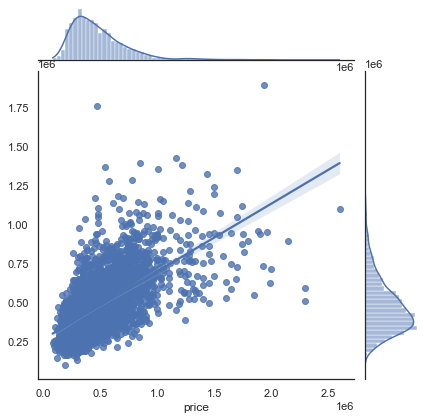

In [34]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_val, y=y_knn1_predvl, kind="reg")

From plot we can say that knn is not working properly for this case as many prediction are not over the line

### Support vector regressor

In [35]:
# defining the model
SVR1 = SVR(gamma='auto',C=10.0, epsilon=0.2,kernel='rbf')
SVR1.fit(X_train, y_train)

# Making Predictions
y_SVR1_predtr= SVR1.predict(X_train)
y_SVR1_predvl= SVR1.predict(X_val)
y_SVR1_predte= SVR1.predict(X_test)

In [36]:
# Performance on train data
SVR1_tr_R2score=r2_score(y_train,y_SVR1_predtr)
SVR1_tr_RMSE=np.sqrt(mean_squared_error(y_train, y_SVR1_predtr))
SVR1_tr_MSE=mean_squared_error(y_train, y_SVR1_predtr)
SVR1_tr_MAE=mean_absolute_error(y_train, y_SVR1_predtr)
SVR1_tr_MAPE=mape(y_train, y_SVR1_predtr)
SVR1_tr_AR2=adjR(y_train, y_SVR1_predtr,p=len(X.columns))

# Performance on val data
SVR1_vl_R2score=r2_score(y_val,y_SVR1_predvl)
SVR1_vl_RMSE=np.sqrt(mean_squared_error(y_val, y_SVR1_predvl))
SVR1_vl_MSE=mean_squared_error(y_val, y_SVR1_predvl)
SVR1_vl_MAE=mean_absolute_error(y_val, y_SVR1_predvl)
SVR1_vl_MAPE=mape(y_val, y_SVR1_predvl)
SVR1_vl_AR2=adjR(y_val, y_SVR1_predvl,p=len(X.columns))

# Performance on test data
SVR1_te_R2score=r2_score(y_test,y_SVR1_predte)
SVR1_te_RMSE=np.sqrt(mean_squared_error(y_test, y_SVR1_predte))
SVR1_te_MSE=mean_squared_error(y_test, y_SVR1_predte)
SVR1_te_MAE=mean_absolute_error(y_test, y_SVR1_predte)
SVR1_te_MAPE=mape(y_test, y_SVR1_predte)
SVR1_te_AR2=adjR(y_test, y_SVR1_predte,p=len(X.columns))

SVR1_df=pd.DataFrame({'Algorithm':['SVR with kernel rbf'],
                       'train Score':SVR1_tr_R2score,'RMSE_tr': SVR1_tr_RMSE, 'MSE_tr': SVR1_tr_MSE, 'MAE_tr': SVR1_tr_MAE,
                         "Mape_tr":SVR1_tr_MAPE, "Adjusted_r2_tr":SVR1_tr_AR2,
                        'Val Score':SVR1_vl_R2score,'RMSE_vl': SVR1_vl_RMSE, 'MSE_vl': SVR1_vl_MSE, 'MAE_vl': SVR1_vl_MAE,
                         "Mape_val":SVR1_vl_MAPE, "Adjusted_r2_val":SVR1_vl_AR2,
                      'test Score':SVR1_te_R2score,'RMSE_te': SVR1_te_RMSE, 'MSE_te': SVR1_te_MSE, 'MAE_te': SVR1_te_MAE,
                        "Mape_te":SVR1_te_MAPE, "Adjusted_r2_te":SVR1_te_AR2})
model_comp = pd.concat([model_comp, SVR1_df]).reset_index(drop=True)

model_comp

Algorithm  train Score        RMSE_tr        MSE_tr  \
0  Simple Linear Reg Model     0.621488  155468.518430  2.417046e+10   
1      SLinear-Reg (Lasso)     0.621413  155483.805423  2.417521e+10   
2      SLinear-Reg (Ridge)     0.621065  155555.327465  2.419746e+10   
3                      KNN     0.998847    8582.103202  7.365250e+07   
4      SVR with kernel rbf    -0.049504  258877.504279  6.701756e+10   

          MAE_tr   Mape_tr  Adjusted_r2_tr  Val Score        RMSE_vl  \
0  111377.884683  0.259166        1.074057   0.625768  158455.473771   
1  111391.345669  0.259206        1.074071   0.627354  158119.391005   
2  111469.771752  0.259326        1.074140   0.627816  158021.265005   
3     729.158534  0.002458        1.000226   0.378093  204267.650079   
4  178686.744132  0.398561        1.205338  -0.044851  264767.080780   

         MSE_vl         MAE_vl  Mape_val  Adjusted_r2_val  test Score  \
0  2.510814e+10  113973.495055  0.267232         1.073219    0.625564   
1  2.500174e+10  113923.780764  0.267115         1.072909    0.626842   
2  2.497072e+10  113960.244193  0.267365         1.072819    0.627308   
3  4.172527e+10  140808.504496  0.318565         1.121678    0.405864   
4  7.010161e+10  180276.683589  0.402925         1.204427   -0.046833   

         RMSE_te        MSE_te         MAE_te   Mape_te  Adjusted_r2_te  
0  159636.958866  2.548396e+10  113351.641610  0.264585        1.073259  
1  159364.279177  2.539697e+10  113295.563188  0.264539        1.073009  
2  159264.650115  2.536523e+10  113309.123096  0.264680        1.072918  
3  201088.603207  4.043663e+10  140258.065201  0.319680        1.116244  
4  266921.303180  7.124698e+10  182787.035247  0.406553        1.204815

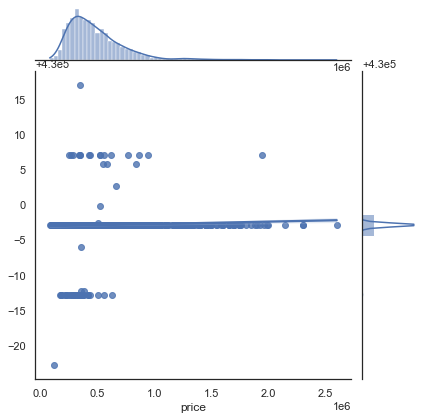

In [37]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_val, y=y_SVR1_predvl, kind="reg")

The above negative scores in SVR model is due to non-learning of the model in the training set which results in non-performance in validation set.

From plot we can say that SVM is performing worst for this case aa the prection is in -5 to 0 range only

### Decision Tree Regressor

In [38]:
# defining the model
DT1 = DecisionTreeRegressor()
DT1.fit(X_train, y_train)

# Making Predictions
y_DT1_predtr= DT1.predict(X_train)
y_DT1_predvl= DT1.predict(X_val)
y_DT1_predte= DT1.predict(X_test)


# Performance on train data
DT1_tr_R2score=r2_score(y_train,y_DT1_predtr)
DT1_tr_RMSE=np.sqrt(mean_squared_error(y_train, y_DT1_predtr))
DT1_tr_MSE=mean_squared_error(y_train, y_DT1_predtr)
DT1_tr_MAE=mean_absolute_error(y_train, y_DT1_predtr)
DT1_tr_MAPE=mape(y_train, y_DT1_predtr)
DT1_tr_AR2=adjR(y_train, y_DT1_predtr,p=len(X.columns))

# Performance on val data
DT1_vl_R2score=r2_score(y_val,y_DT1_predvl)
DT1_vl_RMSE=np.sqrt(mean_squared_error(y_val, y_DT1_predvl))
DT1_vl_MSE=mean_squared_error(y_val, y_DT1_predvl)
DT1_vl_MAE=mean_absolute_error(y_val, y_DT1_predvl)
DT1_vl_MAPE=mape(y_val, y_DT1_predvl)
DT1_vl_AR2=adjR(y_val, y_DT1_predvl,p=len(X.columns))

# Performance on test data
DT1_te_R2score=r2_score(y_test,y_DT1_predte)
DT1_te_RMSE=np.sqrt(mean_squared_error(y_test, y_DT1_predte))
DT1_te_MSE=mean_squared_error(y_test, y_DT1_predte)
DT1_te_MAE=mean_absolute_error(y_test, y_DT1_predte)
DT1_te_MAPE=mape(y_test, y_DT1_predte)
DT1_te_AR2=adjR(y_test, y_DT1_predte,p=len(X.columns))

DT1_df=pd.DataFrame({'Algorithm':['Simple DT'],
                       'train Score':DT1_tr_R2score,'RMSE_tr': DT1_tr_RMSE, 'MSE_tr': DT1_tr_MSE, 'MAE_tr': DT1_tr_MAE,
                         "Mape_tr":DT1_tr_MAPE, "Adjusted_r2_tr":DT1_tr_AR2,
                        'Val Score':DT1_vl_R2score,'RMSE_vl': DT1_vl_RMSE, 'MSE_vl': DT1_vl_MSE, 'MAE_vl': DT1_vl_MAE,
                         "Mape_val":DT1_vl_MAPE, "Adjusted_r2_val":DT1_vl_AR2,
                      'test Score':DT1_te_R2score,'RMSE_te': DT1_te_RMSE, 'MSE_te': DT1_te_MSE, 'MAE_te': DT1_te_MAE,
                        "Mape_te":DT1_te_MAPE, "Adjusted_r2_te":DT1_te_AR2})
model_comp = pd.concat([model_comp, DT1_df]).reset_index(drop=True)

model_comp

Algorithm  train Score        RMSE_tr        MSE_tr  \
0  Simple Linear Reg Model     0.621488  155468.518430  2.417046e+10   
1      SLinear-Reg (Lasso)     0.621413  155483.805423  2.417521e+10   
2      SLinear-Reg (Ridge)     0.621065  155555.327465  2.419746e+10   
3                      KNN     0.998847    8582.103202  7.365250e+07   
4      SVR with kernel rbf    -0.049504  258877.504279  6.701756e+10   
5                Simple DT     0.998847    8582.103202  7.365250e+07   

          MAE_tr   Mape_tr  Adjusted_r2_tr  Val Score        RMSE_vl  \
0  111377.884683  0.259166        1.074057   0.625768  158455.473771   
1  111391.345669  0.259206        1.074071   0.627354  158119.391005   
2  111469.771752  0.259326        1.074140   0.627816  158021.265005   
3     729.158534  0.002458        1.000226   0.378093  204267.650079   
4  178686.744132  0.398561        1.205338  -0.044851  264767.080780   
5     729.158534  0.002458        1.000226   0.374906  204790.269456   

         MSE_vl         MAE_vl  Mape_val  Adjusted_r2_val  test Score  \
0  2.510814e+10  113973.495055  0.267232         1.073219    0.625564   
1  2.500174e+10  113923.780764  0.267115         1.072909    0.626842   
2  2.497072e+10  113960.244193  0.267365         1.072819    0.627308   
3  4.172527e+10  140808.504496  0.318565         1.121678    0.405864   
4  7.010161e+10  180276.683589  0.402925         1.204427   -0.046833   
5  4.193905e+10  141216.915598  0.324432         1.122301    0.372455   

         RMSE_te        MSE_te         MAE_te   Mape_te  Adjusted_r2_te  
0  159636.958866  2.548396e+10  113351.641610  0.264585        1.073259  
1  159364.279177  2.539697e+10  113295.563188  0.264539        1.073009  
2  159264.650115  2.536523e+10  113309.123096  0.264680        1.072918  
3  201088.603207  4.043663e+10  140258.065201  0.319680        1.116244  
4  266921.303180  7.124698e+10  182787.035247  0.406553        1.204815  
5  206664.992198  4.271042e+10  141380.040346  0.319306        1.122780

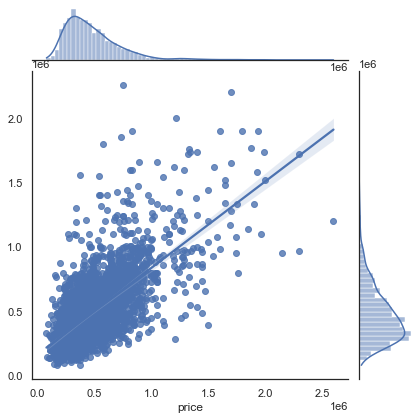

In [39]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_val, y=y_DT1_predvl, kind="reg")

Above performance of initial Decision tree model shows overfit in training set with 0.99 score and low performance in validation and test set. It is not the ideal solution

From graph we can say that decision tree is not performing well as the predictions is overfiting and prediction made are out of line too.

In [40]:
# defining the model
DT2 = DecisionTreeRegressor(max_depth=10,min_samples_leaf=5)
DT2.fit(X_train, y_train)

# Making Predictions
y_DT2_predtr= DT2.predict(X_train)
y_DT2_predvl= DT2.predict(X_val)
y_DT2_predte= DT2.predict(X_test)

# Performance on train data
DT2_tr_R2score=r2_score(y_train,y_DT2_predtr)
DT2_tr_RMSE=np.sqrt(mean_squared_error(y_train, y_DT2_predtr))
DT2_tr_MSE=mean_squared_error(y_train, y_DT2_predtr)
DT2_tr_MAE=mean_absolute_error(y_train, y_DT2_predtr)

# Performance on val data
DT2_vl_R2score=r2_score(y_val,y_DT2_predvl)
DT2_vl_RMSE=np.sqrt(mean_squared_error(y_val, y_DT2_predvl))
DT2_vl_MSE=mean_squared_error(y_val, y_DT2_predvl)
DT2_vl_MAE=mean_absolute_error(y_val, y_DT2_predvl)

# Performance on test data
DT2_te_R2score=r2_score(y_test,y_DT2_predte)
DT2_te_RMSE=np.sqrt(mean_squared_error(y_test, y_DT2_predte))
DT2_te_MSE=mean_squared_error(y_test, y_DT2_predte)
DT2_te_MAE=mean_absolute_error(y_test, y_DT2_predte)

DT2_df=pd.DataFrame({'Algorithm':['DT with some modified parameter'],
                     'train Score':DT2_tr_R2score,'RMSE_tr': DT2_tr_RMSE, 'MSE_tr': DT2_tr_MSE, 'MAE_tr': DT2_tr_MAE,
                     'Val Score':DT2_vl_R2score,'RMSE_vl': DT2_vl_RMSE, 'MSE_vl': DT2_vl_MSE, 'MAE_vl': DT2_vl_MAE,
                    'test Score':DT2_te_R2score,'RMSE_te': DT2_te_RMSE, 'MSE_te': DT2_te_MSE, 'MAE_te': DT2_te_MAE})
model_comp = pd.concat([model_comp, DT2_df]).reset_index(drop=True)

model_comp

Algorithm  train Score        RMSE_tr        MSE_tr  \
0          Simple Linear Reg Model     0.621488  155468.518430  2.417046e+10   
1              SLinear-Reg (Lasso)     0.621413  155483.805423  2.417521e+10   
2              SLinear-Reg (Ridge)     0.621065  155555.327465  2.419746e+10   
3                              KNN     0.998847    8582.103202  7.365250e+07   
4              SVR with kernel rbf    -0.049504  258877.504279  6.701756e+10   
5                        Simple DT     0.998847    8582.103202  7.365250e+07   
6  DT with some modified parameter     0.721555  133343.513951  1.778049e+10   

          MAE_tr   Mape_tr  Adjusted_r2_tr  Val Score        RMSE_vl  \
0  111377.884683  0.259166        1.074057   0.625768  158455.473771   
1  111391.345669  0.259206        1.074071   0.627354  158119.391005   
2  111469.771752  0.259326        1.074140   0.627816  158021.265005   
3     729.158534  0.002458        1.000226   0.378093  204267.650079   
4  178686.744132  0.398561        1.205338  -0.044851  264767.080780   
5     729.158534  0.002458        1.000226   0.374906  204790.269456   
6   97392.963931       NaN             NaN   0.589185  166019.792731   

         MSE_vl         MAE_vl  Mape_val  Adjusted_r2_val  test Score  \
0  2.510814e+10  113973.495055  0.267232         1.073219    0.625564   
1  2.500174e+10  113923.780764  0.267115         1.072909    0.626842   
2  2.497072e+10  113960.244193  0.267365         1.072819    0.627308   
3  4.172527e+10  140808.504496  0.318565         1.121678    0.405864   
4  7.010161e+10  180276.683589  0.402925         1.204427   -0.046833   
5  4.193905e+10  141216.915598  0.324432         1.122301    0.372455   
6  2.756257e+10  118242.674075       NaN              NaN    0.544191   

         RMSE_te        MSE_te         MAE_te   Mape_te  Adjusted_r2_te  
0  159636.958866  2.548396e+10  113351.641610  0.264585        1.073259  
1  159364.279177  2.539697e+10  113295.563188  0.264539        1.073009  
2  159264.650115  2.536523e+10  113309.123096  0.264680        1.072918  
3  201088.603207  4.043663e+10  140258.065201  0.319680        1.116244  
4  266921.303180  7.124698e+10  182787.035247  0.406553        1.204815  
5  206664.992198  4.271042e+10  141380.040346  0.319306        1.122780  
6  176131.129703  3.102217e+10  123172.527955       NaN             NaN

Above decision tree model with modified parameter has better performed on the training set and validation set compared to initial decision tree model.But overall decision tree has not performed well than linear regression models.

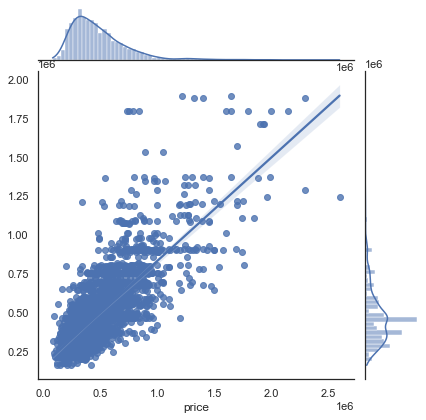

In [41]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_val, y=y_DT2_predvl, kind="reg")

In summary, KNN regressor model and decision tree models have not performed well in comparison with linear regression models

### Logistic Regression

In [42]:
# defining the model
LOG_R = LogisticRegression(random_state=0)
LOG_R.fit(X_train, y_train)

# Making Predictions
y_LOG_R_predtr= LOG_R.predict(X_train)
y_LOG_R_predvl= LOG_R.predict(X_val)
y_LOG_R_predte= LOG_R.predict(X_test)

# Performance on train data
LOG_R_tr_R2score=r2_score(y_train,y_LOG_R_predtr)
LOG_R_tr_RMSE=np.sqrt(mean_squared_error(y_train, y_LOG_R_predtr))
LOG_R_tr_MSE=mean_squared_error(y_train, y_LOG_R_predtr)
LOG_R_tr_MAE=mean_absolute_error(y_train, y_LOG_R_predtr)
LOG_R_tr_MAPE=mape(y_train, y_LOG_R_predtr)
LOG_R_tr_AR2=adjR(y_train, y_LOG_R_predtr,p=len(X.columns))

# Performance on val data
LOG_R_vl_R2score=r2_score(y_val,y_LOG_R_predvl)
LOG_R_vl_RMSE=np.sqrt(mean_squared_error(y_val, y_LOG_R_predvl))
LOG_R_vl_MSE=mean_squared_error(y_val, y_LOG_R_predvl)
LOG_R_vl_MAE=mean_absolute_error(y_val, y_LOG_R_predvl)
LOG_R_vl_MAPE=mape(y_val, y_LOG_R_predvl)
LOG_R_vl_AR2=adjR(y_val, y_LOG_R_predvl,p=len(X.columns))

# Performance on test data
LOG_R_te_R2score=r2_score(y_test,y_LOG_R_predte)
LOG_R_te_RMSE=np.sqrt(mean_squared_error(y_test, y_LOG_R_predte))
LOG_R_te_MSE=mean_squared_error(y_test, y_LOG_R_predte)
LOG_R_te_MAE=mean_absolute_error(y_test, y_LOG_R_predte)
LOG_R_te_MAPE=mape(y_test, y_LOG_R_predte)
LOG_R_te_AR2=adjR(y_test, y_LOG_R_predte,p=len(X.columns))

LOG_R_df=pd.DataFrame({'Algorithm':['Logistic Regression'],
                       'train Score':LOG_R_tr_R2score,'RMSE_tr': LOG_R_tr_RMSE, 'MSE_tr': LOG_R_tr_MSE, 'MAE_tr': LOG_R_tr_MAE,
                         "Mape_tr":LOG_R_tr_MAPE, "Adjusted_r2_tr":LOG_R_tr_AR2,
                        'Val Score':LOG_R_vl_R2score,'RMSE_vl': LOG_R_vl_RMSE, 'MSE_vl': LOG_R_vl_MSE, 'MAE_vl': LOG_R_vl_MAE,
                         "Mape_val":LOG_R_vl_MAPE, "Adjusted_r2_val":LOG_R_vl_AR2,
                      'test Score':LOG_R_te_R2score,'RMSE_te': LOG_R_te_RMSE, 'MSE_te': LOG_R_te_MSE, 'MAE_te': LOG_R_te_MAE,
                        "Mape_te":LOG_R_te_MAPE, "Adjusted_r2_te":LOG_R_te_AR2})
model_comp = pd.concat([model_comp, LOG_R_df]).reset_index(drop=True)

model_comp

Algorithm  train Score        RMSE_tr        MSE_tr  \
0          Simple Linear Reg Model     0.621488  155468.518430  2.417046e+10   
1              SLinear-Reg (Lasso)     0.621413  155483.805423  2.417521e+10   
2              SLinear-Reg (Ridge)     0.621065  155555.327465  2.419746e+10   
3                              KNN     0.998847    8582.103202  7.365250e+07   
4              SVR with kernel rbf    -0.049504  258877.504279  6.701756e+10   
5                        Simple DT     0.998847    8582.103202  7.365250e+07   
6  DT with some modified parameter     0.721555  133343.513951  1.778049e+10   
7              Logistic Regression     0.192253  227111.992505  5.157986e+10   

          MAE_tr   Mape_tr  Adjusted_r2_tr  Val Score        RMSE_vl  \
0  111377.884683  0.259166        1.074057   0.625768  158455.473771   
1  111391.345669  0.259206        1.074071   0.627354  158119.391005   
2  111469.771752  0.259326        1.074140   0.627816  158021.265005   
3     729.158534  0.002458        1.000226   0.378093  204267.650079   
4  178686.744132  0.398561        1.205338  -0.044851  264767.080780   
5     729.158534  0.002458        1.000226   0.374906  204790.269456   
6   97392.963931       NaN             NaN   0.589185  166019.792731   
7  155456.759623  0.319897        1.158037   0.210730  230117.446700   

         MSE_vl         MAE_vl  Mape_val  Adjusted_r2_val  test Score  \
0  2.510814e+10  113973.495055  0.267232         1.073219    0.625564   
1  2.500174e+10  113923.780764  0.267115         1.072909    0.626842   
2  2.497072e+10  113960.244193  0.267365         1.072819    0.627308   
3  4.172527e+10  140808.504496  0.318565         1.121678    0.405864   
4  7.010161e+10  180276.683589  0.402925         1.204427   -0.046833   
5  4.193905e+10  141216.915598  0.324432         1.122301    0.372455   
6  2.756257e+10  118242.674075       NaN              NaN    0.544191   
7  5.295404e+10  157832.806414  0.326861         1.154422    0.245098   

         RMSE_te        MSE_te         MAE_te   Mape_te  Adjusted_r2_te  
0  159636.958866  2.548396e+10  113351.641610  0.264585        1.073259  
1  159364.279177  2.539697e+10  113295.563188  0.264539        1.073009  
2  159264.650115  2.536523e+10  113309.123096  0.264680        1.072918  
3  201088.603207  4.043663e+10  140258.065201  0.319680        1.116244  
4  266921.303180  7.124698e+10  182787.035247  0.406553        1.204815  
5  206664.992198  4.271042e+10  141380.040346  0.319306        1.122780  
6  176131.129703  3.102217e+10  123172.527955       NaN             NaN  
7  226667.857926  5.137832e+10  155870.876886  0.321900        1.147698

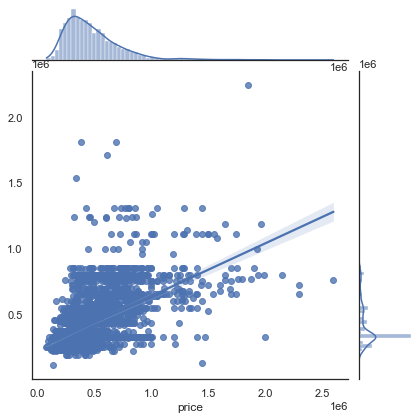

In [43]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_val, y=y_LOG_R_predvl, kind="reg")

The Logistic regression model with modified parameters has not performed well with just ~0.22 in training tesing and validation data sets.

From the graph we can interprest that the logistic regression is not performing well as the predictions is made between 0 to 0.5

### Ensemble techniques

#### Boosting and Bagging

In [44]:
# defining the model
GB1=GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.1, random_state=22)
GB1.fit(X_train, y_train)

# Making Predictions
y_GB1_predtr= GB1.predict(X_train)
y_GB1_predvl= GB1.predict(X_val)
y_GB1_predte= GB1.predict(X_test)

# Performance on train data
GB1_tr_R2score=r2_score(y_train,y_GB1_predtr)
GB1_tr_RMSE=np.sqrt(mean_squared_error(y_train, y_GB1_predtr))
GB1_tr_MSE=mean_squared_error(y_train, y_GB1_predtr)
GB1_tr_MAE=mean_absolute_error(y_train, y_GB1_predtr)
GB1_tr_MAPE=mape(y_train, y_GB1_predtr)
GB1_tr_AR2=adjR(y_train, y_GB1_predtr,p=len(X.columns))

# Performance on val data
GB1_vl_R2score=r2_score(y_val,y_GB1_predvl)
GB1_vl_RMSE=np.sqrt(mean_squared_error(y_val, y_GB1_predvl))
GB1_vl_MSE=mean_squared_error(y_val, y_GB1_predvl)
GB1_vl_MAE=mean_absolute_error(y_val, y_GB1_predvl)
GB1_vl_MAPE=mape(y_val, y_GB1_predvl)
GB1_vl_AR2=adjR(y_val, y_GB1_predvl,p=len(X.columns))

# Performance on test data
GB1_te_R2score=r2_score(y_test,y_GB1_predte)
GB1_te_RMSE=np.sqrt(mean_squared_error(y_test, y_GB1_predte))
GB1_te_MSE=mean_squared_error(y_test, y_GB1_predte)
GB1_te_MAE=mean_absolute_error(y_test, y_GB1_predte)
GB1_te_MAPE=mape(y_test, y_GB1_predte)
GB1_te_AR2=adjR(y_test, y_GB1_predte,p=len(X.columns))

GB1_df=pd.DataFrame({'Algorithm':['Gradient Boosting'],
                       'train Score':GB1_tr_R2score,'RMSE_tr': GB1_tr_RMSE, 'MSE_tr': GB1_tr_MSE, 'MAE_tr': GB1_tr_MAE,
                         "Mape_tr":GB1_tr_MAPE, "Adjusted_r2_tr":GB1_tr_AR2,
                        'Val Score':GB1_vl_R2score,'RMSE_vl': GB1_vl_RMSE, 'MSE_vl': GB1_vl_MSE, 'MAE_vl': GB1_vl_MAE,
                         "Mape_val":GB1_vl_MAPE, "Adjusted_r2_val":GB1_vl_AR2,
                      'test Score':GB1_te_R2score,'RMSE_te': GB1_te_RMSE, 'MSE_te': GB1_te_MSE, 'MAE_te': GB1_te_MAE,
                        "Mape_te":GB1_te_MAPE, "Adjusted_r2_te":GB1_te_AR2})
model_comp = pd.concat([model_comp, GB1_df]).reset_index(drop=True)

model_comp

Algorithm  train Score        RMSE_tr        MSE_tr  \
0          Simple Linear Reg Model     0.621488  155468.518430  2.417046e+10   
1              SLinear-Reg (Lasso)     0.621413  155483.805423  2.417521e+10   
2              SLinear-Reg (Ridge)     0.621065  155555.327465  2.419746e+10   
3                              KNN     0.998847    8582.103202  7.365250e+07   
4              SVR with kernel rbf    -0.049504  258877.504279  6.701756e+10   
5                        Simple DT     0.998847    8582.103202  7.365250e+07   
6  DT with some modified parameter     0.721555  133343.513951  1.778049e+10   
7              Logistic Regression     0.192253  227111.992505  5.157986e+10   
8                Gradient Boosting     0.734963  130093.493081  1.692432e+10   

          MAE_tr   Mape_tr  Adjusted_r2_tr  Val Score        RMSE_vl  \
0  111377.884683  0.259166        1.074057   0.625768  158455.473771   
1  111391.345669  0.259206        1.074071   0.627354  158119.391005   
2  111469.771752  0.259326        1.074140   0.627816  158021.265005   
3     729.158534  0.002458        1.000226   0.378093  204267.650079   
4  178686.744132  0.398561        1.205338  -0.044851  264767.080780   
5     729.158534  0.002458        1.000226   0.374906  204790.269456   
6   97392.963931       NaN             NaN   0.589185  166019.792731   
7  155456.759623  0.319897        1.158037   0.210730  230117.446700   
8   97559.949344  0.232923        1.051855   0.687915  144701.503485   

         MSE_vl         MAE_vl  Mape_val  Adjusted_r2_val  test Score  \
0  2.510814e+10  113973.495055  0.267232         1.073219    0.625564   
1  2.500174e+10  113923.780764  0.267115         1.072909    0.626842   
2  2.497072e+10  113960.244193  0.267365         1.072819    0.627308   
3  4.172527e+10  140808.504496  0.318565         1.121678    0.405864   
4  7.010161e+10  180276.683589  0.402925         1.204427   -0.046833   
5  4.193905e+10  141216.915598  0.324432         1.122301    0.372455   
6  2.756257e+10  118242.674075       NaN              NaN    0.544191   
7  5.295404e+10  157832.806414  0.326861         1.154422    0.245098   
8  2.093853e+10  105745.259032  0.252003         1.061060    0.668543   

         RMSE_te        MSE_te         MAE_te   Mape_te  Adjusted_r2_te  
0  159636.958866  2.548396e+10  113351.641610  0.264585        1.073259  
1  159364.279177  2.539697e+10  113295.563188  0.264539        1.073009  
2  159264.650115  2.536523e+10  113309.123096  0.264680        1.072918  
3  201088.603207  4.043663e+10  140258.065201  0.319680        1.116244  
4  266921.303180  7.124698e+10  182787.035247  0.406553        1.204815  
5  206664.992198  4.271042e+10  141380.040346  0.319306        1.122780  
6  176131.129703  3.102217e+10  123172.527955       NaN             NaN  
7  226667.857926  5.137832e+10  155870.876886  0.321900        1.147698  
8  150195.916138  2.255881e+10  107078.099910  0.251753        1.064850

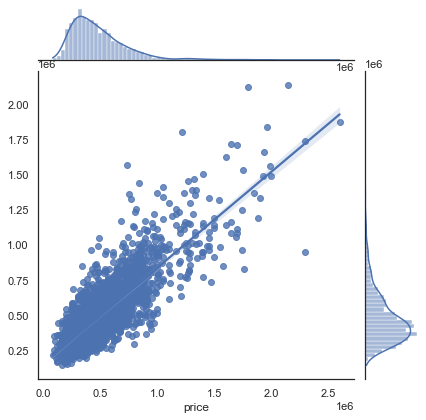

In [45]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_val, y=y_GB1_predvl, kind="reg")

Gradient boosting model has provided good scores in both training and validation sets
From the graph we can conclude that the model is fine then others

In [46]:
# defining the model
BGG1=BaggingRegressor(n_estimators=50, oob_score= True,random_state=14)
BGG1.fit(X_train, y_train)

# Making Predictions
y_BGG1_predtr= BGG1.predict(X_train)
y_BGG1_predvl= BGG1.predict(X_val)
y_BGG1_predte= BGG1.predict(X_test)

# Performance on train data
BGG1_tr_R2score=r2_score(y_train,y_BGG1_predtr)
BGG1_tr_RMSE=np.sqrt(mean_squared_error(y_train, y_BGG1_predtr))
BGG1_tr_MSE=mean_squared_error(y_train, y_BGG1_predtr)
BGG1_tr_MAE=mean_absolute_error(y_train, y_BGG1_predtr)
BGG1_tr_MAPE=mape(y_train, y_BGG1_predtr)
BGG1_tr_AR2=adjR(y_train, y_BGG1_predtr,p=len(X.columns))

# Performance on val data
BGG1_vl_R2score=r2_score(y_val,y_BGG1_predvl)
BGG1_vl_RMSE=np.sqrt(mean_squared_error(y_val, y_BGG1_predvl))
BGG1_vl_MSE=mean_squared_error(y_val, y_BGG1_predvl)
BGG1_vl_MAE=mean_absolute_error(y_val, y_BGG1_predvl)
BGG1_vl_MAPE=mape(y_val, y_BGG1_predvl)
BGG1_vl_AR2=adjR(y_val, y_BGG1_predvl,p=len(X.columns))

# Performance on test data
BGG1_te_R2score=r2_score(y_test,y_BGG1_predte)
BGG1_te_RMSE=np.sqrt(mean_squared_error(y_test, y_BGG1_predte))
BGG1_te_MSE=mean_squared_error(y_test, y_BGG1_predte)
BGG1_te_MAE=mean_absolute_error(y_test, y_BGG1_predte)
BGG1_te_MAPE=mape(y_test, y_BGG1_predte)
BGG1_te_AR2=adjR(y_test, y_BGG1_predte,p=len(X.columns))

BGG1_df=pd.DataFrame({'Algorithm':['Bagging Regressor'],
                       'train Score':BGG1_tr_R2score,'RMSE_tr': BGG1_tr_RMSE, 'MSE_tr': BGG1_tr_MSE, 'MAE_tr': BGG1_tr_MAE,
                         "Mape_tr":BGG1_tr_MAPE, "Adjusted_r2_tr":BGG1_tr_AR2,
                        'Val Score':BGG1_vl_R2score,'RMSE_vl': BGG1_vl_RMSE, 'MSE_vl': BGG1_vl_MSE, 'MAE_vl': BGG1_vl_MAE,
                         "Mape_val":BGG1_vl_MAPE, "Adjusted_r2_val":BGG1_vl_AR2,
                      'test Score':BGG1_te_R2score,'RMSE_te': BGG1_te_RMSE, 'MSE_te': BGG1_te_MSE, 'MAE_te': BGG1_te_MAE,
                        "Mape_te":BGG1_te_MAPE, "Adjusted_r2_te":BGG1_te_AR2})
model_comp = pd.concat([model_comp, BGG1_df]).reset_index(drop=True)

model_comp

Algorithm  train Score        RMSE_tr        MSE_tr  \
0          Simple Linear Reg Model     0.621488  155468.518430  2.417046e+10   
1              SLinear-Reg (Lasso)     0.621413  155483.805423  2.417521e+10   
2              SLinear-Reg (Ridge)     0.621065  155555.327465  2.419746e+10   
3                              KNN     0.998847    8582.103202  7.365250e+07   
4              SVR with kernel rbf    -0.049504  258877.504279  6.701756e+10   
5                        Simple DT     0.998847    8582.103202  7.365250e+07   
6  DT with some modified parameter     0.721555  133343.513951  1.778049e+10   
7              Logistic Regression     0.192253  227111.992505  5.157986e+10   
8                Gradient Boosting     0.734963  130093.493081  1.692432e+10   
9                Bagging Regressor     0.949652   56701.077157  3.215012e+09   

          MAE_tr   Mape_tr  Adjusted_r2_tr  Val Score        RMSE_vl  \
0  111377.884683  0.259166        1.074057   0.625768  158455.473771   
1  111391.345669  0.259206        1.074071   0.627354  158119.391005   
2  111469.771752  0.259326        1.074140   0.627816  158021.265005   
3     729.158534  0.002458        1.000226   0.378093  204267.650079   
4  178686.744132  0.398561        1.205338  -0.044851  264767.080780   
5     729.158534  0.002458        1.000226   0.374906  204790.269456   
6   97392.963931       NaN             NaN   0.589185  166019.792731   
7  155456.759623  0.319897        1.158037   0.210730  230117.446700   
8   97559.949344  0.232923        1.051855   0.687915  144701.503485   
9   39326.371014  0.091062        1.009851   0.678017  146978.370915   

         MSE_vl         MAE_vl  Mape_val  Adjusted_r2_val  test Score  \
0  2.510814e+10  113973.495055  0.267232         1.073219    0.625564   
1  2.500174e+10  113923.780764  0.267115         1.072909    0.626842   
2  2.497072e+10  113960.244193  0.267365         1.072819    0.627308   
3  4.172527e+10  140808.504496  0.318565         1.121678    0.405864   
4  7.010161e+10  180276.683589  0.402925         1.204427   -0.046833   
5  4.193905e+10  141216.915598  0.324432         1.122301    0.372455   
6  2.756257e+10  118242.674075       NaN              NaN    0.544191   
7  5.295404e+10  157832.806414  0.326861         1.154422    0.245098   
8  2.093853e+10  105745.259032  0.252003         1.061060    0.668543   
9  2.160264e+10  104104.756924  0.245479         1.062997    0.670340   

         RMSE_te        MSE_te         MAE_te   Mape_te  Adjusted_r2_te  
0  159636.958866  2.548396e+10  113351.641610  0.264585        1.073259  
1  159364.279177  2.539697e+10  113295.563188  0.264539        1.073009  
2  159264.650115  2.536523e+10  113309.123096  0.264680        1.072918  
3  201088.603207  4.043663e+10  140258.065201  0.319680        1.116244  
4  266921.303180  7.124698e+10  182787.035247  0.406553        1.204815  
5  206664.992198  4.271042e+10  141380.040346  0.319306        1.122780  
6  176131.129703  3.102217e+10  123172.527955       NaN             NaN  
7  226667.857926  5.137832e+10  155870.876886  0.321900        1.147698  
8  150195.916138  2.255881e+10  107078.099910  0.251753        1.064850  
9  149788.247564  2.243652e+10  103753.218430  0.241253        1.064499

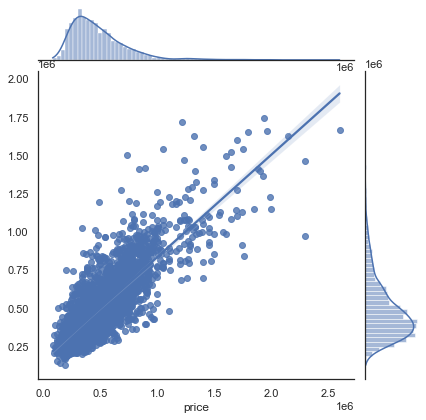

In [47]:
sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=y_val, y=y_BGG1_predvl, kind="reg")

Bagging model also performed well in training and validation sets.There seems to be overfitting in training set. We need to analyse further by hypertuning
From the graph this model looks fine having some values out of line and mostly data is at one point

## Random forest

In [48]:
# defining the model
RF1=RandomForestRegressor()
RF1.fit(X_train, y_train)

# Making Predictions
y_RF1_predtr= RF1.predict(X_train)
y_RF1_predvl= RF1.predict(X_val)
y_RF1_predte= RF1.predict(X_test)

# Performance on train data
RF1_tr_R2score=r2_score(y_train,y_RF1_predtr)
RF1_tr_RMSE=np.sqrt(mean_squared_error(y_train, y_RF1_predtr))
RF1_tr_MSE=mean_squared_error(y_train, y_RF1_predtr)
RF1_tr_MAE=mean_absolute_error(y_train, y_RF1_predtr)
RF1_tr_MAPE=mape(y_train, y_RF1_predtr)
RF1_tr_AR2=adjR(y_train, y_RF1_predtr,p=len(X.columns))

# Performance on val data
RF1_vl_R2score=r2_score(y_val,y_RF1_predvl)
RF1_vl_RMSE=np.sqrt(mean_squared_error(y_val, y_RF1_predvl))
RF1_vl_MSE=mean_squared_error(y_val, y_RF1_predvl)
RF1_vl_MAE=mean_absolute_error(y_val, y_RF1_predvl)
RF1_vl_MAPE=mape(y_val, y_RF1_predvl)
RF1_vl_AR2=adjR(y_val, y_RF1_predvl,p=len(X.columns))

# Performance on test data
RF1_te_R2score=r2_score(y_test,y_RF1_predte)
RF1_te_RMSE=np.sqrt(mean_squared_error(y_test, y_RF1_predte))
RF1_te_MSE=mean_squared_error(y_test, y_RF1_predte)
RF1_te_MAE=mean_absolute_error(y_test, y_RF1_predte)
RF1_te_MAPE=mape(y_test, y_RF1_predte)
RF1_te_AR2=adjR(y_test, y_RF1_predte,p=len(X.columns))

RF1_df=pd.DataFrame({'Algorithm':['Random Forest'],
                       'train Score':RF1_tr_R2score,'RMSE_tr': RF1_tr_RMSE, 'MSE_tr': RF1_tr_MSE, 'MAE_tr': RF1_tr_MAE,
                         "Mape_tr":RF1_tr_MAPE, "Adjusted_r2_tr":RF1_tr_AR2,
                        'Val Score':RF1_vl_R2score,'RMSE_vl': RF1_vl_RMSE, 'MSE_vl': RF1_vl_MSE, 'MAE_vl': RF1_vl_MAE,
                         "Mape_val":RF1_vl_MAPE, "Adjusted_r2_val":RF1_vl_AR2,
                      'test Score':RF1_te_R2score,'RMSE_te': RF1_te_RMSE, 'MSE_te': RF1_te_MSE, 'MAE_te': RF1_te_MAE,
                        "Mape_te":RF1_te_MAPE, "Adjusted_r2_te":RF1_te_AR2})
model_comp = pd.concat([model_comp, RF1_df]).reset_index(drop=True)

model_comp

Algorithm  train Score        RMSE_tr        MSE_tr  \
0           Simple Linear Reg Model     0.621488  155468.518430  2.417046e+10   
1               SLinear-Reg (Lasso)     0.621413  155483.805423  2.417521e+10   
2               SLinear-Reg (Ridge)     0.621065  155555.327465  2.419746e+10   
3                               KNN     0.998847    8582.103202  7.365250e+07   
4               SVR with kernel rbf    -0.049504  258877.504279  6.701756e+10   
5                         Simple DT     0.998847    8582.103202  7.365250e+07   
6   DT with some modified parameter     0.721555  133343.513951  1.778049e+10   
7               Logistic Regression     0.192253  227111.992505  5.157986e+10   
8                 Gradient Boosting     0.734963  130093.493081  1.692432e+10   
9                 Bagging Regressor     0.949652   56701.077157  3.215012e+09   
10                    Random Forest     0.952069   55323.534012  3.060693e+09   

           MAE_tr   Mape_tr  Adjusted_r2_tr  Val Score        RMSE_vl  \
0   111377.884683  0.259166        1.074057   0.625768  158455.473771   
1   111391.345669  0.259206        1.074071   0.627354  158119.391005   
2   111469.771752  0.259326        1.074140   0.627816  158021.265005   
3      729.158534  0.002458        1.000226   0.378093  204267.650079   
4   178686.744132  0.398561        1.205338  -0.044851  264767.080780   
5      729.158534  0.002458        1.000226   0.374906  204790.269456   
6    97392.963931       NaN             NaN   0.589185  166019.792731   
7   155456.759623  0.319897        1.158037   0.210730  230117.446700   
8    97559.949344  0.232923        1.051855   0.687915  144701.503485   
9    39326.371014  0.091062        1.009851   0.678017  146978.370915   
10   38678.718347  0.089901        1.009378   0.690448  144113.200098   

          MSE_vl         MAE_vl  Mape_val  Adjusted_r2_val  test Score  \
0   2.510814e+10  113973.495055  0.267232         1.073219    0.625564   
1   2.500174e+10  113923.780764  0.267115         1.072909    0.626842   
2   2.497072e+10  113960.244193  0.267365         1.072819    0.627308   
3   4.172527e+10  140808.504496  0.318565         1.121678    0.405864   
4   7.010161e+10  180276.683589  0.402925         1.204427   -0.046833   
5   4.193905e+10  141216.915598  0.324432         1.122301    0.372455   
6   2.756257e+10  118242.674075       NaN              NaN    0.544191   
7   5.295404e+10  157832.806414  0.326861         1.154422    0.245098   
8   2.093853e+10  105745.259032  0.252003         1.061060    0.668543   
9   2.160264e+10  104104.756924  0.245479         1.062997    0.670340   
10  2.076861e+10  102627.376313  0.243238         1.060565    0.674284   

          RMSE_te        MSE_te         MAE_te   Mape_te  Adjusted_r2_te  
0   159636.958866  2.548396e+10  113351.641610  0.264585        1.073259  
1   159364.279177  2.539697e+10  113295.563188  0.264539        1.073009  
2   159264.650115  2.536523e+10  113309.123096  0.264680        1.072918  
3   201088.603207  4.043663e+10  140258.065201  0.319680        1.116244  
4   266921.303180  7.124698e+10  182787.035247  0.406553        1.204815  
5   206664.992198  4.271042e+10  141380.040346  0.319306        1.122780  
6   176131.129703  3.102217e+10  123172.527955       NaN             NaN  
7   226667.857926  5.137832e+10  155870.876886  0.321900        1.147698  
8   150195.916138  2.255881e+10  107078.099910  0.251753        1.064850  
9   149788.247564  2.243652e+10  103753.218430  0.241253        1.064499  
10  148889.487648  2.216808e+10  103182.594657  0.239864        1.063727

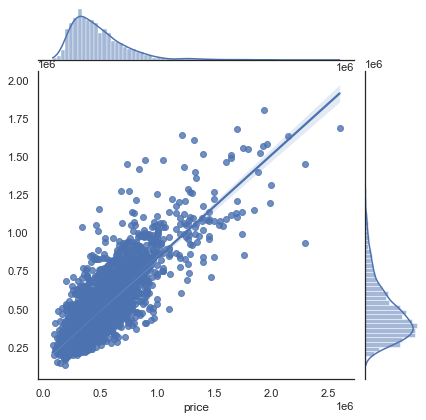

In [49]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_val, y=y_RF1_predvl, kind="reg")

Random forest model has performed fine not that much good. There is scope of further analysis on this model. But the overfiting is taken place which is not good.

Enseble models: in summary ensemble models have performed well on training and validation sets. These models will be selected for further analysis with hypertuning and feature selection

First 20 feature importance:	 Imp    95.013
dtype: float64
First 30 feature importance:	 Imp    97.936
dtype: float64


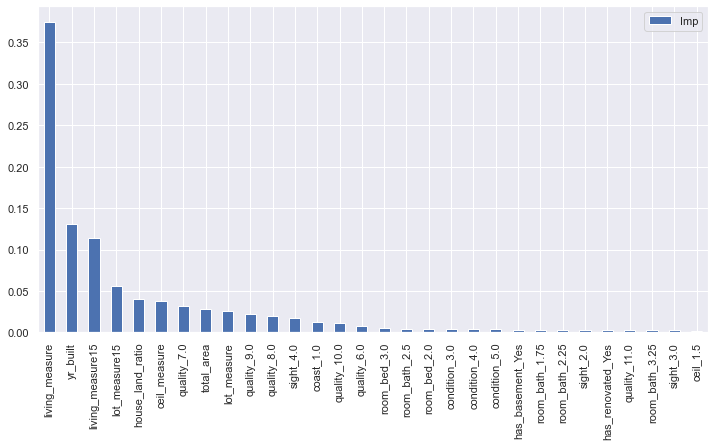

In [50]:
#feature importance
rf_imp_feature_1=pd.DataFrame(RF1.feature_importances_, columns = ["Imp"], index = X_val.columns)
rf_imp_feature_1.sort_values(by="Imp",ascending=False)
rf_imp_feature_1['Imp'] = rf_imp_feature_1['Imp'].map('{0:.5f}'.format)
rf_imp_feature_1=rf_imp_feature_1.sort_values(by="Imp",ascending=False)
rf_imp_feature_1.Imp=rf_imp_feature_1.Imp.astype("float")

rf_imp_feature_1[:30].plot.bar(figsize=(12,6))

#First 20 features have an importance of 90.5% and first 30 have importance of 95.15
print("First 20 feature importance:\t",(rf_imp_feature_1[:20].sum())*100)
print("First 30 feature importance:\t",(rf_imp_feature_1[:30].sum())*100)

By feature selection of random forest we can see that living_measure, yr_buils, living_measure15 have high impportance

### ADA Boost

In [51]:
# defining the model
ADAB=AdaBoostRegressor(DecisionTreeRegressor(random_state=8))
ADAB.fit(X_train, y_train)

# Making Predictions
y_ADAB_predtr= ADAB.predict(X_train)
y_ADAB_predvl= ADAB.predict(X_val)
y_ADAB_predte= ADAB.predict(X_test)

# Performance on train data
ADAB_tr_R2score=r2_score(y_train,y_ADAB_predtr)
ADAB_tr_RMSE=np.sqrt(mean_squared_error(y_train, y_ADAB_predtr))
ADAB_tr_MSE=mean_squared_error(y_train, y_ADAB_predtr)
ADAB_tr_MAE=mean_absolute_error(y_train, y_ADAB_predtr)
ADAB_tr_MAPE=mape(y_train, y_ADAB_predtr)
ADAB_tr_AR2=adjR(y_train, y_ADAB_predtr,p=len(X.columns))

# Performance on val data
ADAB_vl_R2score=r2_score(y_val,y_ADAB_predvl)
ADAB_vl_RMSE=np.sqrt(mean_squared_error(y_val, y_ADAB_predvl))
ADAB_vl_MSE=mean_squared_error(y_val, y_ADAB_predvl)
ADAB_vl_MAE=mean_absolute_error(y_val, y_ADAB_predvl)
ADAB_vl_MAPE=mape(y_val, y_ADAB_predvl)
ADAB_vl_AR2=adjR(y_val, y_ADAB_predvl,p=len(X.columns))

# Performance on test data
ADAB_te_R2score=r2_score(y_test,y_ADAB_predte)
ADAB_te_RMSE=np.sqrt(mean_squared_error(y_test, y_ADAB_predte))
ADAB_te_MSE=mean_squared_error(y_test, y_ADAB_predte)
ADAB_te_MAE=mean_absolute_error(y_test, y_ADAB_predte)
ADAB_te_MAPE=mape(y_test, y_ADAB_predte)
ADAB_te_AR2=adjR(y_test, y_ADAB_predte,p=len(X.columns))

ADAB_df=pd.DataFrame({'Algorithm':['ADA Boost'],
                       'train Score':ADAB_tr_R2score,'RMSE_tr': ADAB_tr_RMSE, 'MSE_tr': ADAB_tr_MSE, 'MAE_tr': ADAB_tr_MAE,
                         "Mape_tr":ADAB_tr_MAPE, "Adjusted_r2_tr":ADAB_tr_AR2,
                        'Val Score':ADAB_vl_R2score,'RMSE_vl': ADAB_vl_RMSE, 'MSE_vl': ADAB_vl_MSE, 'MAE_vl': ADAB_vl_MAE,
                         "Mape_val":ADAB_vl_MAPE, "Adjusted_r2_val":ADAB_vl_AR2,
                      'test Score':ADAB_te_R2score,'RMSE_te': ADAB_te_RMSE, 'MSE_te': ADAB_te_MSE, 'MAE_te': ADAB_te_MAE,
                        "Mape_te":ADAB_te_MAPE, "Adjusted_r2_te":ADAB_te_AR2})
model_comp = pd.concat([model_comp, ADAB_df]).reset_index(drop=True)

model_comp

Algorithm  train Score        RMSE_tr        MSE_tr  \
0           Simple Linear Reg Model     0.621488  155468.518430  2.417046e+10   
1               SLinear-Reg (Lasso)     0.621413  155483.805423  2.417521e+10   
2               SLinear-Reg (Ridge)     0.621065  155555.327465  2.419746e+10   
3                               KNN     0.998847    8582.103202  7.365250e+07   
4               SVR with kernel rbf    -0.049504  258877.504279  6.701756e+10   
5                         Simple DT     0.998847    8582.103202  7.365250e+07   
6   DT with some modified parameter     0.721555  133343.513951  1.778049e+10   
7               Logistic Regression     0.192253  227111.992505  5.157986e+10   
8                 Gradient Boosting     0.734963  130093.493081  1.692432e+10   
9                 Bagging Regressor     0.949652   56701.077157  3.215012e+09   
10                    Random Forest     0.952069   55323.534012  3.060693e+09   
11                        ADA Boost     0.993229   20794.104057  4.323948e+08   

           MAE_tr   Mape_tr  Adjusted_r2_tr  Val Score        RMSE_vl  \
0   111377.884683  0.259166        1.074057   0.625768  158455.473771   
1   111391.345669  0.259206        1.074071   0.627354  158119.391005   
2   111469.771752  0.259326        1.074140   0.627816  158021.265005   
3      729.158534  0.002458        1.000226   0.378093  204267.650079   
4   178686.744132  0.398561        1.205338  -0.044851  264767.080780   
5      729.158534  0.002458        1.000226   0.374906  204790.269456   
6    97392.963931       NaN             NaN   0.589185  166019.792731   
7   155456.759623  0.319897        1.158037   0.210730  230117.446700   
8    97559.949344  0.232923        1.051855   0.687915  144701.503485   
9    39326.371014  0.091062        1.009851   0.678017  146978.370915   
10   38678.718347  0.089901        1.009378   0.690448  144113.200098   
11    8470.112075  0.029409        1.001325   0.681653  146146.032022   

          MSE_vl         MAE_vl  Mape_val  Adjusted_r2_val  test Score  \
0   2.510814e+10  113973.495055  0.267232         1.073219    0.625564   
1   2.500174e+10  113923.780764  0.267115         1.072909    0.626842   
2   2.497072e+10  113960.244193  0.267365         1.072819    0.627308   
3   4.172527e+10  140808.504496  0.318565         1.121678    0.405864   
4   7.010161e+10  180276.683589  0.402925         1.204427   -0.046833   
5   4.193905e+10  141216.915598  0.324432         1.122301    0.372455   
6   2.756257e+10  118242.674075       NaN              NaN    0.544191   
7   5.295404e+10  157832.806414  0.326861         1.154422    0.245098   
8   2.093853e+10  105745.259032  0.252003         1.061060    0.668543   
9   2.160264e+10  104104.756924  0.245479         1.062997    0.670340   
10  2.076861e+10  102627.376313  0.243238         1.060565    0.674284   
11  2.135866e+10  102359.700639  0.240388         1.062285    0.655264   

          RMSE_te        MSE_te         MAE_te   Mape_te  Adjusted_r2_te  
0   159636.958866  2.548396e+10  113351.641610  0.264585        1.073259  
1   159364.279177  2.539697e+10  113295.563188  0.264539        1.073009  
2   159264.650115  2.536523e+10  113309.123096  0.264680        1.072918  
3   201088.603207  4.043663e+10  140258.065201  0.319680        1.116244  
4   266921.303180  7.124698e+10  182787.035247  0.406553        1.204815  
5   206664.992198  4.271042e+10  141380.040346  0.319306        1.122780  
6   176131.129703  3.102217e+10  123172.527955       NaN             NaN  
7   226667.857926  5.137832e+10  155870.876886  0.321900        1.147698  
8   150195.916138  2.255881e+10  107078.099910  0.251753        1.064850  
9   149788.247564  2.243652e+10  103753.218430  0.241253        1.064499  
10  148889.487648  2.216808e+10  103182.594657  0.239864        1.063727  
11  153175.020194  2.346259e+10  103953.255138  0.238536        1.067448

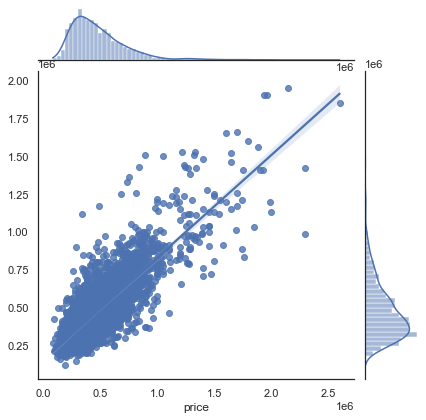

In [52]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_val, y=y_ADAB_predvl, kind="reg")

Ada Boost model has performed fine not that much good. There is scope of further analysis on this model. But the overfiting is taken place which is not good.
From the graph we can see that many values are out of line which is not good.

# XGBoost

In [53]:
# defining the model
XGB=XGBRegressor(n_estimators=150,max_depth=5,random_state=7)
XGB.fit(X_train, y_train)

# Making Predictions
y_XGB_predtr= XGB.predict(X_train)
y_XGB_predvl= XGB.predict(X_val)
y_XGB_predte= XGB.predict(X_test)

# Performance on train data
XGB_tr_R2score=r2_score(y_train,y_XGB_predtr)
XGB_tr_RMSE=np.sqrt(mean_squared_error(y_train, y_XGB_predtr))
XGB_tr_MSE=mean_squared_error(y_train, y_XGB_predtr)
XGB_tr_MAE=mean_absolute_error(y_train, y_XGB_predtr)
XGB_tr_MAPE=mape(y_train, y_XGB_predtr)
XGB_tr_AR2=adjR(y_train, y_XGB_predtr,p=len(X.columns))

# Performance on val data
XGB_vl_R2score=r2_score(y_val,y_XGB_predvl)
XGB_vl_RMSE=np.sqrt(mean_squared_error(y_val, y_XGB_predvl))
XGB_vl_MSE=mean_squared_error(y_val, y_XGB_predvl)
XGB_vl_MAE=mean_absolute_error(y_val, y_XGB_predvl)
XGB_vl_MAPE=mape(y_val, y_XGB_predvl)
XGB_vl_AR2=adjR(y_val, y_XGB_predvl,p=len(X.columns))

# Performance on test data
XGB_te_R2score=r2_score(y_test,y_XGB_predte)
XGB_te_RMSE=np.sqrt(mean_squared_error(y_test, y_XGB_predte))
XGB_te_MSE=mean_squared_error(y_test, y_XGB_predte)
XGB_te_MAE=mean_absolute_error(y_test, y_XGB_predte)
XGB_te_MAPE=mape(y_test, y_XGB_predte)
XGB_te_AR2=adjR(y_test, y_XGB_predte,p=len(X.columns))

XGB_df=pd.DataFrame({'Algorithm':['XGBoost'],
                       'train Score':XGB_tr_R2score,'RMSE_tr': XGB_tr_RMSE, 'MSE_tr': XGB_tr_MSE, 'MAE_tr': XGB_tr_MAE,
                         "Mape_tr":XGB_tr_MAPE, "Adjusted_r2_tr":XGB_tr_AR2,
                        'Val Score':XGB_vl_R2score,'RMSE_vl': XGB_vl_RMSE, 'MSE_vl': XGB_vl_MSE, 'MAE_vl': XGB_vl_MAE,
                         "Mape_val":XGB_vl_MAPE, "Adjusted_r2_val":XGB_vl_AR2,
                      'test Score':XGB_te_R2score,'RMSE_te': XGB_te_RMSE, 'MSE_te': XGB_te_MSE, 'MAE_te': XGB_te_MAE,
                        "Mape_te":XGB_te_MAPE, "Adjusted_r2_te":XGB_te_AR2})
model_comp = pd.concat([model_comp, XGB_df]).reset_index(drop=True)

model_comp

Algorithm  train Score        RMSE_tr        MSE_tr  \
0           Simple Linear Reg Model     0.621488  155468.518430  2.417046e+10   
1               SLinear-Reg (Lasso)     0.621413  155483.805423  2.417521e+10   
2               SLinear-Reg (Ridge)     0.621065  155555.327465  2.419746e+10   
3                               KNN     0.998847    8582.103202  7.365250e+07   
4               SVR with kernel rbf    -0.049504  258877.504279  6.701756e+10   
5                         Simple DT     0.998847    8582.103202  7.365250e+07   
6   DT with some modified parameter     0.721555  133343.513951  1.778049e+10   
7               Logistic Regression     0.192253  227111.992505  5.157986e+10   
8                 Gradient Boosting     0.734963  130093.493081  1.692432e+10   
9                 Bagging Regressor     0.949652   56701.077157  3.215012e+09   
10                    Random Forest     0.952069   55323.534012  3.060693e+09   
11                        ADA Boost     0.993229   20794.104057  4.323948e+08   
12                          XGBoost     0.882787   86514.902158  7.484828e+09   

           MAE_tr   Mape_tr  Adjusted_r2_tr  Val Score        RMSE_vl  \
0   111377.884683  0.259166        1.074057   0.625768  158455.473771   
1   111391.345669  0.259206        1.074071   0.627354  158119.391005   
2   111469.771752  0.259326        1.074140   0.627816  158021.265005   
3      729.158534  0.002458        1.000226   0.378093  204267.650079   
4   178686.744132  0.398561        1.205338  -0.044851  264767.080780   
5      729.158534  0.002458        1.000226   0.374906  204790.269456   
6    97392.963931       NaN             NaN   0.589185  166019.792731   
7   155456.759623  0.319897        1.158037   0.210730  230117.446700   
8    97559.949344  0.232923        1.051855   0.687915  144701.503485   
9    39326.371014  0.091062        1.009851   0.678017  146978.370915   
10   38678.718347  0.089901        1.009378   0.690448  144113.200098   
11    8470.112075  0.029409        1.001325   0.681653  146146.032022   
12   66165.278317  0.164866        1.022933   0.675453  147562.358838   

          MSE_vl         MAE_vl  Mape_val  Adjusted_r2_val  test Score  \
0   2.510814e+10  113973.495055  0.267232         1.073219    0.625564   
1   2.500174e+10  113923.780764  0.267115         1.072909    0.626842   
2   2.497072e+10  113960.244193  0.267365         1.072819    0.627308   
3   4.172527e+10  140808.504496  0.318565         1.121678    0.405864   
4   7.010161e+10  180276.683589  0.402925         1.204427   -0.046833   
5   4.193905e+10  141216.915598  0.324432         1.122301    0.372455   
6   2.756257e+10  118242.674075       NaN              NaN    0.544191   
7   5.295404e+10  157832.806414  0.326861         1.154422    0.245098   
8   2.093853e+10  105745.259032  0.252003         1.061060    0.668543   
9   2.160264e+10  104104.756924  0.245479         1.062997    0.670340   
10  2.076861e+10  102627.376313  0.243238         1.060565    0.674284   
11  2.135866e+10  102359.700639  0.240388         1.062285    0.655264   
12  2.177465e+10  106268.788725  0.247734         1.063498    0.666469   

          RMSE_te        MSE_te         MAE_te   Mape_te  Adjusted_r2_te  
0   159636.958866  2.548396e+10  113351.641610  0.264585        1.073259  
1   159364.279177  2.539697e+10  113295.563188  0.264539        1.073009  
2   159264.650115  2.536523e+10  113309.123096  0.264680        1.072918  
3   201088.603207  4.043663e+10  140258.065201  0.319680        1.116244  
4   266921.303180  7.124698e+10  182787.035247  0.406553        1.204815  
5   206664.992198  4.271042e+10  141380.040346  0.319306        1.122780  
6   176131.129703  3.102217e+10  123172.527955       NaN             NaN  
7   226667.857926  5.137832e+10  155870.876886  0.321900        1.147698  
8   150195.916138  2.255881e+10  107078.099910  0.251753        1.064850  
9   149788.247564  2.243652e+10  103753.218430  0.241253        1.064499  
10  14

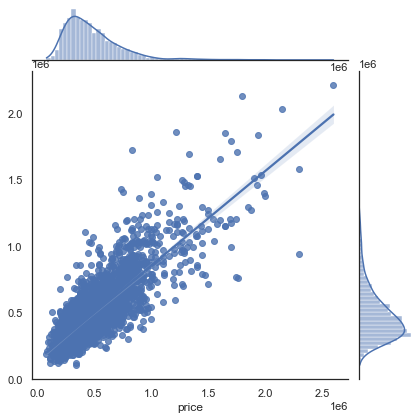

In [54]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_val, y=y_XGB_predvl, kind="reg")

XGBoost has performed fine not that much good. There is scope of further analysis on this model. But the overfiting is taken place which is not good.

#### Model performance Summary:

Ensemble methods are performing better than linear models. 
Of all the ensemble models, Gradient boosting regressor is giving better R2 score.
we identified top 30 features that are explaining the 95% variation in model(Random Forest). Will further hypertune the model to improve the model performance. Will further explore and evaluate the features while hyperturning the ensemble models

### Tuning GBR with Gridsearch CV

Since we have better performance in gradient boosting model, we will hypertune the model for improving the score

Following are the parameters we tune for the gradient boosting model.

In [55]:
param_gridF = {
    'max_features': ['auto','sqrt'],
    'learning_rate': [0.1,0.2],
    'max_depth': [5,8],
    'min_samples_leaf': [5,10],
    'min_samples_split': [40,50],
    'n_estimators':  [200,400,600],
}

GBR_test=GradientBoostingRegressor(random_state=22)

grid_searchF = GridSearchCV(estimator = GBR_test, param_grid = param_gridF, 
                          cv = 2, n_jobs = -1, verbose = 1)
grid_searchF.fit(X_train,y_train)
grid_searchF.best_params_,grid_searchF.best_score_

Fitting 2 folds for each of 96 candidates, totalling 192 fits


({'learning_rate': 0.1,
  'max_depth': 5,
  'max_features': 'sqrt',
  'min_samples_leaf': 10,
  'min_samples_split': 40,
  'n_estimators': 200},
 0.6603042018549291)

In [56]:
# defining the model
GB2=GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.1,max_depth= 5,max_features= 'sqrt',min_samples_leaf= 5,
  min_samples_split= 40, random_state=22)
GB2.fit(X_train, y_train)

# Making Predictions
y_GB2_predtr= GB2.predict(X_train)
y_GB2_predvl= GB2.predict(X_val)
y_GB2_predte= GB2.predict(X_test)

# Making Predictions
y_GB2_predtr= GB2.predict(X_train)
y_GB2_predvl= GB2.predict(X_val)
y_GB2_predte= GB2.predict(X_test)

# Performance on train data
GB2_tr_R2score=r2_score(y_train,y_GB2_predtr)
GB2_tr_RMSE=np.sqrt(mean_squared_error(y_train, y_GB2_predtr))
GB2_tr_MSE=mean_squared_error(y_train, y_GB2_predtr)
GB2_tr_MAE=mean_absolute_error(y_train, y_GB2_predtr)
GB2_tr_MAPE=mape(y_train, y_GB2_predtr)
GB2_tr_AR2=adjR(y_train, y_GB2_predtr,p=len(X.columns))

# Performance on val data
GB2_vl_R2score=r2_score(y_val,y_GB2_predvl)
GB2_vl_RMSE=np.sqrt(mean_squared_error(y_val, y_GB2_predvl))
GB2_vl_MSE=mean_squared_error(y_val, y_GB2_predvl)
GB2_vl_MAE=mean_absolute_error(y_val, y_GB2_predvl)
GB2_vl_MAPE=mape(y_val, y_GB2_predvl)
GB2_vl_AR2=adjR(y_val, y_GB2_predvl,p=len(X.columns))

# Performance on test data
GB2_te_R2score=r2_score(y_test,y_GB2_predte)
GB2_te_RMSE=np.sqrt(mean_squared_error(y_test, y_GB2_predte))
GB2_te_MSE=mean_squared_error(y_test, y_GB2_predte)
GB2_te_MAE=mean_absolute_error(y_test, y_GB2_predte)
GB2_te_MAPE=mape(y_test, y_GB2_predte)
GB2_te_AR2=adjR(y_test, y_GB2_predte,p=len(X.columns))

GB2_df=pd.DataFrame({'Algorithm':['Gradient Boosting BY Grid Search'],
                       'train Score':GB2_tr_R2score,'RMSE_tr': GB2_tr_RMSE, 'MSE_tr': GB2_tr_MSE, 'MAE_tr': GB2_tr_MAE,
                         "Mape_tr":GB2_tr_MAPE, "Adjusted_r2_tr":GB2_tr_AR2,
                        'Val Score':GB2_vl_R2score,'RMSE_vl': GB2_vl_RMSE, 'MSE_vl': GB2_vl_MSE, 'MAE_vl': GB2_vl_MAE,
                         "Mape_val":GB2_vl_MAPE, "Adjusted_r2_val":GB2_vl_AR2,
                      'test Score':GB2_te_R2score,'RMSE_te': GB2_te_RMSE, 'MSE_te': GB2_te_MSE, 'MAE_te': GB2_te_MAE,
                        "Mape_te":GB2_te_MAPE, "Adjusted_r2_te":GB2_te_AR2})
model_comp = pd.concat([model_comp, GB2_df]).reset_index(drop=True)

model_comp

Algorithm  train Score        RMSE_tr  \
0            Simple Linear Reg Model     0.621488  155468.518430   
1                SLinear-Reg (Lasso)     0.621413  155483.805423   
2                SLinear-Reg (Ridge)     0.621065  155555.327465   
3                                KNN     0.998847    8582.103202   
4                SVR with kernel rbf    -0.049504  258877.504279   
5                          Simple DT     0.998847    8582.103202   
6    DT with some modified parameter     0.721555  133343.513951   
7                Logistic Regression     0.192253  227111.992505   
8                  Gradient Boosting     0.734963  130093.493081   
9                  Bagging Regressor     0.949652   56701.077157   
10                     Random Forest     0.952069   55323.534012   
11                         ADA Boost     0.993229   20794.104057   
12                           XGBoost     0.882787   86514.902158   
13  Gradient Boosting BY Grid Search     0.766412  122131.550769   

          MSE_tr         MAE_tr   Mape_tr  Adjusted_r2_tr  Val Score  \
0   2.417046e+10  111377.884683  0.259166        1.074057   0.625768   
1   2.417521e+10  111391.345669  0.259206        1.074071   0.627354   
2   2.419746e+10  111469.771752  0.259326        1.074140   0.627816   
3   7.365250e+07     729.158534  0.002458        1.000226   0.378093   
4   6.701756e+10  178686.744132  0.398561        1.205338  -0.044851   
5   7.365250e+07     729.158534  0.002458        1.000226   0.374906   
6   1.778049e+10   97392.963931       NaN             NaN   0.589185   
7   5.157986e+10  155456.759623  0.319897        1.158037   0.210730   
8   1.692432e+10   97559.949344  0.232923        1.051855   0.687915   
9   3.215012e+09   39326.371014  0.091062        1.009851   0.678017   
10  3.060693e+09   38678.718347  0.089901        1.009378   0.690448   
11  4.323948e+08    8470.112075  0.029409        1.001325   0.681653   
12  7.484828e+09   66165.278317  0.164866        1.022933   0.675453   
13  1.491612e+10   91373.083501  0.218036        1.045702   0.692587   

          RMSE_vl        MSE_vl         MAE_vl  Mape_val  Adjusted_r2_val  \
0   158455.473771  2.510814e+10  113973.495055  0.267232         1.073219   
1   158119.391005  2.500174e+10  113923.780764  0.267115         1.072909   
2   158021.265005  2.497072e+10  113960.244193  0.267365         1.072819   
3   204267.650079  4.172527e+10  140808.504496  0.318565         1.121678   
4   264767.080780  7.010161e+10  180276.683589  0.402925         1.204427   
5   204790.269456  4.193905e+10  141216.915598  0.324432         1.122301   
6   166019.792731  2.756257e+10  118242.674075       NaN              NaN   
7   230117.446700  5.295404e+10  157832.806414  0.326861         1.154422   
8   144701.503485  2.093853e+10  105745.259032  0.252003         1.061060   
9   146978.370915  2.160264e+10  104104.756924  0.245479         1.062997   
10  144113.200098  2.076861e+10  102627.376313  0.243238         1.060565   
11  146146.032022  2.135866e+10  102359.700639  0.240388         1.062285   
12  147562.358838  2.177465e+10  106268.788725  0.247734         1.063498   
13  143614.416511  2.062510e+10  105049.977832  0.248053         1.060146   

    test Score        RMSE_te        MSE_te         MAE_te   Mape_te  \
0     0.625564  159636.958866  2.548396e+10  113351.641610  0.264585   
1     0.626842  159364.279177  2.539697e+10  113295.563188  0.264539   
2     0.627308  159264.650115  2.536523e+10  113309.123096  0.264680   
3     0.405864  201088.603207  4.043663e+10  140258.065201  0.319680   
4    -0.046833  266921.303180  7.124698e+10  182787.035247  0.406553   
5     0.372455  206664.992198  4.271042e+10  141380.040346  0.319306   
6     0.544191  176131.129703  3.102217e+10  123172.527955       NaN   
7     0.245098  226667.857926  5.137832e+10  155870.876886  0.321900   
8     0.668543  150195.916138  2.255881e+10  107078.099910  0.251753   
9     0.670340  149788.247564  2.243652e+10  1037

<li>The above iteration gives best result</li>
<li><b>Final parameters that are giving best result on training set are: </li>

'learning_rate': 0.1,
'max_depth': 5,
'max_features': 'sqrt',
'min_samples_leaf': 5,
'min_samples_split': 40,
'n_estimators': 200,
</b>

# Tuning GBR using graph

In [57]:
param_gridF = {
    'max_features': ['auto','sqrt'],
    'learning_rate': [0.1,0.2],
    'max_depth': [5,8],
    'min_samples_leaf': [5,10],
    'min_samples_split': [40,50],
    'n_estimators':  [200,400,600],
}

GBR_test=GradientBoostingRegressor(random_state=22)

grid_searchF = GridSearchCV(estimator = GBR_test, param_grid = param_gridF, 
                          cv = 2, n_jobs = -1, verbose = 1)
grid_searchF.fit(X_train,y_train)
grid_searchF.best_score_,grid_searchF.best_params_

Fitting 2 folds for each of 96 candidates, totalling 192 fits


(0.6603042018549291,
 {'learning_rate': 0.1,
  'max_depth': 5,
  'max_features': 'sqrt',
  'min_samples_leaf': 10,
  'min_samples_split': 40,
  'n_estimators': 200})

In [58]:
# defining the model
GB3=GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.3,max_depth= 5,max_features= 'sqrt',min_samples_leaf= 5,
  min_samples_split= 40, random_state=33)
GB3.fit(X_train, y_train)

# Making Predictions
y_GB3_predtr= GB3.predict(X_train)
y_GB3_predvl= GB3.predict(X_val)
y_GB3_predte= GB3.predict(X_test)
# Making Predictions
y_GB3_predtr= GB3.predict(X_train)
y_GB3_predvl= GB3.predict(X_val)
y_GB3_predte= GB3.predict(X_test)

# Performance on train data
GB3_tr_R2score=r2_score(y_train,y_GB3_predtr)
GB3_tr_RMSE=np.sqrt(mean_squared_error(y_train, y_GB3_predtr))
GB3_tr_MSE=mean_squared_error(y_train, y_GB3_predtr)
GB3_tr_MAE=mean_absolute_error(y_train, y_GB3_predtr)
GB3_tr_MAPE=mape(y_train, y_GB3_predtr)
GB3_tr_AR2=adjR(y_train, y_GB3_predtr,p=len(X.columns))

# Performance on val data
GB3_vl_R2score=r2_score(y_val,y_GB3_predvl)
GB3_vl_RMSE=np.sqrt(mean_squared_error(y_val, y_GB3_predvl))
GB3_vl_MSE=mean_squared_error(y_val, y_GB3_predvl)
GB3_vl_MAE=mean_absolute_error(y_val, y_GB3_predvl)
GB3_vl_MAPE=mape(y_val, y_GB3_predvl)
GB3_vl_AR2=adjR(y_val, y_GB3_predvl,p=len(X.columns))

# Performance on test data
GB3_te_R2score=r2_score(y_test,y_GB3_predte)
GB3_te_RMSE=np.sqrt(mean_squared_error(y_test, y_GB3_predte))
GB3_te_MSE=mean_squared_error(y_test, y_GB3_predte)
GB3_te_MAE=mean_absolute_error(y_test, y_GB3_predte)
GB3_te_MAPE=mape(y_test, y_GB3_predte)
GB3_te_AR2=adjR(y_test, y_GB3_predte,p=len(X.columns))

GB3_df=pd.DataFrame({'Algorithm':['Gradient Boosting Tuning using graph'],
                       'train Score':GB3_tr_R2score,'RMSE_tr': GB3_tr_RMSE, 'MSE_tr': GB3_tr_MSE, 'MAE_tr': GB3_tr_MAE,
                         "Mape_tr":GB3_tr_MAPE, "Adjusted_r2_tr":GB3_tr_AR2,
                        'Val Score':GB3_vl_R2score,'RMSE_vl': GB3_vl_RMSE, 'MSE_vl': GB3_vl_MSE, 'MAE_vl': GB3_vl_MAE,
                         "Mape_val":GB3_vl_MAPE, "Adjusted_r2_val":GB3_vl_AR2,
                      'test Score':GB3_te_R2score,'RMSE_te': GB3_te_RMSE, 'MSE_te': GB3_te_MSE, 'MAE_te': GB3_te_MAE,
                        "Mape_te":GB3_te_MAPE, "Adjusted_r2_te":GB3_te_AR2})
model_comp = pd.concat([model_comp, GB3_df]).reset_index(drop=True)

model_comp

Algorithm  train Score        RMSE_tr  \
0                Simple Linear Reg Model     0.621488  155468.518430   
1                    SLinear-Reg (Lasso)     0.621413  155483.805423   
2                    SLinear-Reg (Ridge)     0.621065  155555.327465   
3                                    KNN     0.998847    8582.103202   
4                    SVR with kernel rbf    -0.049504  258877.504279   
5                              Simple DT     0.998847    8582.103202   
6        DT with some modified parameter     0.721555  133343.513951   
7                    Logistic Regression     0.192253  227111.992505   
8                      Gradient Boosting     0.734963  130093.493081   
9                      Bagging Regressor     0.949652   56701.077157   
10                         Random Forest     0.952069   55323.534012   
11                             ADA Boost     0.993229   20794.104057   
12                               XGBoost     0.882787   86514.902158   
13      Gradient Boosting BY Grid Search     0.766412  122131.550769   
14  Gradient Boosting Tuning using graph     0.828555  104632.113108   

          MSE_tr         MAE_tr   Mape_tr  Adjusted_r2_tr  Val Score  \
0   2.417046e+10  111377.884683  0.259166        1.074057   0.625768   
1   2.417521e+10  111391.345669  0.259206        1.074071   0.627354   
2   2.419746e+10  111469.771752  0.259326        1.074140   0.627816   
3   7.365250e+07     729.158534  0.002458        1.000226   0.378093   
4   6.701756e+10  178686.744132  0.398561        1.205338  -0.044851   
5   7.365250e+07     729.158534  0.002458        1.000226   0.374906   
6   1.778049e+10   97392.963931       NaN             NaN   0.589185   
7   5.157986e+10  155456.759623  0.319897        1.158037   0.210730   
8   1.692432e+10   97559.949344  0.232923        1.051855   0.687915   
9   3.215012e+09   39326.371014  0.091062        1.009851   0.678017   
10  3.060693e+09   38678.718347  0.089901        1.009378   0.690448   
11  4.323948e+08    8470.112075  0.029409        1.001325   0.681653   
12  7.484828e+09   66165.278317  0.164866        1.022933   0.675453   
13  1.491612e+10   91373.083501  0.218036        1.045702   0.692587   
14  1.094788e+10   79902.816021  0.194491        1.033544   0.671442   

          RMSE_vl        MSE_vl         MAE_vl  Mape_val  Adjusted_r2_val  \
0   158455.473771  2.510814e+10  113973.495055  0.267232         1.073219   
1   158119.391005  2.500174e+10  113923.780764  0.267115         1.072909   
2   158021.265005  2.497072e+10  113960.244193  0.267365         1.072819   
3   204267.650079  4.172527e+10  140808.504496  0.318565         1.121678   
4   264767.080780  7.010161e+10  180276.683589  0.402925         1.204427   
5   204790.269456  4.193905e+10  141216.915598  0.324432         1.122301   
6   166019.792731  2.756257e+10  118242.674075       NaN              NaN   
7   230117.446700  5.295404e+10  157832.806414  0.326861         1.154422   
8   144701.503485  2.093853e+10  105745.259032  0.252003         1.061060   
9   146978.370915  2.160264e+10  104104.756924  0.245479         1.062997   
10  144113.200098  2.076861e+10  102627.376313  0.243238         1.060565   
11  146146.032022  2.135866e+10  102359.700639  0.240388         1.062285   
12  147562.358838  2.177465e+10  106268.788725  0.247734         1.063498   
13  143614.416511  2.062510e+10  105049.977832  0.248053         1.060146   
14  148471.365638  2.204375e+10  106647.002065  0.249120         1.064283   

    test Score        RMSE_te        MSE_te         MAE_te   Mape_te  \
0     0.625564  159636.958866  2.548396e+10  113351.641610  0.264585   
1     0.626842  159364.279177  2.539697e+10  113295.563188  0.264539   
2     0.627308  159264.650115  2.536523e+10  113309.123096  0.264680   
3     0.405864  201088.603207  4.043663e+10  140258.065201  0.319680   
4    -0.046833  266921.303180  7.124698e+10  182787.035247  0.406553   
5     0.372455  206664.992198  4.271042e+10  141380.040346  

# Tuning GBR using RandomSearchCV

In [59]:
param_gridF = {
    'max_features': ['auto','sqrt'],
    'learning_rate': [0.1,0.2],
    'max_depth': [5,8],
    'min_samples_leaf': [5,10],
    'min_samples_split': [40,50],
    'n_estimators':  [200,400,600],
}

GBR_test=GradientBoostingRegressor(random_state=22)

grid_searchF = RandomizedSearchCV(estimator = GBR_test, param_distributions = param_gridF, 
                          cv = 2, n_jobs = -1, verbose = 1)
grid_searchF.fit(X_train,y_train)
grid_searchF.best_score_,grid_searchF.best_params_

Fitting 2 folds for each of 10 candidates, totalling 20 fits


(0.6553061874881903,
 {'n_estimators': 400,
  'min_samples_split': 50,
  'min_samples_leaf': 5,
  'max_features': 'sqrt',
  'max_depth': 8,
  'learning_rate': 0.1})

In [60]:
# defining the model
GB4=GradientBoostingRegressor(n_estimators = 400, learning_rate = 0.1,max_depth= 5,max_features= 'sqrt',min_samples_leaf= 10,
  min_samples_split= 40, random_state=44)
GB4.fit(X_train, y_train)

# Making Predictions
y_GB4_predtr= GB4.predict(X_train)
y_GB4_predvl= GB4.predict(X_val)
y_GB4_predte= GB4.predict(X_test)

# Performance on train data
GB4_tr_R2score=r2_score(y_train,y_GB4_predtr)
GB4_tr_RMSE=np.sqrt(mean_squared_error(y_train, y_GB4_predtr))
GB4_tr_MSE=mean_squared_error(y_train, y_GB4_predtr)
GB4_tr_MAE=mean_absolute_error(y_train, y_GB4_predtr)
GB4_tr_MAPE=mape(y_train, y_GB4_predtr)
GB4_tr_AR2=adjR(y_train, y_GB4_predtr,p=len(X.columns))

# Performance on val data
GB4_vl_R2score=r2_score(y_val,y_GB4_predvl)
GB4_vl_RMSE=np.sqrt(mean_squared_error(y_val, y_GB4_predvl))
GB4_vl_MSE=mean_squared_error(y_val, y_GB4_predvl)
GB4_vl_MAE=mean_absolute_error(y_val, y_GB4_predvl)
GB4_vl_MAPE=mape(y_val, y_GB4_predvl)
GB4_vl_AR2=adjR(y_val, y_GB4_predvl,p=len(X.columns))

# Performance on test data
GB4_te_R2score=r2_score(y_test,y_GB4_predte)
GB4_te_RMSE=np.sqrt(mean_squared_error(y_test, y_GB4_predte))
GB4_te_MSE=mean_squared_error(y_test, y_GB4_predte)
GB4_te_MAE=mean_absolute_error(y_test, y_GB4_predte)
GB4_te_MAPE=mape(y_test, y_GB4_predte)
GB4_te_AR2=adjR(y_test, y_GB4_predte,p=len(X.columns))
GB4_df=pd.DataFrame({'Algorithm':['Gradient Boosting BY Random Search'],
                       'train Score':GB4_tr_R2score,'RMSE_tr': GB4_tr_RMSE, 'MSE_tr': GB4_tr_MSE, 'MAE_tr': GB4_tr_MAE,
                         "Mape_tr":GB4_tr_MAPE, "Adjusted_r2_tr":GB4_tr_AR2,
                        'Val Score':GB4_vl_R2score,'RMSE_vl': GB4_vl_RMSE, 'MSE_vl': GB4_vl_MSE, 'MAE_vl': GB4_vl_MAE,
                         "Mape_val":GB4_vl_MAPE, "Adjusted_r2_val":GB4_vl_AR2,
                      'test Score':GB4_te_R2score,'RMSE_te': GB4_te_RMSE, 'MSE_te': GB4_te_MSE, 'MAE_te': GB4_te_MAE,
                        "Mape_te":GB4_te_MAPE, "Adjusted_r2_te":GB4_te_AR2})
model_comp = pd.concat([model_comp, GB4_df]).reset_index(drop=True)

model_comp

Algorithm  train Score        RMSE_tr  \
0                Simple Linear Reg Model     0.621488  155468.518430   
1                    SLinear-Reg (Lasso)     0.621413  155483.805423   
2                    SLinear-Reg (Ridge)     0.621065  155555.327465   
3                                    KNN     0.998847    8582.103202   
4                    SVR with kernel rbf    -0.049504  258877.504279   
5                              Simple DT     0.998847    8582.103202   
6        DT with some modified parameter     0.721555  133343.513951   
7                    Logistic Regression     0.192253  227111.992505   
8                      Gradient Boosting     0.734963  130093.493081   
9                      Bagging Regressor     0.949652   56701.077157   
10                         Random Forest     0.952069   55323.534012   
11                             ADA Boost     0.993229   20794.104057   
12                               XGBoost     0.882787   86514.902158   
13      Gradient Boosting BY Grid Search     0.766412  122131.550769   
14  Gradient Boosting Tuning using graph     0.828555  104632.113108   
15    Gradient Boosting BY Random Search     0.803816  111926.838485   

          MSE_tr         MAE_tr   Mape_tr  Adjusted_r2_tr  Val Score  \
0   2.417046e+10  111377.884683  0.259166        1.074057   0.625768   
1   2.417521e+10  111391.345669  0.259206        1.074071   0.627354   
2   2.419746e+10  111469.771752  0.259326        1.074140   0.627816   
3   7.365250e+07     729.158534  0.002458        1.000226   0.378093   
4   6.701756e+10  178686.744132  0.398561        1.205338  -0.044851   
5   7.365250e+07     729.158534  0.002458        1.000226   0.374906   
6   1.778049e+10   97392.963931       NaN             NaN   0.589185   
7   5.157986e+10  155456.759623  0.319897        1.158037   0.210730   
8   1.692432e+10   97559.949344  0.232923        1.051855   0.687915   
9   3.215012e+09   39326.371014  0.091062        1.009851   0.678017   
10  3.060693e+09   38678.718347  0.089901        1.009378   0.690448   
11  4.323948e+08    8470.112075  0.029409        1.001325   0.681653   
12  7.484828e+09   66165.278317  0.164866        1.022933   0.675453   
13  1.491612e+10   91373.083501  0.218036        1.045702   0.692587   
14  1.094788e+10   79902.816021  0.194491        1.033544   0.671442   
15  1.252762e+10   84681.119572  0.203216        1.038384   0.696759   

          RMSE_vl        MSE_vl         MAE_vl  Mape_val  Adjusted_r2_val  \
0   158455.473771  2.510814e+10  113973.495055  0.267232         1.073219   
1   158119.391005  2.500174e+10  113923.780764  0.267115         1.072909   
2   158021.265005  2.497072e+10  113960.244193  0.267365         1.072819   
3   204267.650079  4.172527e+10  140808.504496  0.318565         1.121678   
4   264767.080780  7.010161e+10  180276.683589  0.402925         1.204427   
5   204790.269456  4.193905e+10  141216.915598  0.324432         1.122301   
6   166019.792731  2.756257e+10  118242.674075       NaN              NaN   
7   230117.446700  5.295404e+10  157832.806414  0.326861         1.154422   
8   144701.503485  2.093853e+10  105745.259032  0.252003         1.061060   
9   146978.370915  2.160264e+10  104104.756924  0.245479         1.062997   
10  144113.200098  2.076861e+10  102627.376313  0.243238         1.060565   
11  146146.032022  2.135866e+10  102359.700639  0.240388         1.062285   
12  147562.358838  2.177465e+10  106268.788725  0.247734         1.063498   
13  143614.416511  2.062510e+10  105049.977832  0.248053         1.060146   
14  148471.365638  2.204375e+10  106647.002065  0.249120         1.064283   
15  142636.491012  2.034517e+10  103611.891431  0.244449         1.059330   

    test Score        RMSE_te        MSE_te         MAE_te   Mape_te  \
0     0.625564  159636.958866  2.548396e+10  113351.641610  0.264585   
1     0.626842  159364.279177  2.539697e+10  113295.563188  0.264539   
2     0.627308  159264.650115  2.536523e+10  113309.123

<b> We can conclude from above that gridsearch CV is giving better results compared to that of tuning done by graphical method of individual parameters or RandomSearchCV</b>

# Final summary:

<li>The ensemble models have performed well compared to that of linear,KNN,SVR models, logistic</li>
<li>The best performance is given by Gradient boosting model </li>
    
<li>The top key features that drive the price of the property  are: 'furnished_1', 'yr_built', 'living_measure','quality_8', 'HouseLandRatio', 'lot_measure15', 'quality_9', 'ceil_measure', 'total_area'. </li>
 
<li>The above data is also reinforced by the analysis done during bivariate analysis.</li>

In [61]:
model_comp.to_csv("model_comparison.csv")

In [69]:
model_comp.drop([6]).reset_index(drop=True).to_csv("model_comparison.csv")

In [75]:
model_comp.drop([6]).reset_index(drop=True).T

0                    1   \
Algorithm        Simple Linear Reg Model  SLinear-Reg (Lasso)   
train Score                     0.621488             0.621413   
RMSE_tr                     155468.51843        155483.805423   
MSE_tr                24170460222.728237   24175213748.713989   
MAE_tr                     111377.884683        111391.345669   
Mape_tr                         0.259166             0.259206   
Adjusted_r2_tr                  1.074057             1.074071   
Val Score                       0.625768             0.627354   
RMSE_vl                    158455.473771        158119.391005   
MSE_vl                 25108137168.04689   25001741811.748386   
MAE_vl                     113973.495055        113923.780764   
Mape_val                        0.267232             0.267115   
Adjusted_r2_val                 1.073219             1.072909   
test Score                      0.625564             0.626842   
RMSE_te                    159636.958866        159364.279177   
MSE_te                25483958636.094822   25396973477.672943   
MAE_te                      113351.64161        113295.563188   
Mape_te                         0.264585             0.264539   
Adjusted_r2_te                  1.073259             1.073009   

                                  2                   3                    4   \
Algorithm        SLinear-Reg (Ridge)                 KNN  SVR with kernel rbf   
train Score                 0.621065            0.998847            -0.049504   
RMSE_tr                155555.327465         8582.103202        258877.504279   
MSE_tr            24197459902.864391     73652495.375632   67017562221.750244   
MAE_tr                 111469.771752          729.158534        178686.744132   
Mape_tr                     0.259326            0.002458             0.398561   
Adjusted_r2_tr               1.07414            1.000226             1.205338   
Val Score                   0.627816            0.378093            -0.044851   
RMSE_vl                158021.265005       204267.650079         264767.08078   
MSE_vl            24970720193.893047  41725272868.595024   70101607064.624023   
MAE_vl                 113960.244193       140808.504496        180276.683589   
Mape_val                    0.267365            0.318565             0.402925   
Adjusted_r2_val             1.072819            1.121678             1.204427   
test Score                  0.627308            0.405864            -0.046833   
RMSE_te                159264.650115       201088.603207         266921.30318   
MSE_te            25365228776.154575  40436626339.804863   71246982091.536652   
MAE_te                 113309.123096       140258.065201        182787.035247   
Mape_te                      0.26468             0.31968             0.406553   
Adjusted_r2_te              1.072918            1.116244             1.204815   

                                 5                    6                   7   \
Algorithm                 Simple DT  Logistic Regression   Gradient Boosting   
train Score                0.998847             0.192253            0.734963   
RMSE_tr                 8582.103202        227111.992505       130093.493081   
MSE_tr              73652495.375632   51579857139.551422  16924316941.915422   
MAE_tr                   729.158534        155456.759623        97559.949344   
Mape_tr                    0.002458             0.319897            0.232923   
Adjusted_r2_tr             1.000226             1.158037            1.051855   
Val Score                  0.374906              0.21073            0.687915   
RMSE_vl               204790.269456          230117.4467       144701.503485   
MSE_vl           41939054464.061592   52954039275.705536  20938525110.783001   
MAE_vl                141216.915598        157832.806414       105745.259032   
Mape_val                   0.324432             0.326861            0.252003   
Adjusted_r2_val            1.122301             1.154422             1.06106

In [79]:
model_comp.columns

Index(['Simple Linear Reg Model', 'SLinear-Reg (Lasso)', 'SLinear-Reg (Ridge)',
       'KNN', 'SVR with kernel rbf', 'Simple DT', 'Logistic Regression',
       'Gradient Boosting', 'Bagging Regressor', 'Random Forest', 'ADA Boost',
       'XGBoost', 'Gradient Boosting BY Grid Search',
       'Gradient Boosting Tuning using graph',
       'Gradient Boosting BY Random Search'],
      dtype='object', name='Algorithm')

In [77]:
new_header = model_comp.drop([6]).reset_index(drop=True).T.iloc[0] #grab the first row for the header
model_comp = model_comp.drop([6]).reset_index(drop=True).T[1:] #take the data less the header row
model_comp.columns = new_header

In [ ]:
model_comp